## Problem Statement

Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important. 

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Attribute Information**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No 

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

## Importing the libraries

In [105]:
# importing libraries required for the project
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import matplotlib.pyplot as plt # for plotting
import seaborn as sns   # for plotting
import warnings # ignore warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import StandardScaler,MinMaxScaler # for scaling
from sklearn.model_selection import train_test_split # for splitting the data

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression 

# Model Evaluation Libraries
from sklearn.metrics import confusion_matrix,recall_score,  roc_auc_score, roc_curve,f1_score
from sklearn.metrics import accuracy_score,precision_score, classification_report,precision_recall_curve
# Oversampling Libraries
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,KMeansSMOTE,SMOTENC,SVMSMOTE

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm import LGBMClassifier
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.model_selection import cross_val_score



# Data Preparation

Importing Dataset and examining the properties of the dataset

In [106]:
# reading the csv file from pandas library
bank_data=pd.read_csv('COMPANY BANKRUPTCY PREDICTION.csv') 

# setting the display option to show all columns
pd.set_option('display.max_columns', None)
# setting the display option to show 100 rows
pd.set_option('display.max_rows', 100)

In [107]:
# Print the first 5 rows of the dataframe
bank_data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [108]:
# printing the tail of the dataframe
bank_data.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  \
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
6814                               0.781588             1.510213e-04   
6815                               0.781586             5.220000e+09   
6816                               0.781546             2.509312e-04   
6817                               0.781663             1.236154e-04   
6818                               0.786079             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.000000   

       Net Value Per Share (B)   Net Value Per Share (A)  \
6814                  0.175045                  0.175045   
6815                  0.181324                  0.181324   
6816                  0.269521                  0.269521   
6817                  0.213392                  0.213392   
6818                  0.220766                  0.220766   

       Net Value Per Share (C)   Persiste

In [109]:
# Checking value counts of the target variable
target_counts=bank_data["Bankrupt?"].value_counts()
print(target_counts) 
print(np.round(target_counts[1]/target_counts[0]),3)

0    6599
1     220
Name: Bankrupt?, dtype: int64
0.0 3


- We have very less bankruptcies in the dataset.
- 1 as Bankruptcy 
- 0 as Non-Bankruptcy
- The Imbalance in the dataset is very high.
- The Imbalance ratio is 0.03

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

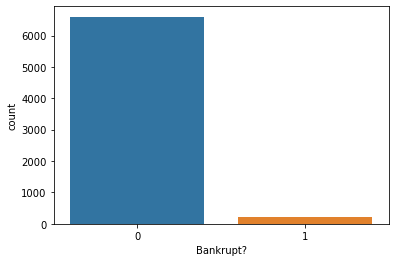

In [110]:
sns.countplot(bank_data['Bankrupt?']) # plotting the count plot of target variable

- Its highly imbalanced Dataset with ratio of **3 : 97** or **0.03** in minority class and **0.97** in majority class.

In [111]:
bank_data.info() # to know the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are around 96 columns in the dataset with **93 of them being float** and ***3 being int***.

In [112]:
bank_data.shape # printing the shape of the dataframe

(6819, 96)

Data set has 96 columns and 6819 rows

In [113]:
bank_data.describe()# to know the statistical summary of the dataframe

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

- Most the values in the dataset a highly skewed
- We can find the features both positively and negatively skewed

## Checking for categorical Variables

In [114]:

for i in  bank_data.describe().columns:
    # print(len(bank_data[i].unique()) )
    if len(bank_data[i].unique()) < 10:
        print(i,'with',len(bank_data[i].unique()),'values')


Bankrupt? with 2 values
 Liability-Assets Flag with 2 values
 Net Income Flag with 1 values


 - Liability-Assets Flag has only two values: 1 and 0
 - Net Income Flag has only one value: 1
 - Bankrupt? is a target variable

In [115]:
print(bank_data[' Net Income Flag'].unique())
# Drop the columns Net Income Flag which is not required
bank_data.drop([' Net Income Flag'],axis=1,inplace=True)

[1]


Net Income Flag has only one unique value which is 1 in it

## Checking for Missing values 

In [116]:
pd.DataFrame(data=bank_data.isna().mean()*100,index=bank_data.columns).T

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0        0.0                                                0.0          

    ROA(A) before interest and % after tax  \
0                                      0.0   

    ROA(B) before interest and depreciation after tax  \
0                                                0.0    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                      0.0                           0.0   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                     0.0                         0.0   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                           0.0                                           0.0   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                                    0.0                      0.0   

    Research and development expense rate   Cash flow rate  \
0                                     0.0              0.0   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                                   0.0            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                       0.0                       0.0   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                       0.0                                       0.0   

    Cash Flow Per Share   Revenue Per Share (Yuan ¥)  \
0                   0.0                          0.0   

    Operating Profit Per Share (Yuan ¥)  \
0                                   0.0   

    Per Share Net profit before tax (Yuan ¥)  \
0                                        0.0   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                                       0.0                            0.0   

    After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate  \
0                                0.0                              0.0   

    Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0                                 0.0                       0.0   

    Net Value Growth Rate   Total Asset Return Growth Rate Ratio  \
0                     0.0                                    0.0   

    Cash Reinvestment %   Current Ratio   Quick Ratio  \
0                   0.0             0.0           0.0   

    Interest Expense Ratio   Total debt/Total net worth   Debt ratio %  \
0                      0.0                          0.0            0.0   

    Net worth/Assets   Long-term fund suitability ratio (A)  \
0                0.0                                    0.0   

    Borrowing dependency   Contingent liabilities/Net worth  \
0                    0.0                                0.0   

    Operating profit/Paid-in capital   Net profit before tax/Paid-in capital  \
0                                0.0                                     0.0   

    Inventory and accounts receivable/Net value   Total Asset Turnover  \
0                                           0.0                    0.0   

    Accounts Receivable Turnover   Average Collection Days  \
0                            0.0                       0.0   

    Inventory Turnover Rate (times)   Fixed Assets Turnover Frequency  \
0                               0.0                               0.0   

    Net Worth Turnover Rate (times)   Revenue per person  \
0                               0.0                  0.0   

    Operating profit per person   Allocation rate per person  \
0                           0.0                          0.0   

    Working Capital to Total Assets   Quick Assets/Total Assets  \
0                               0.0                         0.0   

    Current Assets/Total Assets   Cash/Total Assets  \
0                           0.0                 0.0   

    Quick Assets/Current Liability   Cash/Current Liability  \
0                              0.0                      0.0   

    Curr

<AxesSubplot:>

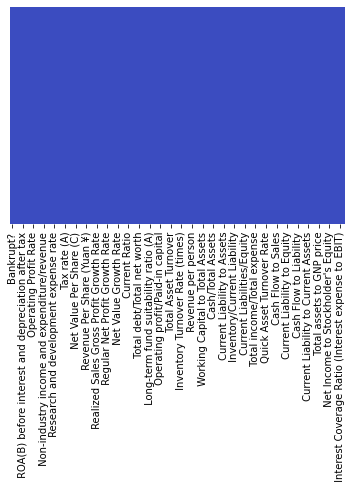

In [117]:
sns.heatmap(bank_data.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [118]:
bank_data.isna().sum().sum()

0

We can see that there are no missing values or nan values in the dataset

There is no missing data

### Identifying numerical columns
1. Only Net Income Flag is a only categorical feature
2. All the other features are numerical 

In [119]:
numerical_columns=[x for x in bank_data.columns if x not in [' Net Income Flag','Bankrupt?'] ]
numerical_columns #printing the numerical columns

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

In [120]:
from IPython.display import display # to display the dataframe 

def display_quatile_dist(data,features):
    ''' 
    data: dataframe
    features: list of features
    This function is used to display the distribution of the features in the dataframe
    from the list of percentile values {0.0,0.01,0.1,0.25,0.5,0.75,0.9,0.99,1}
    displays distribution of the features in the dataframe through the list of percentile values
    '''
    a=pd.DataFrame()
    r=[0,.01,.1,.25,.5,.75,.9,.99,1]
    for i in features :
#     display(bank_data[i].quantile(r))
        a[i]=data[i].quantile(r)
    
    display(a.style.bar())
    
display_quatile_dist(bank_data,numerical_columns)


- By this above table we can visualize how the value of features fluctuate
- And we can also check where we can expect outliers
- Feature like 
    1. **Research and development expense rate** 
    2. **Interest-bearing debt interest rate**
    3. **Operating Expense Rate**
    4. **Total Asset Growth Rate**
    5. **Inventory Turnover Rate (times)**
    6. **Turnover Frequency**
    7. **Cash Turn Over Rate** 

are having high Magnitude compared to other features at .99 percentile


## Feature Elimination :  from correlation  (Pearson correlation)
 - Eliminating features have correlation between more than .85  

<AxesSubplot:>

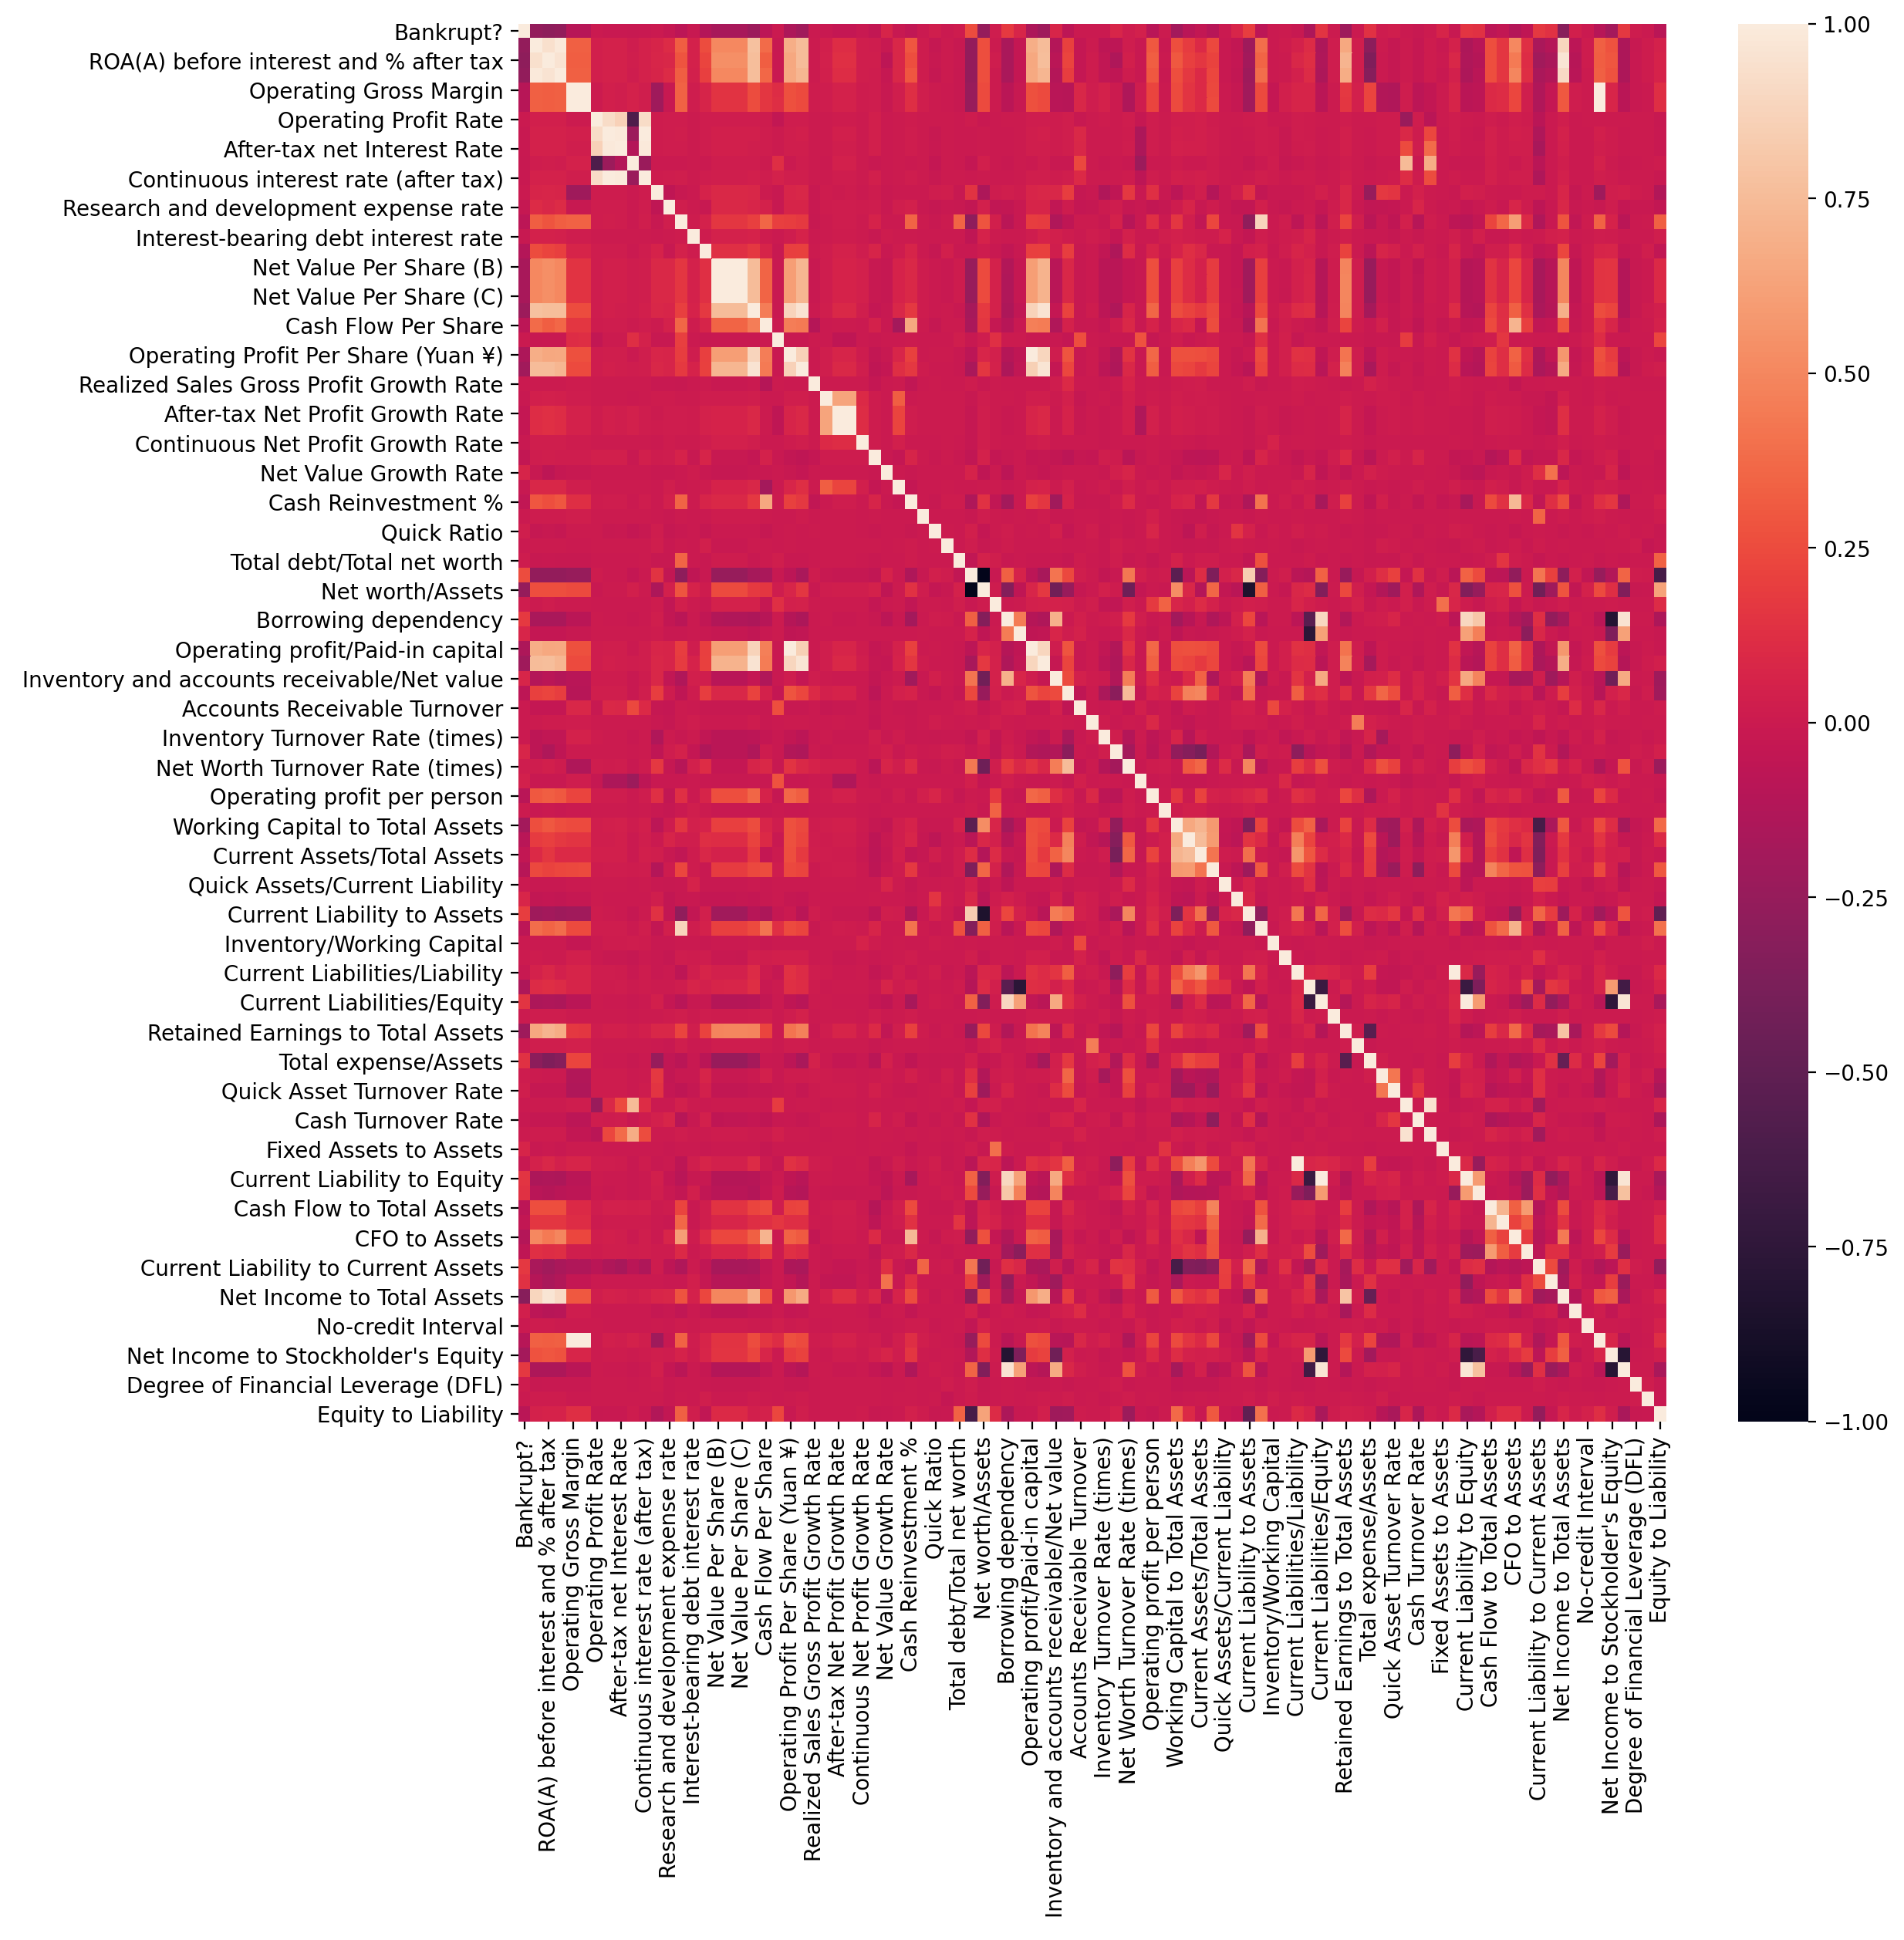

In [121]:
# Setting the size of the plot
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap(bank_data.corr(),) # heatmap of the correlation between the features

### We are not able to compare how the features are correlated to each other
 - We cant do feature elimination one by one manually as there are so many features and its not the best practice
 - Hence we need some other feature elimination technique to get better insights i.e We need to automate the process

## Pearson correlation

In [122]:

def correlation(dataset, threshold):
    '''
    dataset: dataframe
    threshold: threshold value for the correlation
    Type:dataset: dataframe
    Type:threshold: float
    This function removes the features with correlation greater than the threshold value
    and it alters the dataframe to remove the features with correlation greater than the threshold value
    '''
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr() # Correlation matrix
    # Iterating through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset


In [123]:
# Setting a copy of the dataset
bank_data_stage_1=bank_data.copy()
correlation(bank_data_stage_1,.85)

## Checkpoint 1
1. Data is checked with missing values
2. Identified that outliers are present in the dataset from descriptive statistics chart and percentile distribution
3. Feature correlation between each other feature above .85 is eliminated using (Pearson Correlation)

## EDA + Outlier Analysis and Noise Removal and Visualization 

<AxesSubplot:>

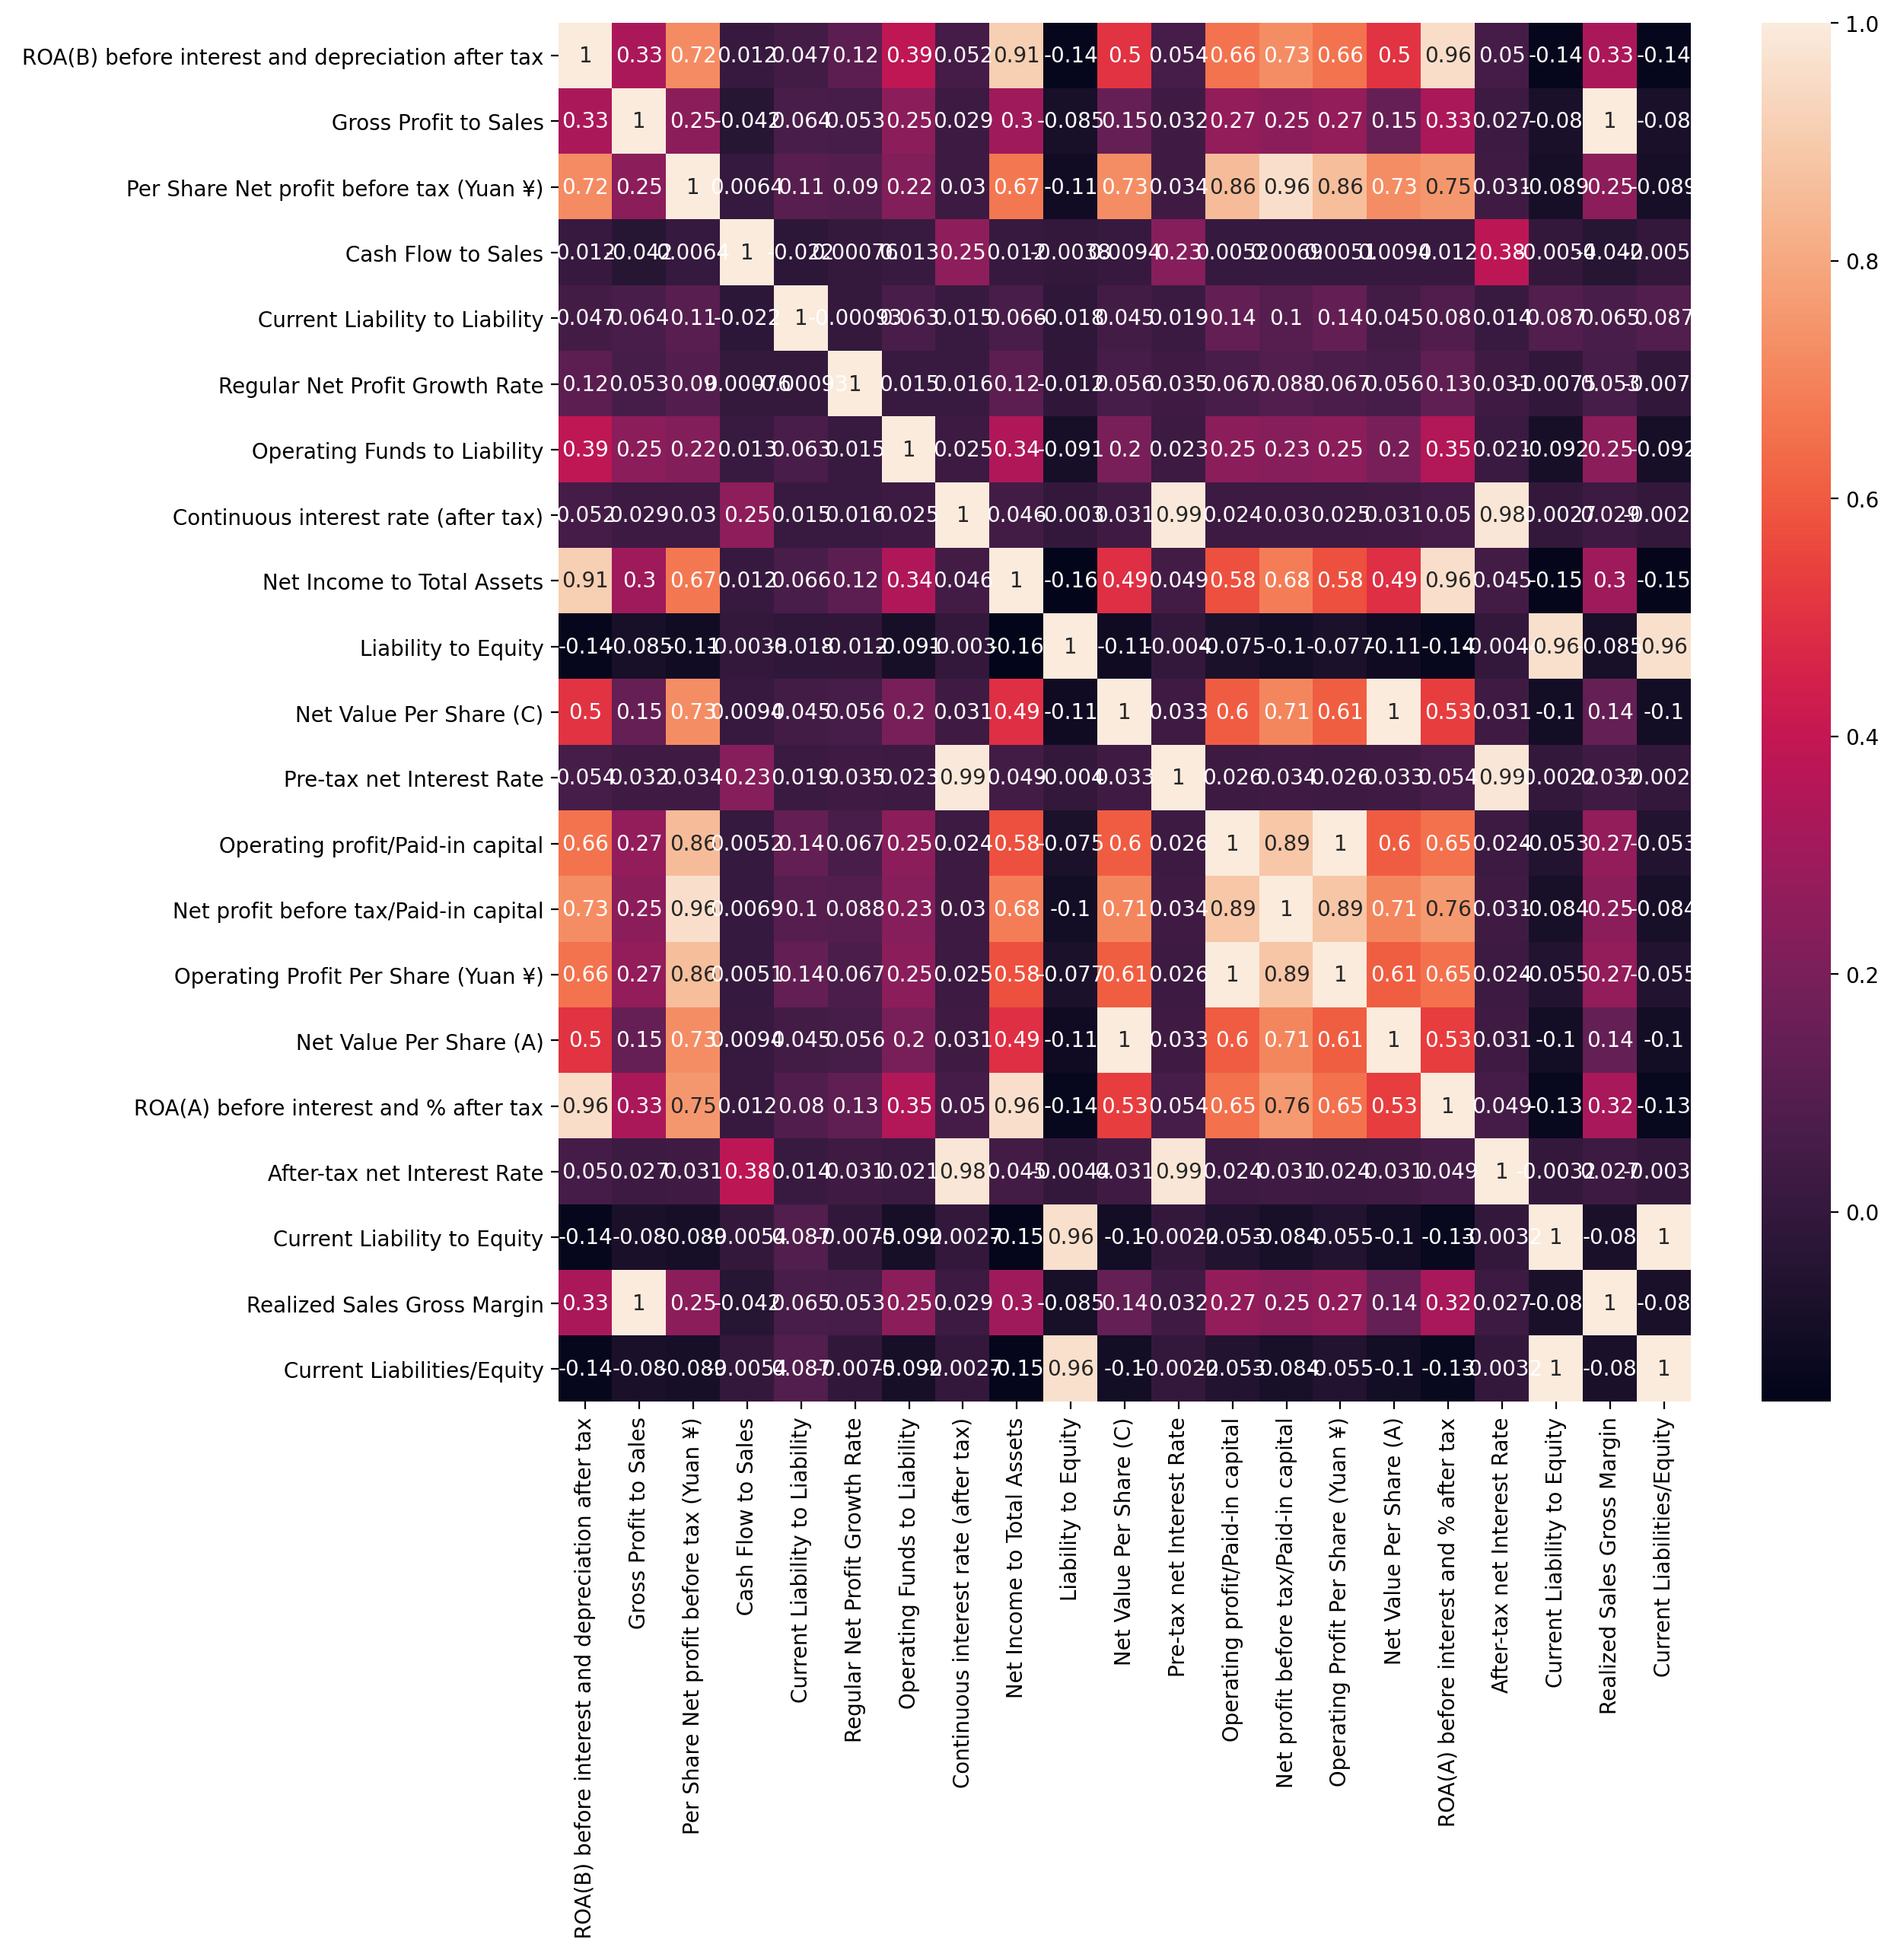

In [124]:
high_corr_cols=set(bank_data.columns)-set(bank_data_stage_1.columns)
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap(bank_data[high_corr_cols].corr(),annot=True)

- Above map is the heatmap of high correlated features that are removed from data set 
- Technique to handle multi colinearity

In [125]:
display(bank_data_stage_1.head()) # printing the first 5 rows of the dataset
print('Printing shape of the dataset after removing the features with high correlation to check the features left')
bank_data_stage_1.shape # printing the shape of the dataset

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    Operating Gross Margin   Operating Profit Rate  \
0                 0.601457                0.998969   
1                 0.610235                0.998946   
2                 0.601450                0.998857   
3                 0.583541                0.998700   
4                 0.598783                0.998973   

    Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                      0.302646             1.256969e-04   
1                                      0.303556             2.897851e-04   
2                                      0.302035             2.361297e-04   
3                                      0.303350             1.078888e-04   
4                                      0.303475             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.177911                                  0.180581   
3                  0.154187                                  0.193722   
4                  0.167502                                  0.212537   

    Cash Flow Per Share   Revenue Per Share (Yuan ¥)  \
0              0.311664                     0.017560   
1              0.318137                     0.021144   
2              0.307102                     0.005944   
3              0.321674                     0.014368   
4              0.319162                     0.029690   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                                  0.022102                       0.848195   
1                                  0.022080                       0.848088   
2                                  0.022760                       0.848094   
3                                  0.022046                       0.848005   
4                                  0.022096                       0.848258   

    After-tax Net Profit Growth Rate   Continuous Net Profit Growth Rate  \
0                           0.688979                            0.217535   
1                           0.689693                            0.217620   
2                           0.689463                            0.217601   
3                           0.689110                            0.217568   
4                           0.689697                            0.217626   

    Total Asset Growth Rate   Net Value Growth Rate  \
0              4.980000e+09                0.000327   
1              6.110000e+09                0.000443   
2              7.280000e+09                0.000396   
3              4.880000e+09                0.000382   
4              5.510000e+09                0.000439   

    Total Asset Retur

Printing shape of the dataset after removing the features with high correlation to check the features left


(6819, 74)

- Features is been reduced from 95 to 73 by removed high correlated features that are above correlation. 0.85
- 25% of features is been reduced

In [126]:
(display_quatile_dist(bank_data_stage_1,bank_data_stage_1.columns))

In [127]:
# storing features in a list
features=[x for x in bank_data_stage_1.columns if x not in ["Bankrupt?"]]

In [128]:
def graph_label_title(x_label=False,y_label=False,title=False):
    '''
    x_label: label of the x-axis
    y_label: label of the y-axis
    title: title of the graph
    This function sets the xlable ylable and title of the graph
    '''
    if x_label:
        plt.xlabel(x_label,fontsize=25)
    if y_label:
        plt.ylabel(y_label,fontsize=25)
    if title:
        plt.title(title,fontsize=25)
        

## Checking skewness of all the features in the form of distribution

1. Instead of checking all the features one by one its a lot of features
2. So lets handle the features based on the range of skewness of feature


In [129]:
# Plottiong the distribution of skewness of features
skew_table=bank_data_stage_1.drop(columns=['Bankrupt?'," Liability-Assets Flag"],axis=1).skew().sort_values()
print( "\033[1m" + 'Top 5 features that skewed negatively' + "\033[0m")
display(pd.DataFrame(skew_table.head())) # printing the top 5 features that skewed negatively
print( "\033[1m" + 'Top 5 features that skewed positively' + "\033[0m")
display(pd.DataFrame(skew_table.tail())) # printing the top 5 features that skewed positively

Top 5 features that skewed negatively


0
 Operating Profit Growth Rate       -71.688950
 Operating Profit Rate              -70.237164
 Net Income to Stockholder's Equity -37.964701
 Working Capital/Equity             -36.203654
 Working capitcal Turnover Rate     -28.584611

Top 5 features that skewed positively


0
 Contingent liabilities/Net worth  79.670620
 Net Value Growth Rate             80.291844
 Total income/Total expense        82.332424
 Current Ratio                     82.577237
 Fixed Assets to Assets            82.577237

### Above we can see top 5 positive skewed features and top 5 negative skewed features
1. Not all the features are having its skewness near to zero 
2. We have features that are highly skewed both in positive and negative direction
3. Range of skewness is from -71 to +82


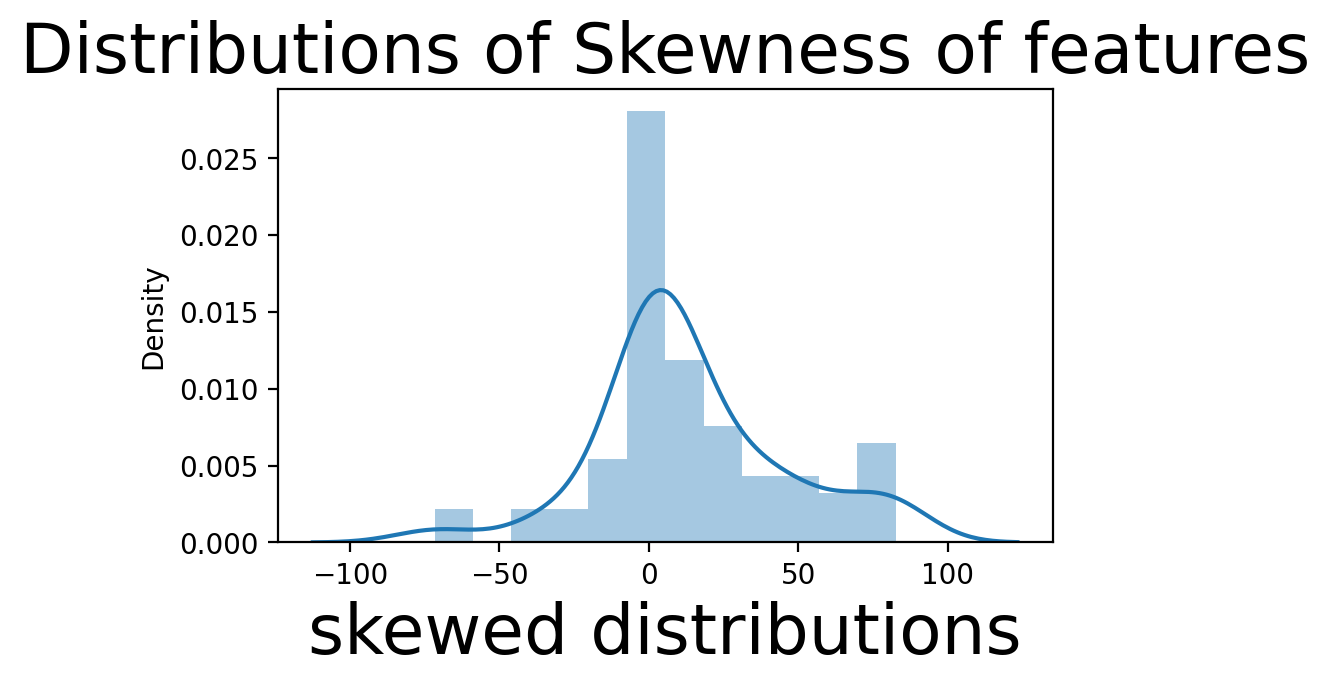

In [130]:
# Plotting the distribution of skewness of features
plt.figure(figsize=(5,3),dpi=200) # setting the size of the plot
sns.distplot(skew_table)
graph_label_title('skewed distributions',False,'Distributions of Skewness of features')

- We can see that most of the features are skewed towards 0
- There are features that are skewed towards both right side and left side

In [131]:
bank_data["Bankrupt?"].value_counts() # printing the value counts of the target variable

0    6599
1     220
Name: Bankrupt?, dtype: int64

### Lets start analyzing features that skewed from right to left 


In [132]:
def print_skewness_and_handle_outlier(skewness_range_1,skewness_range_2,data,skewness,percentile=.99,inplace=False):
    '''
    skewness_range_1: range 1 for skewness
    skewness_range_2: range 2 for skewness
    data: dataframe
    skewness: indication that its a negative or positive skewed feature
    percentile: percentile value to eliminate the outlier
    inplace: indication that the dataframe is to be altered or not

    TYPE:
    skewness_range_1: int
    skewness_range_2: int
    data: dataframe
    skewness: string
    percentile: float
    inplace: boolean

    This function prints extracts features between the range of skewness and eliminates the outlier
    using functions that are
    1. return_and_print_outliers_ : 
    2.skewness range : To get the features that are between the range of skewness

    Presentations of the function
        BEFORE removing Outliers AND AFTER removing Outliers 
        1. It displays first 5 rows of the dataframe with features between the skewness range
        2. Plots the box-plot of the features between the skewness range
        3. Display the percentile distrubution
        4. Histogram to check the distribution of the features or the how much the skewness is reduced by removing the outliers

    '''
    data_=data.copy()
    skew_cols=skewness_Range(skewness_range_1,skewness_range_2)
    print("*"*4+f'Displaying first 5 rows of features that are having it skewness from {skewness_range_1} to {skewness_range_2}'+"*"*4)
    display(data[skew_cols].head())
    
    print("*"*4+' Box plot before removal of outliers'+"*"*4)
    plt.figure(figsize=(15,3))
    ax = sns.boxplot(data=data_[skew_cols], orient="h", palette="Set2")
    plt.show()
    
    print('\n'+"*"*4+f' Displaying percentile of columns that are skewed from {skewness_range_1} to {skewness_range_2} '+"*"*4)
    print('\n'+'*'*55+"BEFORE"+'*'*55)
    display_quatile_dist(data_,skew_cols)
    plt.show()
    print("\nSKEWNESS")
    print('\n'+'*'*55+"BEFORE"+'*'*55)
    data_[skew_cols].hist(bins=50,figsize=(12,8))
    plt.show()    
    outlier_indices=return_and_print_outliers_(data,skew_cols,percentile,skewness,inplace)
    data.drop(outlier_indices[0],inplace=inplace)
    return skew_cols


def return_and_print_outliers_(data,cols,percentile,skewness,inplace):
    '''
    data: dataframe 
    cols: list of columns
    percentile: percentile value to eliminate the outlier
    skewness: indication that its a negative or positive skewed feature
    inplace: indication that the dataframe is to be altered or not
    TYPE :
    data: dataframe
    cols: list
    percentile: float
    skewness: string
    inplace: boolean

    1.This function identifies data above supplied percentile and impute
    2.displays the graphs like histogram boxplot and percentile distrubution chart after removing outliers
    This function returns the indices of the majority and minority class that were imputed due the reason of outlier
    '''
    print(f'\n\n {"*"*10}Outliers beyond {percentile} percentile {"*"*10}')
    # set used to collected majority class outlier indices
    outliers_indcies=set()
    # set used to collected minority class outlier indices
    outliers_indcies_minority=set()
    
    # dataframe to store the outliers from majority class
    a=pd.DataFrame()
    # dataframe to store the outliers from minority class
    b=pd.DataFrame()
    # Iterating over the columns supplied
    for i in cols:
        # condition for skewness is + i.e positive eg: we need to supply percentile like .99 ..95 .90 percentile
        if skewness=="+":
            # storing data that are above percentile
            outlier_=data[(data[i]> percentile)]
            # storing  the outliers belonging to majority class
            outlier=outlier_[(outlier_["Bankrupt?"]!=1)]
            # storing  the outliers belonging to minority class
            outlier_minority=outlier_[(outlier_["Bankrupt?"]!=0)]
            # condition to check if there are outliers captured and inplace value [Bool] to alter the origiial dataframe
            if data.loc[(data[i]> percentile) &  (data["Bankrupt?"]!=0),[i]].shape[0] > 0 and inplace:
                # imputing overall median for minority class outliers
                data.loc[(data[i]> percentile) &  (data["Bankrupt?"]!=0),[i]]==data[i].median()
        # Condition for skewness is - i.e negative eg: we need to supply percentile like .01 ..05 .10 percentile
        elif skewness=='-': 
            # storing data that are below percentile
            outlier_=data[(data[i] < percentile)]
            # storing  the outliers belonging to majority class
            outlier=outlier_[(outlier_["Bankrupt?"]!=1)]
            # storing  the outliers belonging to minority class
            outlier_minority=outlier_[(outlier_["Bankrupt?"]!=0)]
            # condition to check if there are outliers captured and inplace value [Bool] to alter the origiial dataframe
            if data.loc[(data[i]  < percentile) &  (data["Bankrupt?"]!=0),[i]].shape[0] > 0 and inplace:
                # imputing overall median for minority class outliers
                data.loc[(data[i] < percentile) &  (data["Bankrupt?"]!=0),[i]]=data[i].median()
        # Storing indices of the outliers captured for majority class
        outliers_indcies.update(outlier.index)
        # Storing indices of the outliers captured for minority class
        outliers_indcies_minority.update(outlier_minority.index)
        # Concatenating the outliers captured for majority class
        a=pd.concat([a,outlier])
        # Concatenating the outliers captured for minority class
        b=pd.concat([b,outlier_minority])
   
    # Displaying the outliers captured for majority class and minority class
    if a[cols].shape[1]!=0:
        modified_data=pd.concat([a,b]).loc[list(outliers_indcies)+list(outliers_indcies_minority),cols+["Bankrupt?"]]
        
        try:
            display(modified_data.reset_index(drop=True).style.bar())
#             pass
        except:
            display(modified_data.reset_index())
        print(len(outliers_indcies_minority),'minority class')
            

# Presentation Part
    print(f'{b.shape[0]} rows of specific column  are imputed to median value ')
    print(f'{a.shape[0]} rows are removed ')
    print("\nSKEWNESS")
    print('\n'+'*'*55+"AFTER"+'*'*55)
    data.drop(list(outliers_indcies)+list(outliers_indcies_minority))[cols].hist(bins=50,figsize=(12,8))
    plt.show()     
    print("*"*4+' Box plot after removal of outliers'+"*"*4)
    plt.figure(figsize=(15,3))
    sns.boxplot(data=data[cols].drop(list(outliers_indcies)+list(outliers_indcies_minority)), orient="h", palette="Set2")
    plt.show()
    print("\nPERCENTILE")
    print('*'*55+"AFTER"+'*'*55)
    display_quatile_dist(data[cols].drop(list(outliers_indcies)+list(outliers_indcies_minority)),cols)
    plt.show()
    
    return [outliers_indcies,outliers_indcies_minority]

def skewness_Range(range1,range2):
    '''
    range1: range1 of the skew
    range2: range2 of the skew
    TYPE:
    range1: int or float
    range2: int or float

    This function returns the feature that having its skewnes between the  skew range
    '''
    cols_in_range=[]
    for ind in skew_table.index:
        if range2 > skew_table[ind] >= range1 :
            cols_in_range.append(ind)
    return cols_in_range





# NOTE This is not any re-sampling technique as it has to be performed after splitting the dataset

# Intension of this Analysis of skewness of features is to remove the noise at the end or beginning of the distribution Like values above .99 percentile and   below .01 percentile that are very peculiar or uneven 

### The illustration of purpose of this intension can be seen below while removing noise from features that have skewness from range 70 to 85

# Analysing Feature from skewness 70 to 85

### Features Between the skewness range 70 to 85 :

1. Realized Sales Gross Profit Growth Rate
2. Contingent liabilities/Net worth
3. Net Value Growth Rate
4. Total income/Total expense
5. Current Ratio
6. Fixed Assets to Assets

These features contain very uneven values at the end
These uneven values are noise that effect the model performance and are stubborn to any kind of **transformation**

All these features starts its distribution with  0 as its 0th percentile

1. Realized Sales Gross Profit Growth Rate contains => **99 percent value below .02** But **having 1 as its 100th percentile which is a noise**
2. Simillary in Contingent liabilities/Net worth => **99 percentile is 0.01** and **100th percentile which is 1 (noise)** 
3. Net Value Growth Rate => **99 percentile is 0.001** and **100th percentile  is 9330000000 which is a (noise)** 
4. Total income/Total expensee => **99 percentile is 0.003721** and **100th percentile is 1 (noise)**
5. Current Ratio=> **99 percentile is 0.074595** and **100th percentile is 2750000000 (noise)**
6. Fixed Assets to Assets => **99 percentile is 0.79** and **100th percentile is 8320000000 (noise)**

- Hence removing the noise from the dataset helps a lot in model performance



****Displaying first 5 rows of features that are having it skewness from 70 to 85****


Realized Sales Gross Profit Growth Rate  \
0                                  0.022102   
1                                  0.022080   
2                                  0.022760   
3                                  0.022046   
4                                  0.022096   

    Contingent liabilities/Net worth   Net Value Growth Rate  \
0                           0.006479                0.000327   
1                           0.005835                0.000443   
2                           0.006562                0.000396   
3                           0.005366                0.000382   
4                           0.006624                0.000439   

    Total income/Total expense   Current Ratio   Fixed Assets to Assets  
0                     0.002022        0.002259                 0.424206  
1                     0.002226        0.006016                 0.468828  
2                     0.002060        0.011543                 0.276179  
3                     0.001831        0.004194                 0.559144  
4                     0.002224        0.006022                 0.309555

**** Box plot before removal of outliers****


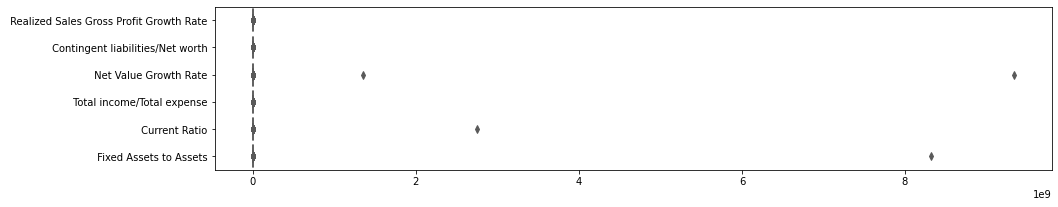


**** Displaying percentile of columns that are skewed from 70 to 85 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


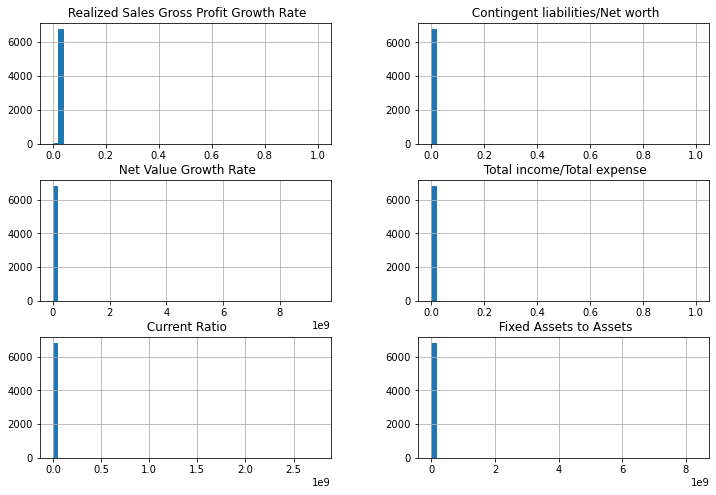



 **********Outliers beyond 0.9 percentile **********


4 minority class
4 rows of specific column  are imputed to median value 
15 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


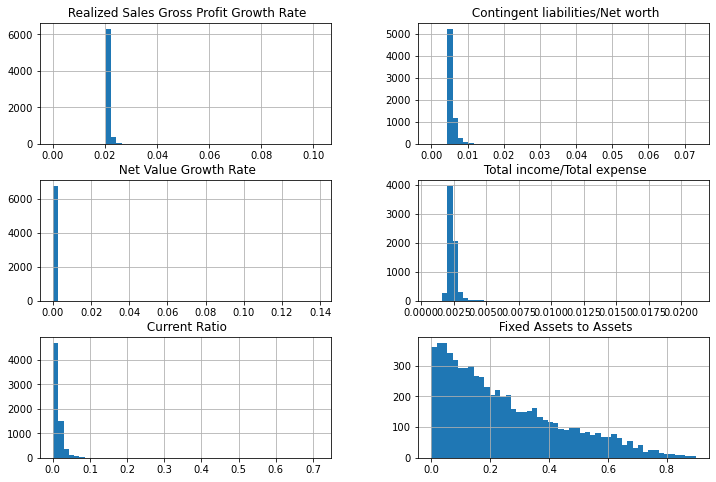

**** Box plot after removal of outliers****


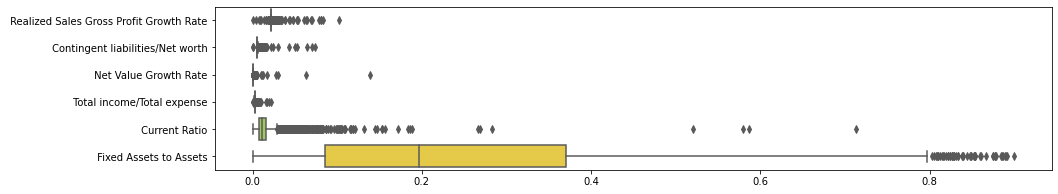


PERCENTILE
*******************************************************AFTER*******************************************************


[' Realized Sales Gross Profit Growth Rate',
 ' Contingent liabilities/Net worth',
 ' Net Value Growth Rate',
 ' Total income/Total expense',
 ' Current Ratio',
 ' Fixed Assets to Assets']

In [133]:
# 70 amd 85 is the range of the skewness it selects the features between that range
# '+' indicates that we have checking positively skewed features
# .90 is the percentile threshold supplied 
print_skewness_and_handle_outlier(70,85,bank_data_stage_1,'+',.90,True)

- Once the noise from dataset is removed we can see a slight decrese in the skewness 
- We can see this skew decrease by comparing histogram plot scale of x axis getting decreasing of before noise removal and After the noise removal

# Analysing Features having skewness from 60 to 70
1. Total Asset Return Growth Rate Ratio
2. Continuous Net Profit Growth Rate

****Displaying first 5 rows of features that are having it skewness from 60 to 70****


Total Asset Return Growth Rate Ratio   Continuous Net Profit Growth Rate
0                               0.263100                            0.217535
1                               0.264516                            0.217620
2                               0.264184                            0.217601
3                               0.263371                            0.217568
4                               0.265218                            0.217626

**** Box plot before removal of outliers****


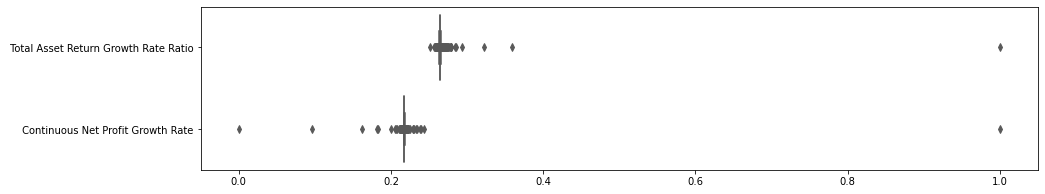


**** Displaying percentile of columns that are skewed from 60 to 70 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


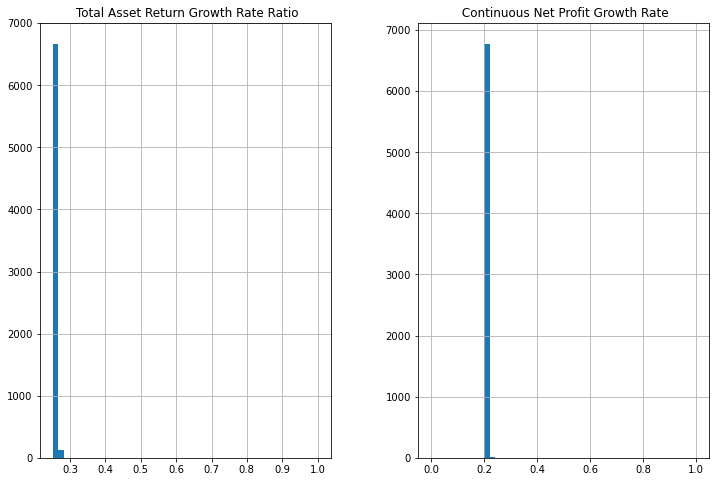



 **********Outliers beyond 0.8 percentile **********


0 minority class
0 rows of specific column  are imputed to median value 
2 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


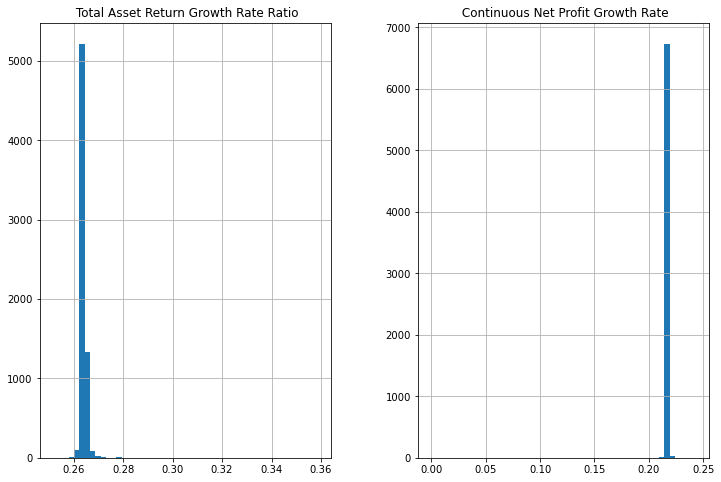

**** Box plot after removal of outliers****


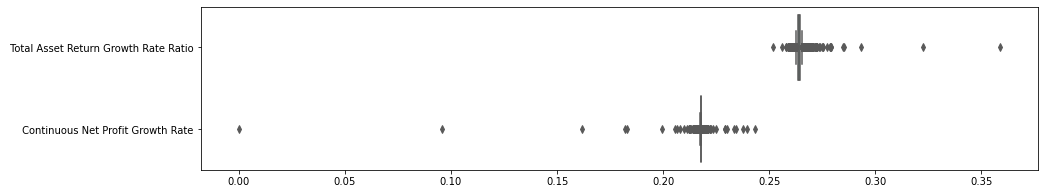


PERCENTILE
*******************************************************AFTER*******************************************************


[' Total Asset Return Growth Rate Ratio', ' Continuous Net Profit Growth Rate']

In [134]:
print_skewness_and_handle_outlier(60,70,bank_data_stage_1,'+',.8,True)

# Analysing Features having skewness from  45 to 61

1. Inventory/Working Capital
2. Degree of Financial Leverage (DFL)
3. Total debt/Total net worth
4. Quick Assets/Current Liability
5. Revenue per person

****Displaying first 5 rows of features that are having it skewness from 45 to 61****


Inventory/Working Capital   Degree of Financial Leverage (DFL)  \
0                    0.276920                             0.026601   
1                    0.289642                             0.264577   
2                    0.277456                             0.026555   
3                    0.276580                             0.026697   
4                    0.287913                             0.024752   

    Total debt/Total net worth   Quick Assets/Current Liability  \
0                     0.021266                         0.001997   
1                     0.012502                         0.004136   
2                     0.021248                         0.006302   
3                     0.009572                         0.002961   
4                     0.005150                         0.004275   

    Revenue per person  
0             0.034164  
1             0.006889  
2             0.028997  
3             0.015463  
4             0.058111

**** Box plot before removal of outliers****


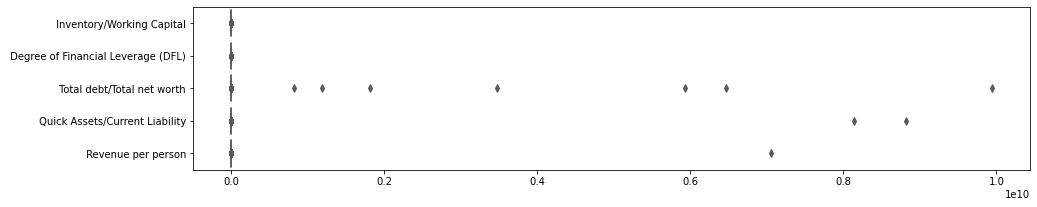


**** Displaying percentile of columns that are skewed from 45 to 61 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


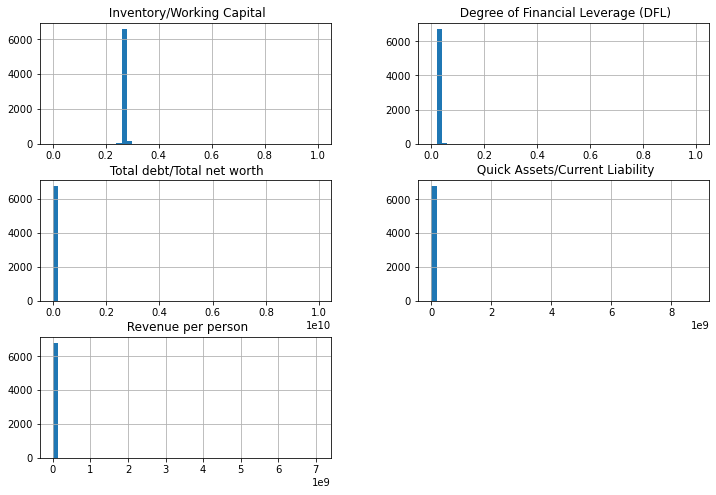



 **********Outliers beyond 0.7 percentile **********


3 minority class
3 rows of specific column  are imputed to median value 
13 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


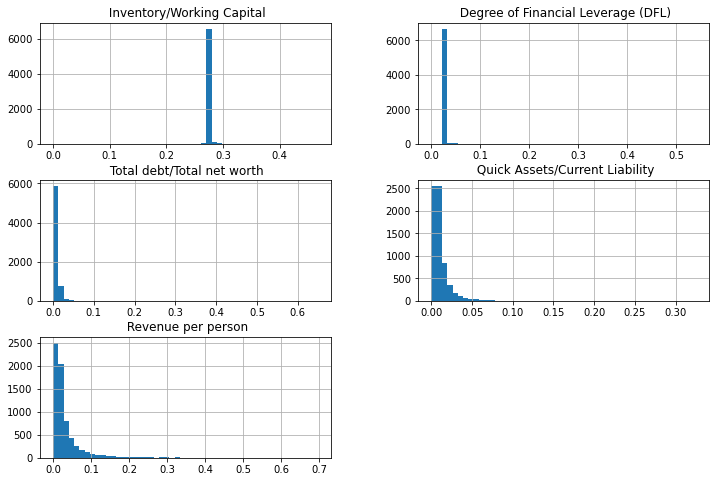

**** Box plot after removal of outliers****


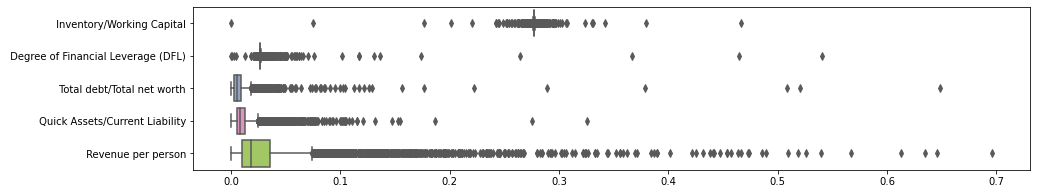


PERCENTILE
*******************************************************AFTER*******************************************************


[' Inventory/Working Capital',
 ' Degree of Financial Leverage (DFL)',
 ' Total debt/Total net worth',
 ' Quick Assets/Current Liability',
 ' Revenue per person']

In [135]:
print_skewness_and_handle_outlier(45,61,bank_data_stage_1,'+',.7,True)

# Analysing Features having skewness from 30 to 44

 1. Average Collection Days 
 2. Quick Ratio 
 3. Equity to Long-term Liability 
 4. Non-industry income and expenditure/revenue 
 5. Revenue Per Share (Yuan ¥) 

****Displaying first 5 rows of features that are having it skewness from 30 to 44****


Average Collection Days   Quick Ratio   Equity to Long-term Liability  \
0                  0.003487      0.001208                        0.126549   
1                  0.004917      0.004039                        0.120916   
2                  0.004227      0.005348                        0.117922   
3                  0.003215      0.002896                        0.120760   
4                  0.004367      0.003727                        0.110933   

    Non-industry income and expenditure/revenue   Revenue Per Share (Yuan ¥)  
0                                      0.302646                     0.017560  
1                                      0.303556                     0.021144  
2                                      0.302035                     0.005944  
3                                      0.303350                     0.014368  
4                                      0.303475                     0.029690

**** Box plot before removal of outliers****


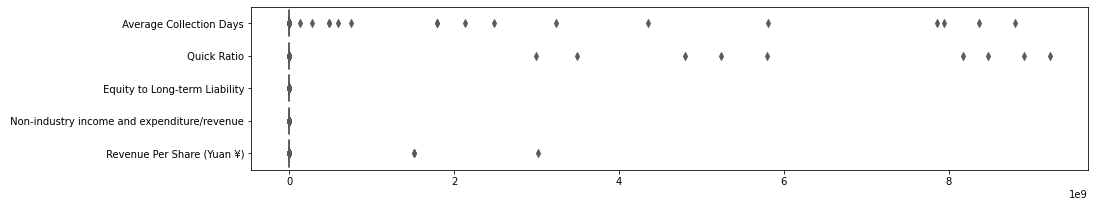


**** Displaying percentile of columns that are skewed from 30 to 44 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


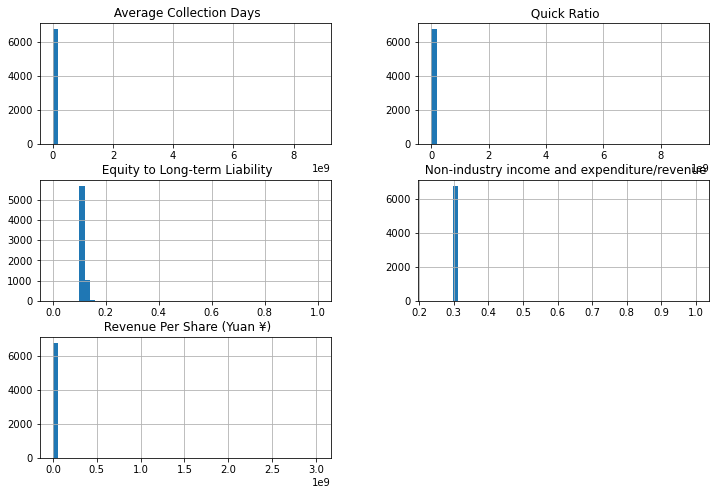



 **********Outliers beyond 0.8 percentile **********


4 minority class
4 rows of specific column  are imputed to median value 
31 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


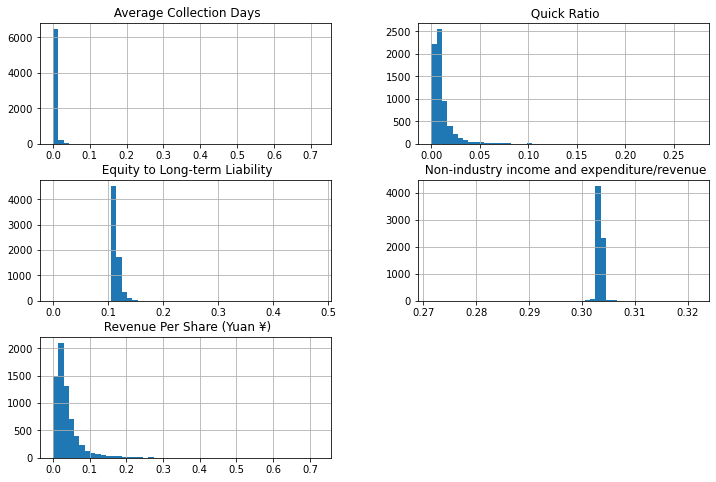

**** Box plot after removal of outliers****


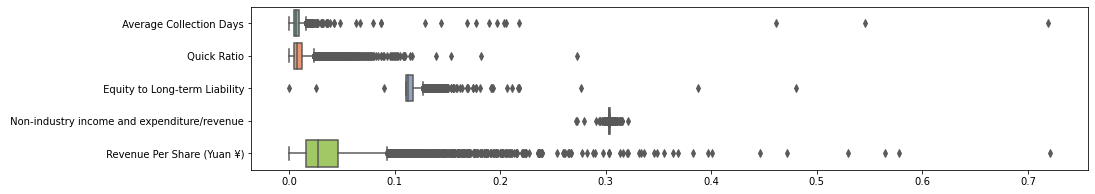


PERCENTILE
*******************************************************AFTER*******************************************************


[' Average Collection Days',
 ' Quick Ratio',
 ' Equity to Long-term Liability',
 ' Non-industry income and expenditure/revenue',
 ' Revenue Per Share (Yuan ¥)']

In [136]:
print_skewness_and_handle_outlier(30,44,bank_data_stage_1,'+',.8,True)

- We can see that there are some outliers present

# Analysing Features having skewness from 20 to 30

 1. Borrowing dependency 
 2. Total assets to GNP price
 3. Long-term fund suitability ratio (A)
 4. Accounts Receivable Turnover
 5. Allocation rate per person

****Displaying first 5 rows of features that are having it skewness from 20 to 30****


Borrowing dependency   Total assets to GNP price  \
0               0.390284                    0.009219   
1               0.376760                    0.008323   
2               0.379093                    0.040003   
3               0.379743                    0.003252   
4               0.375025                    0.003878   

    Long-term fund suitability ratio (A)   Accounts Receivable Turnover  \
0                               0.005024                       0.001814   
1                               0.005059                       0.001286   
2                               0.005100                       0.001495   
3                               0.005047                       0.001966   
4                               0.005303                       0.001449   

    Allocation rate per person  
0                     0.037135  
1                     0.012335  
2                     0.141016  
3                     0.021320  
4                     0.023988

**** Box plot before removal of outliers****


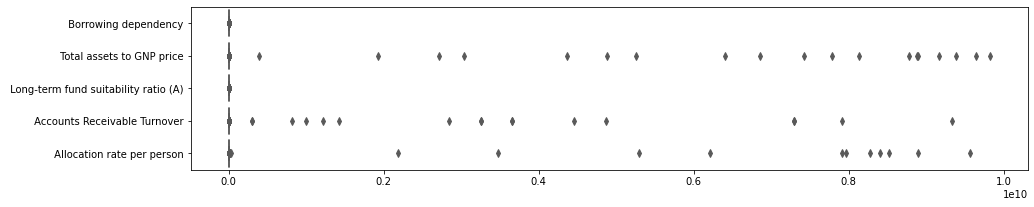


**** Displaying percentile of columns that are skewed from 20 to 30 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


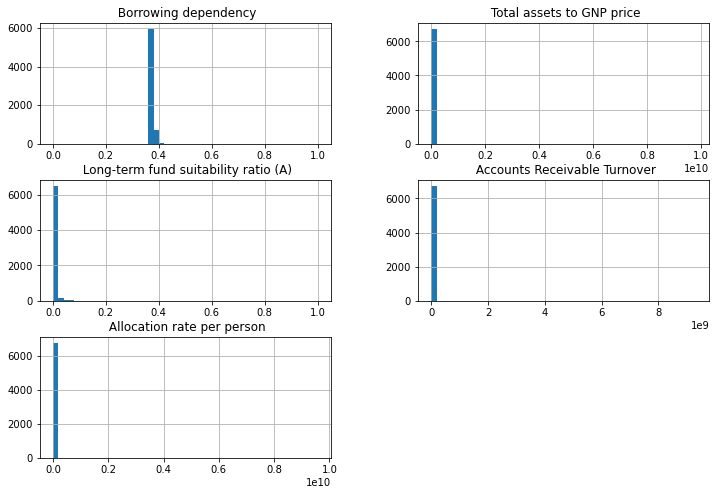



 **********Outliers beyond 0.9 percentile **********


7 minority class
8 rows of specific column  are imputed to median value 
46 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


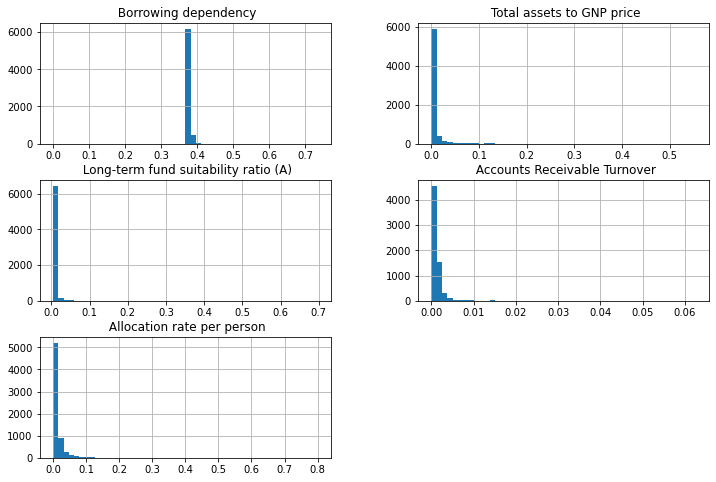

**** Box plot after removal of outliers****


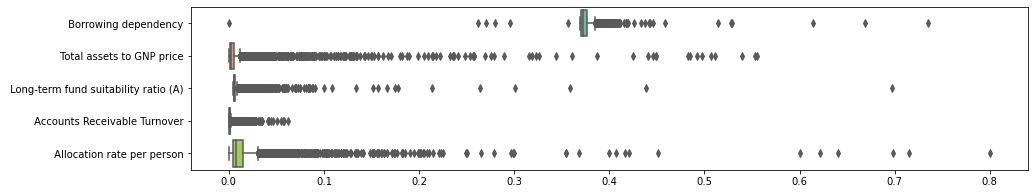


PERCENTILE
*******************************************************AFTER*******************************************************


[' Borrowing dependency',
 ' Total assets to GNP price',
 ' Long-term fund suitability ratio (A)',
 ' Accounts Receivable Turnover',
 ' Allocation rate per person']

In [137]:
print_skewness_and_handle_outlier(20,30,bank_data_stage_1,'+',.9,True)


# Analysing Features having skewness from 13 to 20

 1. Inventory and accounts receivable/Net value    
 2. Current Liability to Current Assets      
 3. Cash/Current Liability                        
 4. Cash Flow to Equity

****Displaying first 5 rows of features that are having it skewness from 13 to 20****


Inventory and accounts receivable/Net value  \
0                                      0.398036   
1                                      0.397725   
2                                      0.406580   
3                                      0.397925   
4                                      0.400079   

    Current Liability to Current Assets   Cash/Current Liability  \
0                              0.118250             1.473360e-04   
1                              0.047775             1.383910e-03   
2                              0.025346             5.340000e+09   
3                              0.067250             1.010646e-03   
4                              0.047725             6.804636e-04   

    Cash Flow to Equity  
0              0.312905  
1              0.314163  
2              0.314515  
3              0.302382  
4              0.311567

**** Box plot before removal of outliers****


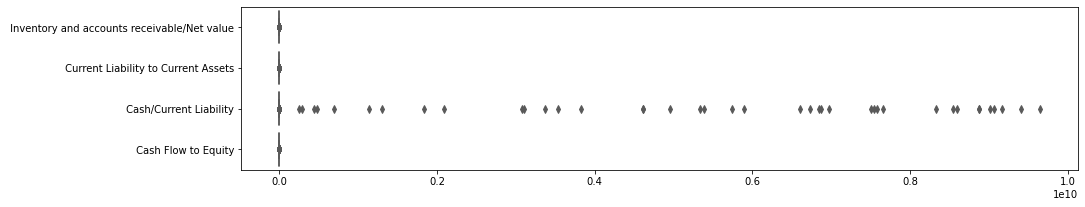


**** Displaying percentile of columns that are skewed from 13 to 20 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


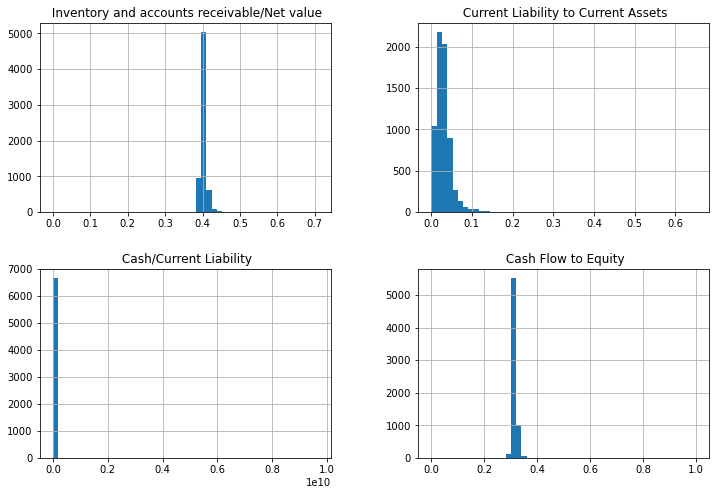



 **********Outliers beyond 0.95 percentile **********


15 minority class
15 rows of specific column  are imputed to median value 
26 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


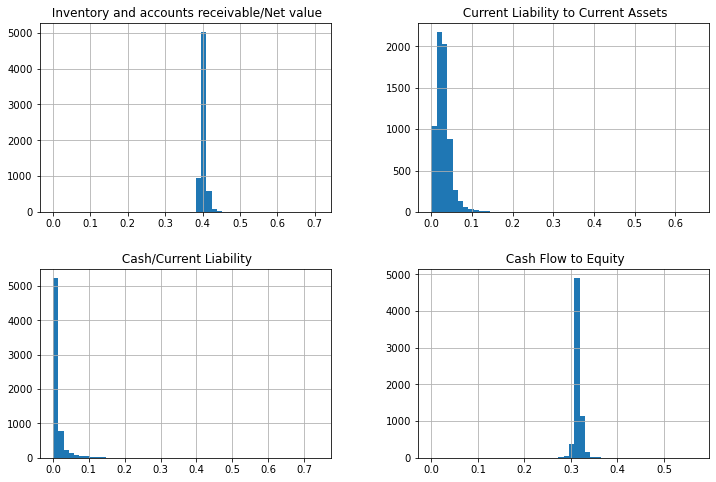

**** Box plot after removal of outliers****


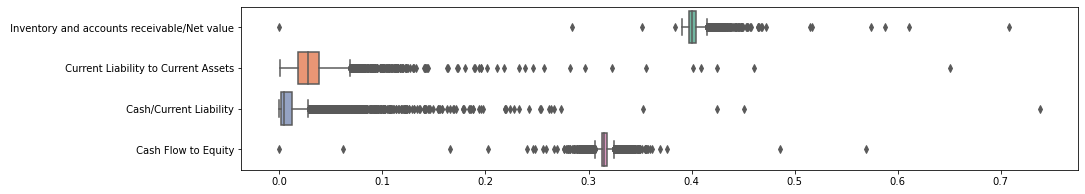


PERCENTILE
*******************************************************AFTER*******************************************************


[' Inventory and accounts receivable/Net value',
 ' Current Liability to Current Assets',
 ' Cash/Current Liability',
 ' Cash Flow to Equity']

In [138]:
print_skewness_and_handle_outlier(13,20,bank_data_stage_1,'+',.95,True)


# Analysing Features having skewness from 7 to 10
- Not handling outliers from features like Inventory/Current liability Long term Liability to Current Assets due to performance drop from (manual testing )

 1. Interest-bearing debt interest rate 
 2. Equity to Liability                    
 3. Operating profit per person           
 4. Cash Flow Per Share                    
 5. Net Worth Turnover Rate (times)        
 6. Total expense/Assets                


****Displaying first 5 rows of features that are having it skewness from 7 to 10****


Interest-bearing debt interest rate   Equity to Liability  \
0                              0.000725              0.016469   
1                              0.000647              0.020794   
2                              0.000790              0.016474   
3                              0.000449              0.023982   
4                              0.000686              0.035490   

    Operating profit per person   Cash Flow Per Share  \
0                      0.392913              0.311664   
1                      0.391590              0.318137   
2                      0.381968              0.307102   
3                      0.378497              0.321674   
4                      0.394371              0.319162   

    Net Worth Turnover Rate (times)   Total expense/Assets  
0                          0.032903               0.064856  
1                          0.025484               0.025516  
2                          0.013387               0.021387  
3                          0.028065               0.024161  
4                          0.040161               0.026385

**** Box plot before removal of outliers****


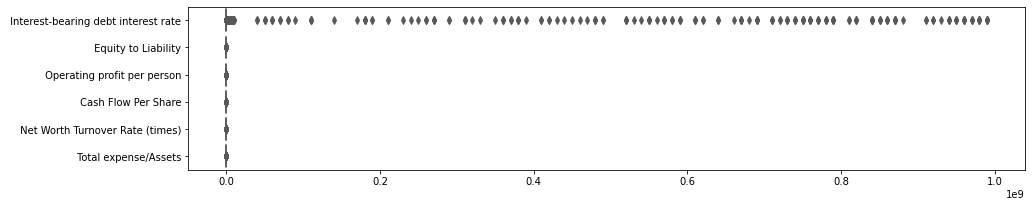


**** Displaying percentile of columns that are skewed from 7 to 10 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


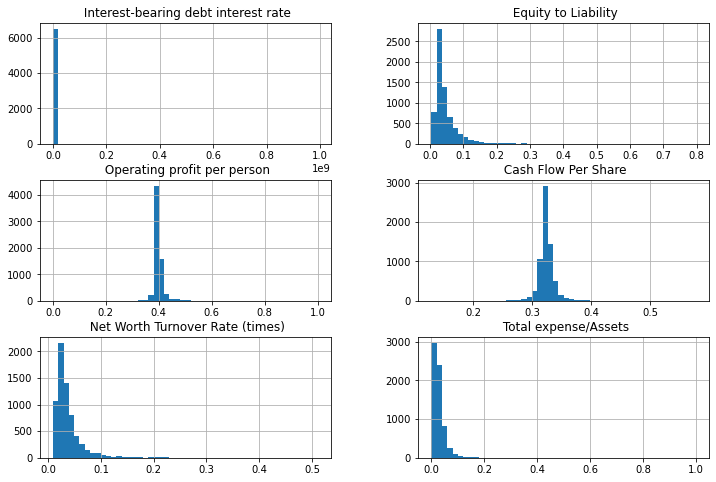



 **********Outliers beyond 0.95 percentile **********


2 minority class
2 rows of specific column  are imputed to median value 
219 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


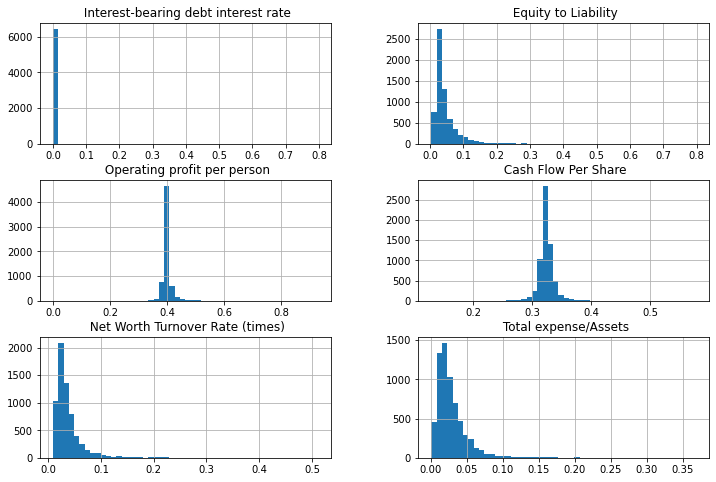

**** Box plot after removal of outliers****


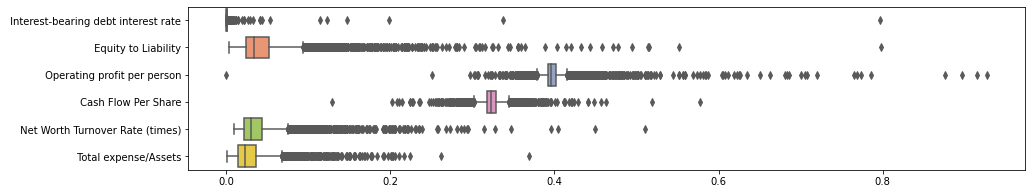


PERCENTILE
*******************************************************AFTER*******************************************************


[' Interest-bearing debt interest rate',
 ' Equity to Liability',
 ' Operating profit per person',
 ' Cash Flow Per Share',
 ' Net Worth Turnover Rate (times)',
 ' Total expense/Assets']

In [139]:
print_skewness_and_handle_outlier(7,10,bank_data_stage_1,'+',.95,True)


# Analysing Features having skewness from 4 to 7
 1. Net Value Per Share (B)                  
 2. Persistent EPS in the Last Four Seasons

****Displaying first 5 rows of features that are having it skewness from 4 to 7****


Net Value Per Share (B)   Persistent EPS in the Last Four Seasons
0                  0.147950                                  0.169141
1                  0.182251                                  0.208944
2                  0.177911                                  0.180581
3                  0.154187                                  0.193722
4                  0.167502                                  0.212537

**** Box plot before removal of outliers****


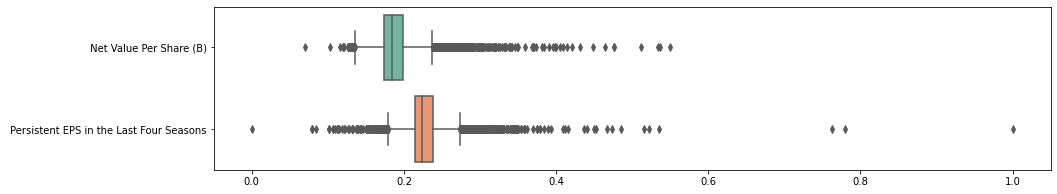


**** Displaying percentile of columns that are skewed from 4 to 7 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


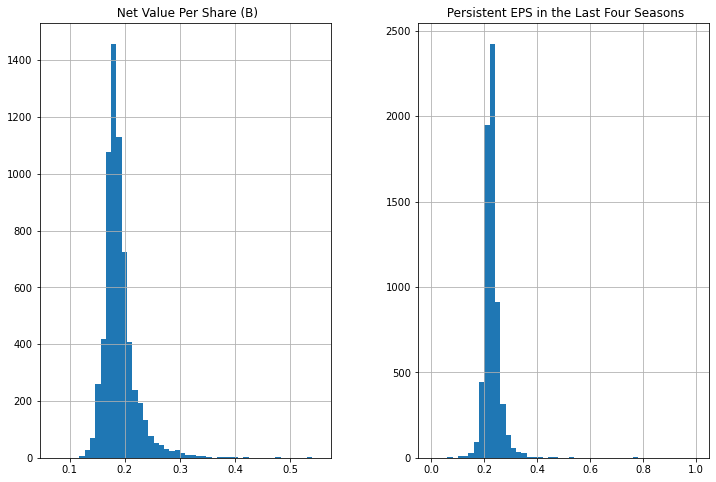



 **********Outliers beyond 0.8 percentile **********


0 minority class
0 rows of specific column  are imputed to median value 
1 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


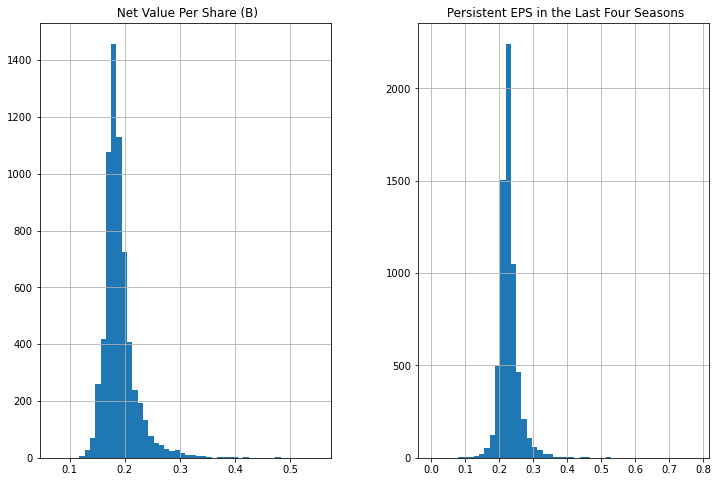

**** Box plot after removal of outliers****


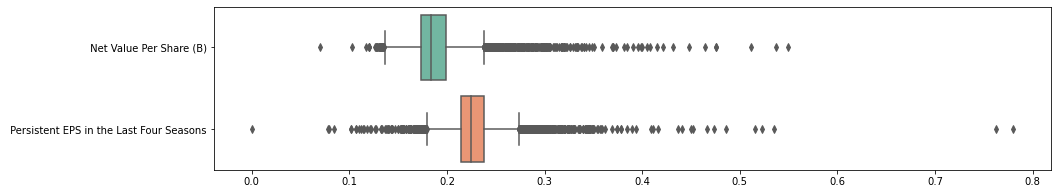


PERCENTILE
*******************************************************AFTER*******************************************************


[' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons']

In [140]:
print_skewness_and_handle_outlier(4,7,bank_data_stage_1,'+',.8,True)


## Skewness of features from -1 to 4 is been ignored as they are less skewed and they might be handled later after splitting the dataset

# Analysing Features having skewness from -10 to -2

1. Operating Gross Margin

****Displaying first 5 rows of features that are having it skewness from -10 to -2****


Operating Gross Margin
0                 0.601457
1                 0.610235
2                 0.601450
3                 0.583541
4                 0.598783

**** Box plot before removal of outliers****


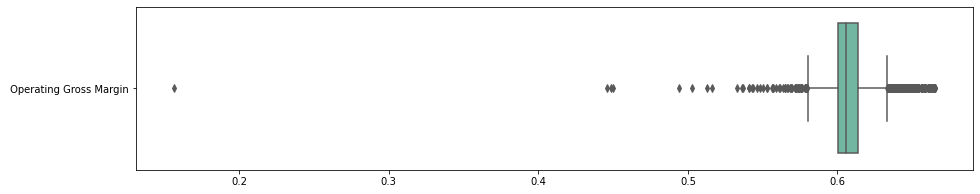


**** Displaying percentile of columns that are skewed from -10 to -2 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


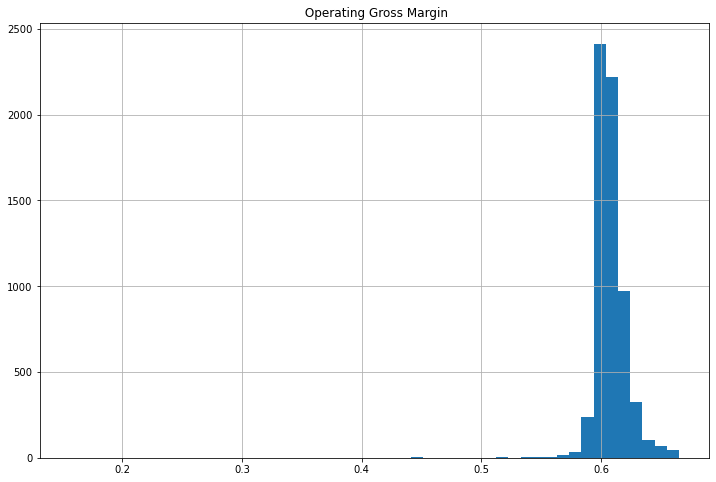



 **********Outliers beyond 0.01 percentile **********


0 minority class
0 rows of specific column  are imputed to median value 
0 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


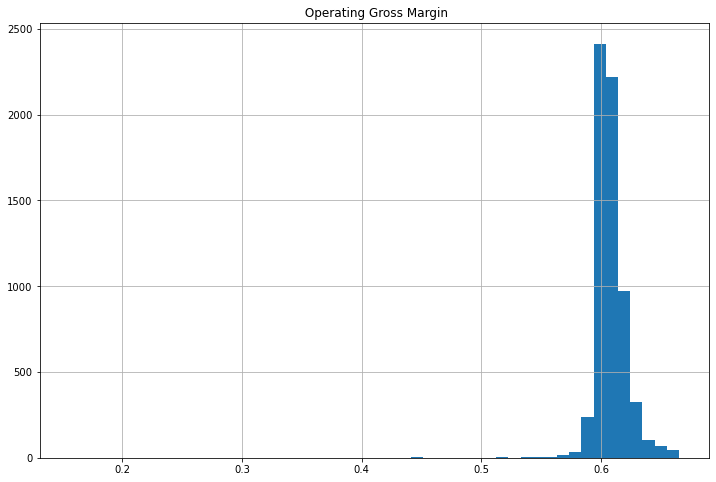

**** Box plot after removal of outliers****


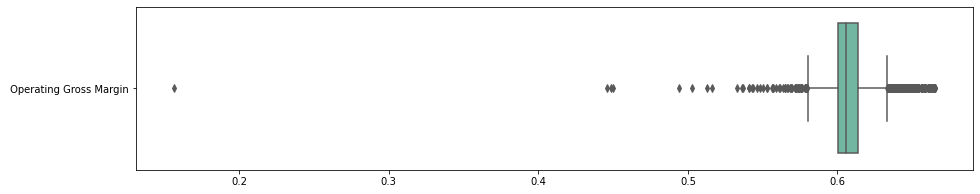


PERCENTILE
*******************************************************AFTER*******************************************************


[' Operating Gross Margin']

In [141]:
print_skewness_and_handle_outlier(-10,-2,bank_data_stage_1,'-',.01)


# Analysing Features having skewness from -20 to -10

1. Interest Expense Ratio
2. Interest Coverage Ratio (Interest expense to EBIT)
3. No-credit Interval
4. Retained Earnings to Total Assets

****Displaying first 5 rows of features that are having it skewness from -20 to -10****


Interest Expense Ratio  \
0                 0.629951   
1                 0.635172   
2                 0.629631   
3                 0.630228   
4                 0.636055   

    Interest Coverage Ratio (Interest expense to EBIT)   No-credit Interval  \
0                                           0.564050               0.622879   
1                                           0.570175               0.623652   
2                                           0.563706               0.623841   
3                                           0.564663               0.622929   
4                                           0.575617               0.623521   

    Retained Earnings to Total Assets  
0                            0.903225  
1                            0.931065  
2                            0.909903  
3                            0.906902  
4                            0.913850

**** Box plot before removal of outliers****


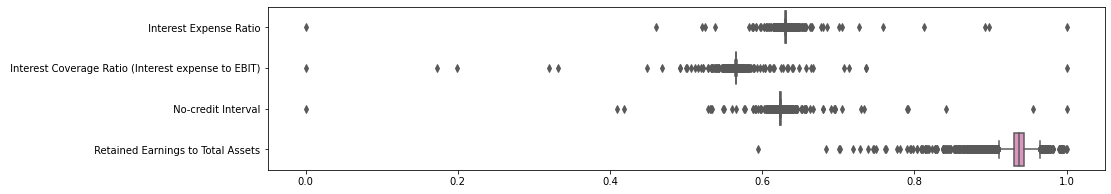


**** Displaying percentile of columns that are skewed from -20 to -10 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


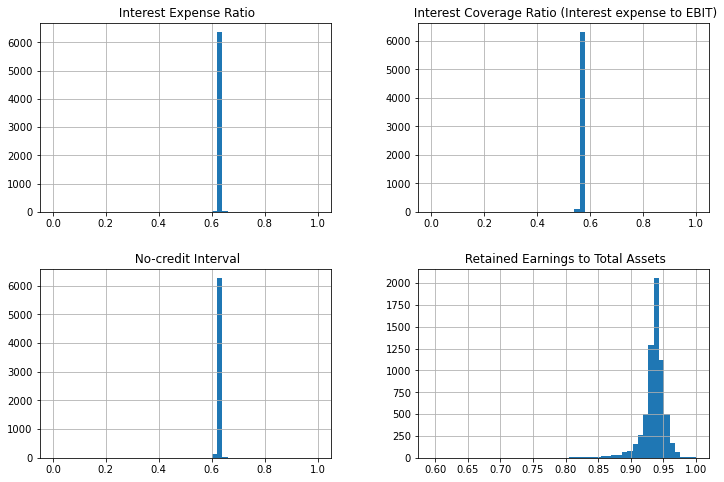



 **********Outliers beyond 0.01 percentile **********


0 minority class
0 rows of specific column  are imputed to median value 
3 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


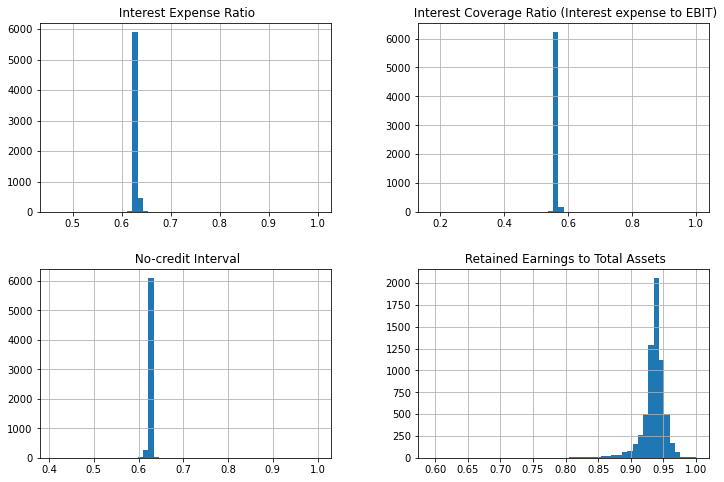

**** Box plot after removal of outliers****


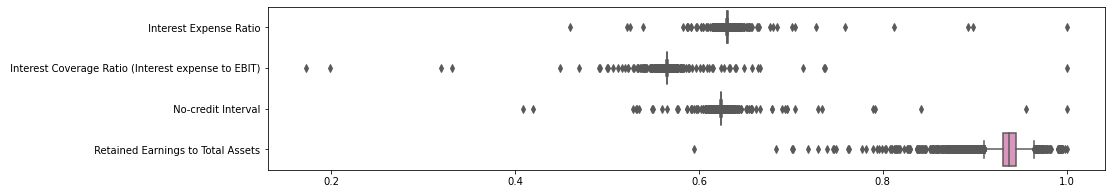


PERCENTILE
*******************************************************AFTER*******************************************************


[' Interest Expense Ratio',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' No-credit Interval',
 ' Retained Earnings to Total Assets']

In [142]:
print_skewness_and_handle_outlier(-20,-10,bank_data_stage_1,'-',.01,True)


# Analysing Features having skewness from -40 to - 20
 1. Net Income to Stockholder's Equity   
 2. Working Capital/Equity               
 3. Working capitcal Turnover Rate       
 4. After-tax Net Profit Growth Rate     

****Displaying first 5 rows of features that are having it skewness from -40 to -20****


Net Income to Stockholder's Equity   Working Capital/Equity  \
0                             0.827890                 0.721275   
1                             0.839969                 0.731975   
2                             0.836774                 0.742729   
3                             0.834697                 0.729825   
4                             0.839973                 0.732000   

    Working capitcal Turnover Rate   After-tax Net Profit Growth Rate  
0                         0.593831                           0.688979  
1                         0.593916                           0.689693  
2                         0.594502                           0.689463  
3                         0.593889                           0.689110  
4                         0.593915                           0.689697

**** Box plot before removal of outliers****


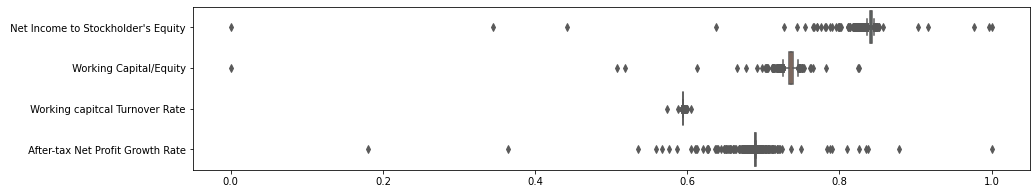


**** Displaying percentile of columns that are skewed from -40 to -20 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


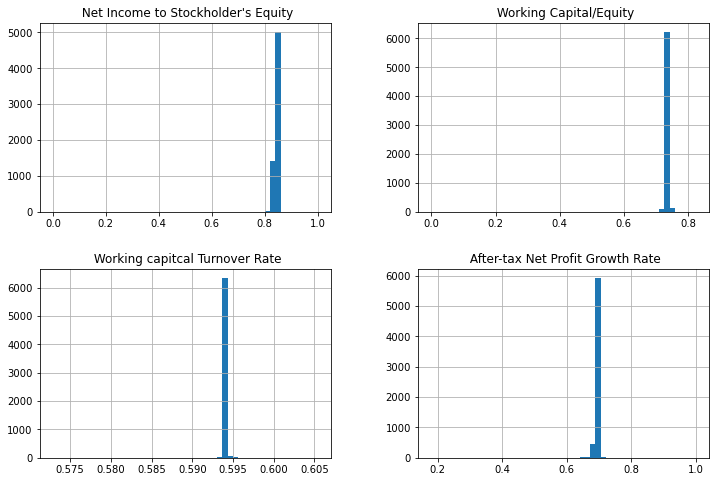



 **********Outliers beyond 0.01 percentile **********


2 minority class
2 rows of specific column  are imputed to median value 
0 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


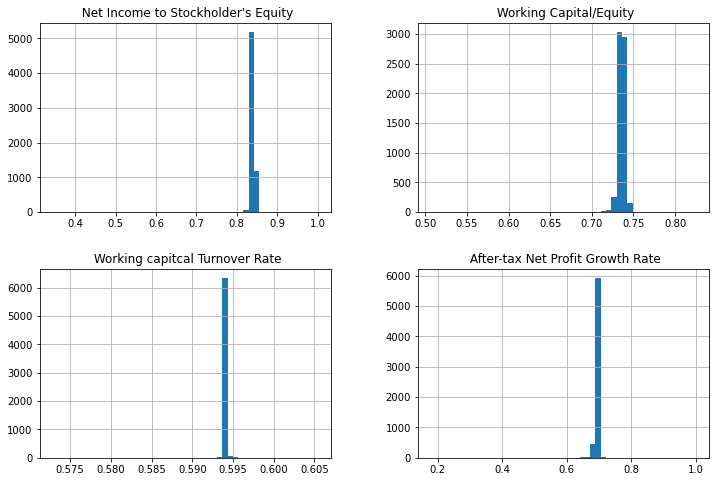

**** Box plot after removal of outliers****


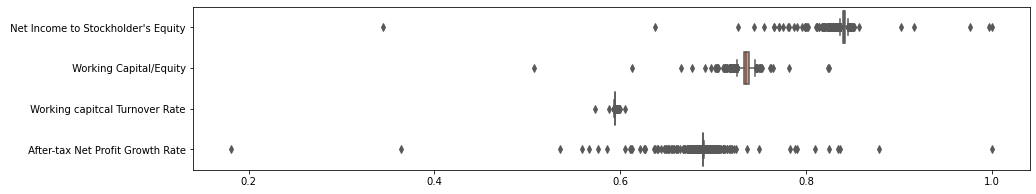


PERCENTILE
*******************************************************AFTER*******************************************************


[" Net Income to Stockholder's Equity",
 ' Working Capital/Equity',
 ' Working capitcal Turnover Rate',
 ' After-tax Net Profit Growth Rate']

In [143]:
# Not removing any outliers Just skewness
print_skewness_and_handle_outlier(-40,-20,bank_data_stage_1,'-',.01,False) 
# Final argument is False in the above function that means outlier removal will not happen hence table will be displayed for analysis


- we got only 2 data points as outliers that were from minority class hence not modifying those points because this would help model in classifying the minority class 

# Analysing Features having skewness from -85 to -50
 1. Operating Profit Growth Rate 
 2. Operating Profit Rate          

****Displaying first 5 rows of features that are having it skewness from -85 to -50****


Operating Profit Growth Rate   Operating Profit Rate
0                       0.848195                0.998969
1                       0.848088                0.998946
2                       0.848094                0.998857
3                       0.848005                0.998700
4                       0.848258                0.998973

**** Box plot before removal of outliers****


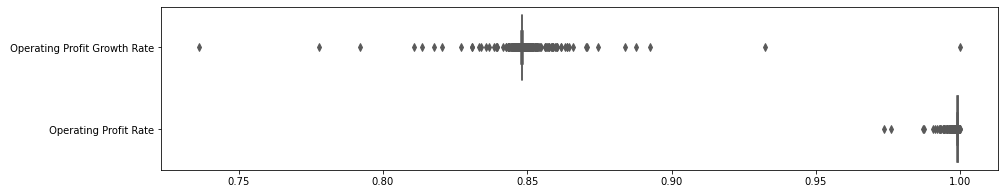


**** Displaying percentile of columns that are skewed from -85 to -50 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


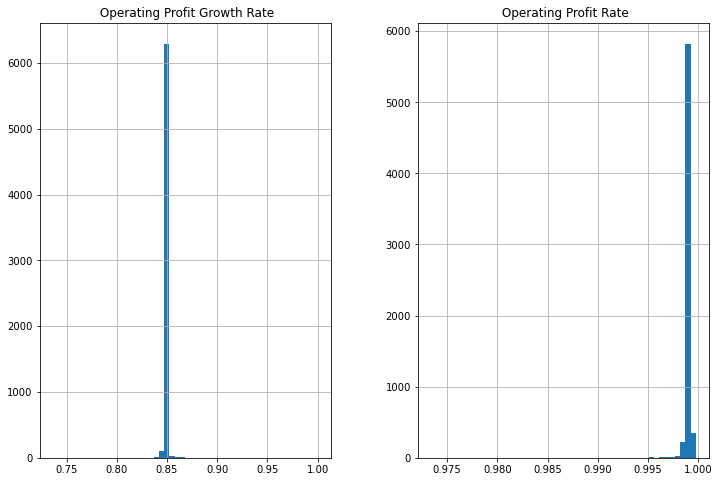



 **********Outliers beyond 0.01 percentile **********


0 minority class
0 rows of specific column  are imputed to median value 
0 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


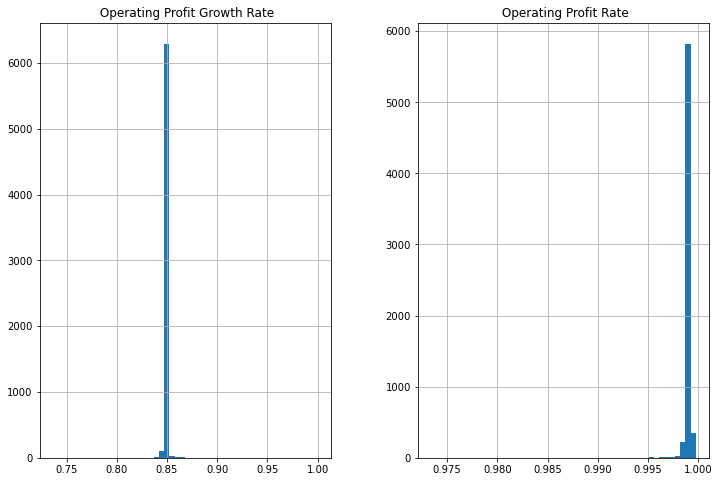

**** Box plot after removal of outliers****


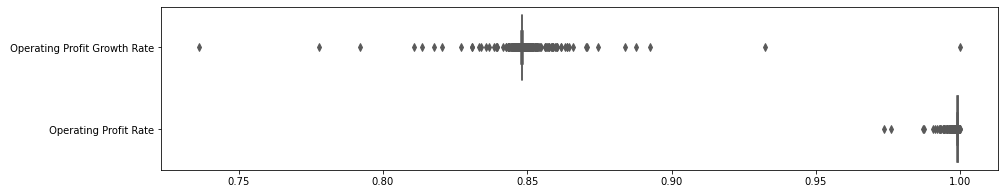


PERCENTILE
*******************************************************AFTER*******************************************************


[' Operating Profit Growth Rate', ' Operating Profit Rate']

In [144]:
print_skewness_and_handle_outlier(-85,-50,bank_data_stage_1,'-',.01,True)


# Checkpoint 2
## Splitting data

In [145]:
X=bank_data_stage_1.drop('Bankrupt?',axis=1)
y=bank_data_stage_1["Bankrupt?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
bank_data_stage_2=X_train.copy()
bank_data_stage_2["Bankrupt?"]=y_train
# Checking the shape of the training and testing sets
X_train.shape,y_train.shape,X_test.shape,y_test.shape,bank_data_stage_2.shape

((5172, 73), (5172,), (1294, 73), (1294,), (5172, 74))

# NOTE!!! The variable **[bank_data_stage_2]**   is a training set (X_train y_train) combined

In [146]:
# checking the classes balance in the split dataset
y_test.value_counts(),y_train.value_counts()

(0    1250
 1      44
 Name: Bankrupt?, dtype: int64,
 0    4996
 1     176
 Name: Bankrupt?, dtype: int64)

### 1. Training Set:
        a. Target 1 : 176
        b. Target 0 :4996
### 2. Testing Set:
        a. Target 1 : 44
        b. Target 0 :1250
        
## Hence the dataset is split we can perform any sampling method on training dataset

# Feature Selection :Select the best features and rank them in order using 
## (Select KFold Technique)

### We can use this ranked order features and sort them from high rank to rank  or high score to low score and checking the model performance for each Addition of features starting from high to low 

# NOTE!!! This can be also used for tuning the model and checking the model performance

## For Example:
- We have 4 Features with the target column below

<table ><tr><th >Feature 1 <th><th> Feature 2 <th><th> Feature 3<th><th> Feature 4 <th><th> Target <tr><tr>
<tr><td> 1.2 <td><td> 3.5 <td><td> .843 <td><td> .9.6<td><td> 1 <td><tr>
<tr><td> 1.6 <td><td> 1.5 <td><td> 0.43<td><td> .9.5 <td><td> 0<td><tr>
<tr><td> 5.9 <td><td> 95 <td><td> 0.5 <td><td> .9.8 <td><td> 0<td><tr>
<tr><td> 3.5 <td><td> 9.6 <td><td> .3 <td><td> .0.23 <td><td> 1<td><tr>
    <table>
1.By using Select K Best Method we calculate score of features that helps model in prediction
 
<table ><tr><th >Features <th><th> Score<tr><tr>
<tr><td> Feature 1 <td><td> 5<td><tr>
<tr><td> Feature 2 <td><td>25<td><tr>
<tr><td> Feature 3<td><td> 10<td><tr>
<tr><td> Feature 4<td><td>15<td><tr><table>
        
    
2.We make a list of features with calculated scores<br>
3.We sort the list based on ranking or scores
    
<table ><tr><th >Features <th><th> Score<tr><tr>
<tr><td> Feature 2 <td><td> 25<td><tr>
<tr><td> Feature 4 <td><td>15<td><tr>
<tr><td> Feature 3<td><td> 10<td><tr>
<tr><td> Feature 1<td><td>5<td><tr><table>
        
4.And We add one by one features from high score to low score to calculate the model performance
    
 [Feature 2]----------------------------------------------check model performance=====> score 1=.56<br>
 [Feature 2]+[Feature 4]----------------------------------check model performance =====> score 2=.65<br>
 [Feature 2]+[Feature 4]+[Feature 3]---------------------check model performance =====> score 3=.75<br>
 [Feature 2]+[Feature 4]+[Feature 3]+[Feature 1]----------check model performance =====> score 4=.32<br>
    
RESULTS!! Score 3 is higher and we would select sequence of Feature 2 , Feature 4 and Feature 3 more best  performance
    
5.We can use this a parameter to check the optimal sequence and limit of highest score to get best scores
    
6.And best score we get by checking the features selected in the model having maximum scores
    
    
    

        


In [147]:
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=70)
# Apply feature selection
fs.fit(bank_data_stage_2.drop("Bankrupt?",axis=1),bank_data_stage_2['Bankrupt?'])
feat_score=pd.DataFrame(data={'score':fs.scores_,'p_value':np.round(fs.pvalues_,4)},index=[x for x in bank_data_stage_1.columns if x not in ['Bankrupt?']]).sort_values("score",ascending=False)
feat_score=feat_score.reset_index().rename(columns={'index':'columns'})
# feat_score.rename(columns={'index':'columns'})
feat_score

columns       score  p_value
0                   Retained Earnings to Total Assets  403.773118   0.0000
1                                        Debt ratio %  382.439927   0.0000
2                                    Net worth/Assets  382.439927   0.0000
3    ROA(C) before interest and depreciation befor...  372.487581   0.0000
4             Persistent EPS in the Last Four Seasons  310.063059   0.0000
5                              Cash/Current Liability  286.252677   0.0000
6                 Current Liability to Current Assets  284.595750   0.0000
7                     Working Capital to Total Assets  247.313865   0.0000
8                         Current Liability to Assets  225.122244   0.0000
9                                Borrowing dependency  205.120464   0.0000
10                 Net Income to Stockholder's Equity  191.725273   0.0000
11                            Net Value Per Share (B)  172.137867   0.0000
12                              Liability-Assets Flag  146.025382   0.0000
13                      Equity to Long-term Liability  145.974589   0.0000
14                             Working Capital/Equity  128.954106   0.0000
15        Non-industry income and expenditure/revenue  110.983253   0.0000
16                               Total expense/Assets   90.930228   0.0000
17                         Total income/Total expense   85.334556   0.0000
18                             Operating Gross Margin   74.137990   0.0000
19                        Operating profit per person   64.427347   0.0000
20                                       Tax rate (A)   62.685816   0.0000
21                                  Cash/Total Assets   57.975673   0.0000
22                          Total assets to GNP price   57.198236   0.0000
23                          Quick Assets/Total Assets   52.781185   0.0000
24                                      Current Ratio   51.061844   0.0000
25                     Quick Assets/Current Liability   45.741873   0.0000
26                                      CFO to Assets   43.589989   0.0000
27                                Equity to Liability   42.928794   0.0000
28                    Fixed Assets Turnover Frequency   39.380221   0.0000
29        Inventory and accounts receivable/Net value   38.909708   0.0000
30                              Operating Profit Rate   38.850426   0.0000
31                                     Cash flow rate   36.832999   0.0000
32                               Total Asset Turnover   34.540194   0.0000
33                   Contingent liabilities/Net worth   32.300455   0.0000
34                            Average Collection Days   28.537532   0.0000
35                             Fixed Assets to Assets   28.537532   0.0000
36                         Total debt/Total net worth   28.537532   0.0000
37                         Allocation rate per person   28.537532   0.0000
38                       Accounts Receivable Turnover   28.537532   0.0000
39                                 Revenue per person   28.537532   0.0000
40                              Net Value Growth Rate   28.537532   0.0000
41                                        Quick Ratio   28.537532   0.0000
42               Total Asset Return Growth Rate Ratio   28.404717   0.0000
43                                Cash Flow Per Share   26.275563   0.0000
44                     Working capitcal Turnover Rate   25.605834   0.0000
45                       Operating Profit Growth Rate   21.745893   0.0000
46                          Cash Flow to Total Assets   20.771819   0.0000
47                        Current Assets/Total Assets   19.982075   0.0000
48                         Revenue Per Share (Yuan ¥)   18.624912   0.0000
49                                Cash Flow to Equity   16.779115   0.0000
50                            Total Asset Growth Rate   14.101149   0.0002
51                                Cash Reinvestment %   11.383942   0.0007
52                             Cash Flow to Liability   10.767865   0.0

 - These are the features that are ranked in descending order
 - As the rank scores are in order we can perform Forward Feature selection in a loop

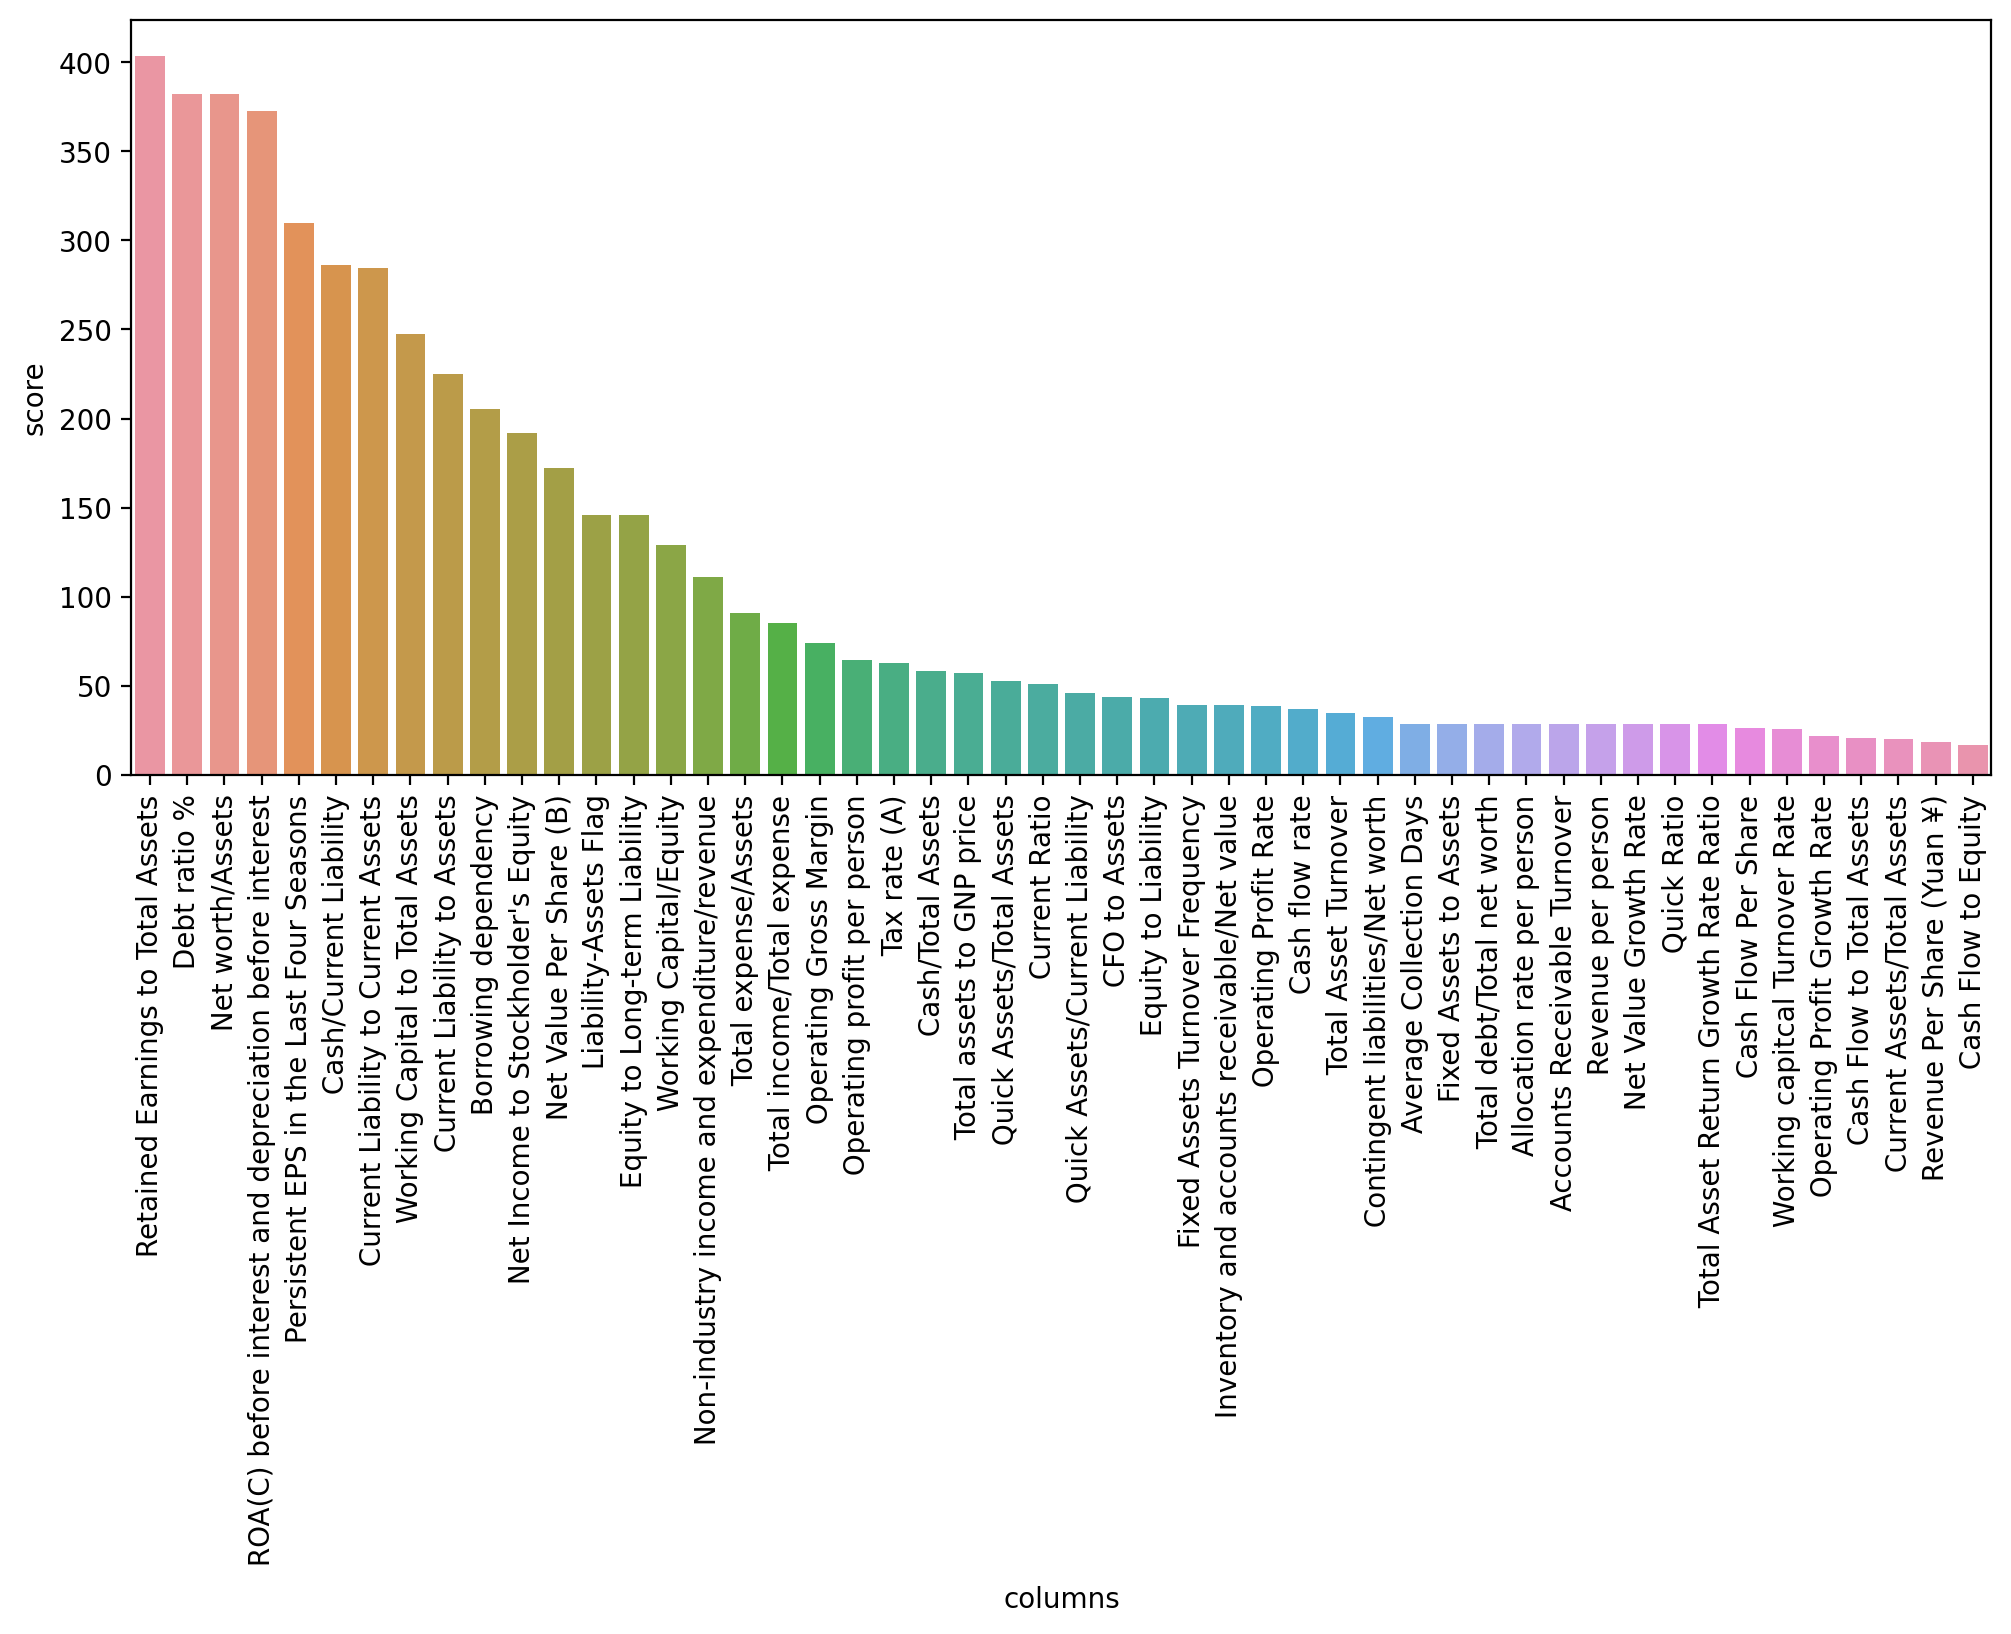

In [148]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(data=feat_score.head(50),y='score',x='columns')
plt.xticks(rotation=90)
plt.show()

 - Bar plot of Features vs Features rank or score 

## 1. Treating standard scale value IQR formula i.e 1.5 of  as an hyperparameter while handling outliers by varying it from 1.5 ,1.6,1.7 and so on....
- Q1=first quantile or 25 percentile
- Q3=third quantile or 75 percentile
- IQR - Q3-Q1
- lower limit = Q1 - **1.5** x IQR
- upper limit = Q3 + **1.5** x IQR

1. Normally we use standard value 1.5 as scale:
2. Removing all the value outlier according to 1.5 scale we end up removing 90% of data and nothing is left
3. We always have to bare with the outliers, but some times we can eliminate some of outliers , feature by feature 

### Problem: But!! dont know how much outliers on feature basis we cant eliminate
### 2. Solution:
- Ordering features that contain outliers occurence percentage from low to high or in ascending order wise

## And!! Now we got an another hyper parameter that is handling outlier for numbers for features, handling from feature that has less to outliers occurrence till the feature that has maximum outlier occurence


## For We have two hyper parameter to tune
1. IQR Scale value
2. High Rank to low rank  Feature Addition techinque 

In [149]:
def gather_outliers(data,cols,show_table=True,IQR_const=[1.5,1.7,1.8,1.9,2,2.1,2.2,2.5,2.9,3]):
    '''
    data:dataframe
    cols:features
    show:it shows table if true (Default True)
    IQR_const:IQR scale for outlier detection default value is [1.5,1.7,1.8,1.9,2,2.1,2.2,2.5,2.9,3]
    TYPE:
    data:dataframe
    cols:list
    show:bool
    IQR_const:list

    RETURNS:
    This function returns a table of outliers if handled according to the 
    scale of IQR and calculates the total data lost due to imputation of 
    outliers with set of indices removed from the dataframe due to outlier handling

    '''
    
    outlier_table=pd.DataFrame()
    # Initializing the dict object to store amount of outlier occurrence in the particular feature
    outlier_dict={}
    # Iterating over the IQR scales
    for IQR_constant in IQR_const:
        # Initializing the dict object Key related to the IQR scale to store amount of outlier occurrence in the particular feature
        outlier_dict[f'{IQR_constant} * IQR']={}
        # Initializing set to store the indices of the outliers indices for the IQR scale
        total_indices=set()
        # Iterating over the features
        for i in cols:
            
            #Initializing set to store outlier indices for the particular feature
            outlier_index_per_feat=set()
            # Calculating the first quantile
            first_quantile=data[i].quantile(.25)
            # Calculating the third quantile
            third_quantile=data[i].quantile(.75)
            # Calculating the IQR
            IQR=third_quantile-first_quantile
            # Calculating the lower bound
            lower_limit=first_quantile - IQR*IQR_constant
            # Calculating the upper bound
            upper_limit=third_quantile + IQR*IQR_constant
            # Filetering the dataframe based on the upper bound
            upper_outliers=data.loc[data[i] >  upper_limit,cols+['Bankrupt?']]
            # Adding the indices of the upper outliers to the set
            outlier_index_per_feat.update(upper_outliers.index)
            total_indices.update(upper_outliers.index)
            if show_table:
                display(upper_outliers)
            # Filetering the dataframe based on the lower bound
            lower_outlier=data.loc[data[i] <  lower_limit,cols+['Bankrupt?']]
            outlier_index_per_feat.update(lower_outlier.index)
            total_indices.update(lower_outlier.index)
            if show_table:
                display(lower_outlier)
            # Storing percentage of outlier occurrence of the particular feature
            outlier_dict[f'{IQR_constant} * IQR'][i]=np.round((len(outlier_index_per_feat)/data.shape[0])*100,2)
        # Storing the total amount of outlier occurrence for the particular IQR scale
        outlier_dict[f'{IQR_constant} * IQR']["Total"]=np.round((len(total_indices)/data.shape[0])*100,2)
    return pd.DataFrame(outlier_dict),total_indices
        
    
    

    

 - Checking only the feature's outliers occurence percentage of majority class
 - And then we check the outliers occurence in each features for every IQR scale



In [150]:

# Calculating all the outliers occerence  
outlier_indices=gather_outliers(bank_data_stage_2[bank_data_stage_2['Bankrupt?']==0],skewness_Range(-80,86),False)
# Sorting the first column of the outlier table ascendingly
outlier_indices[0].sort_values('1.5 * IQR',inplace=True)
ascendingly_order_outlier_occr_feat=outlier_indices[0].index
outlier_indices[0].style.bar()


### Only data point of majority class is been fed Because there is no compromise for modifying data of minority class
- If we start up removing outliers of from all features above and below 1.5 * IQR we ending removing 92% of data
- If we start up removing outliers of from all features above and below 1.7 * IQR we ending removing 90% of data
- If we start up removing outliers of from all features above and below 1.8 * IQR we ending removing 89% of data
- If we start up removing outliers of from all features above and below 1.9 * IQR we ending removing 87% of data
- If we start up removing outliers of from all features above and below 2.0 * IQR we ending removing 87% of data
- If we start up removing outliers of from all features above and below 2.1 * IQR we ending removing 85% of data
- If we start up removing outliers of from all features above and below 2.2 * IQR we ending removing 84% of data
- If we start up removing outliers of from all features above and below 2.5 * IQR we ending removing 81% of data
- If we start up removing outliers of from all features above and below 2.9 * IQR we ending removing 78% of data
- If we start up removing outliers of from all features above and below 3.0 * IQR we ending removing 77% of data



In [151]:
outlier_indices[0].iloc[10:,].T.style.bar()

### Suppose you want to select first 15 features for eliminating outliers with IQR scale range from (1.5 to 3.0) 

In [152]:
# Storing first 15 features that have less outlier occurrence
first_15_col=list(ascendingly_order_outlier_occr_feat[:15])
# Printing the table of outlier occurence of the first 15 features having low outlier occurrence 
gather_outliers(bank_data_stage_2[bank_data_stage_2['Bankrupt?']==0],first_15_col,False)[0].style.bar()

- Hence data is already split and data we are handling in training data
- Only data related to majority class is been fed so there is no problem with loosing even 50% of data while handing outliers because if 50% of data is removed then we can assume this operation as under sampling
- From the above table we can tell that from eliminating  outliers  of from first 15 features with IQR scale 1.5 we end up removing only 8.17% of data
- Simillary like this we can take as much as features we want like 20 ,30, 40 features and so on till the 73 as we have only 73 features

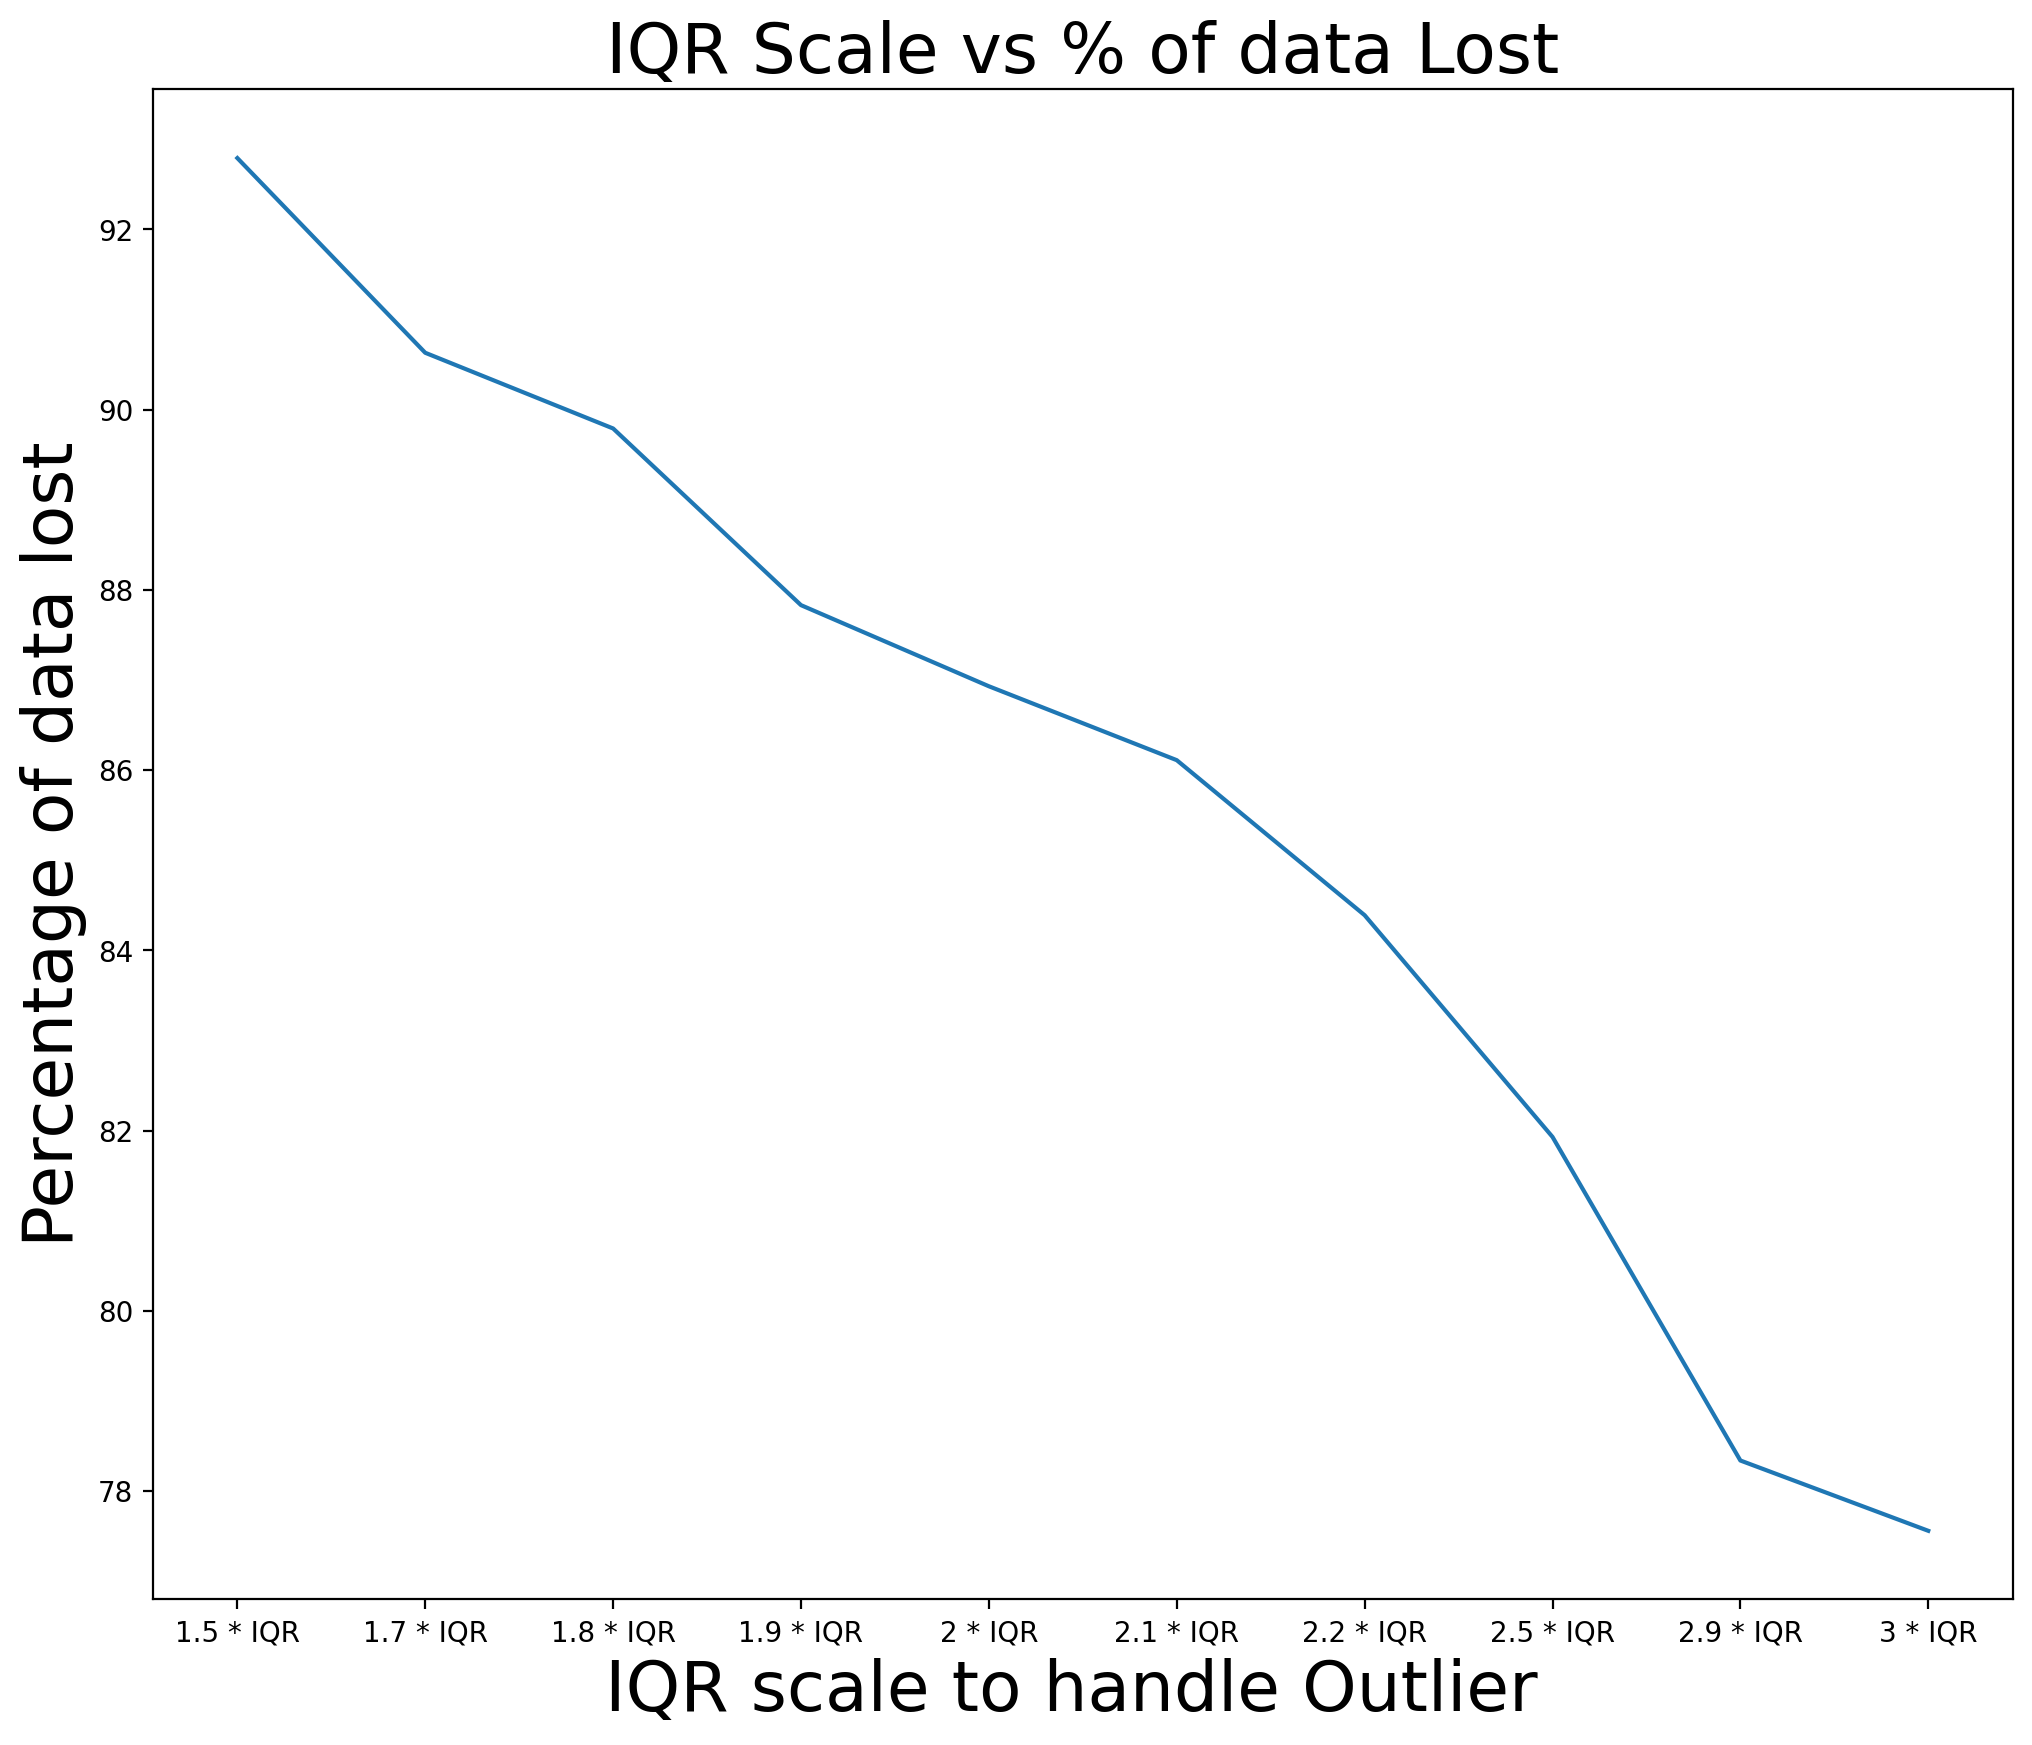

In [153]:
plt.figure(figsize=(12,10),dpi=200)
sns.lineplot(y=outlier_indices[0].loc["Total"].values,x=outlier_indices[0].columns)


graph_label_title("IQR scale to handle Outlier ",'Percentage of data lost','IQR Scale vs % of data Lost')

# outlier_indices[0].iloc[:,[1]].values

- As the IQR scale increase the % of data lost on handling outliers decreases 

In [154]:
# CAUTION!!!! This function only imputes outliers of majority class
def impute_outliers(data,IQR_constant,cols):
    '''
    data:dataframe
    IQR_constant:IQR scale for outlier detection
    cols:features
    TYPE:
    data:dataframe
    IQR_constant:float
    cols:list

    Returns:
    This function returns the dataframe with imputed outliers 
    CAUTION!!!! it only imputes outliers of majority class
    '''
    # Separating dataframe according to the class (Minority class) or (Majority class)
    condition_0=data["Bankrupt?"]==0
    # Store the majority class 
    data_0=data[condition_0]
    # Store the minority class
    data_1=data[~ condition_0]
    # Initializing the set to store the indices of the outliers
    outlier_indices=set()
    # Iterating over the features
    for i in cols:
        # Calculating the first quantile
        first_quantile=data[i].quantile(.25)
        # Calculating the third quantile
        third_quantile=data[i].quantile(.75)
        # Calculating the IQR
        IQR=third_quantile-first_quantile
        # Calculating the lower bound
        lower_limit=first_quantile - IQR*IQR_constant
        # Calculating the upper bound
        upper_limit=third_quantile + IQR*IQR_constant
        # Filetering the dataframe based on the upper bound
        upper_outliers=data_0.loc[data_0[i] >  upper_limit,cols]
        # Adding the indices of the upper outliers to the set
        outlier_indices.update(upper_outliers.index)
        # Removing the outliers from dataframe based on the upper bound
        data_0.drop(upper_outliers.index,inplace=True)
        # Filetering the dataframe based on the lower bound
        lower_outlier=data_0.loc[data_0[i] <  lower_limit,cols]
        # Adding the indices of the lower outliers to the set
        outlier_indices.update(lower_outlier.index)
        # Removing the outliers from dataframe based on the lower bound
        data_0.drop(lower_outlier.index,inplace=True)
   
    return pd.concat([data_0,data_1])

### We also have the list of columns with ranking of features which we have from SelectK technique
- We can also use this also for hyper parameter tuning

In [155]:
# Storing the first 33 outliers having less outlier occurrence
first_33_col=list(ascendingly_order_outlier_occr_feat[:33])
gather_outliers(bank_data_stage_2[bank_data_stage_2['Bankrupt?']==0],first_33_col,False,IQR_const=[2.2,2.5,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1])[0].style.bar()

- Handling outliers in more features like 25 to 35 features  from ascendlly ordered feature according to the outliers occurrence and 33 is the best of them (testing manually)
- Taking max IQR scale value like 2.5,3.5,4... tends to chip out the left out small part of noises or outliers present in the features having more outliers occurrence and ignoring the features having less outliers occurrence, which may help in revealing data patterns that help in increasing in model performance 

In [156]:

def check_best_IQR_scale(model,sampling_method,IQR_range=[1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.5]):
    '''
    model: estimator
    sampling_method:Over_sampling or Over sampling Object
    IQR_range: Range of IQR Scale
    
    This function Iterates through the IQR scales and check the model performance and stores the performance
    This function returns the model performance of all the IQR scales in DataFrame  Object
    '''
#     Dictionary to store the model evaluation metrics of IQR scales
    data_dict={}
#     For loop to iterate through out the IQR scales supplied 
    for i in IQR_range:
# Store the Data frame that  is filtered by outliers beyond the limit of IQR scale i.e for examples 1.5,1.6,1.7.. and so on
        dataframe=impute_outliers(bank_data_stage_2,i,list(ascendingly_order_outlier_occr_feat[:33]))
#     Stores  the model performance of data which outliers are filtered with the IQR scale
        data_dict[i]=get_model_performance(model,dataframe,sampling_method)
#    returning the collection of  model performance of all the range of IQR scales supplied
    return pd.DataFrame(data_dict).T
    
        
        
        
def get_model_performance(model,dataframe,sampling_method,display_report=False,custom_featrues=False,return_trained_model=False):
    '''
    
    model: estimator
    sampling_method:Over_sampling or Over sampling Object
    display_report: To display the classification report or not
    custom_featrues: To use the custom features or not
    
    TYPE:
    model: estimator object
    dataframe: DataFrame Object
    sampling_method: Over_sampling or Over sampling Object
    display_report: boolean
    custom_featrues: boolean or list of features

    1. This function takes the model and dataframe and Over sampling 
    Object and returns the model performance
    2. This function returns the model performance of the model in Dictionary Object
    '''
    # If custom features are not supplied then use the default features

    X_train=dataframe.drop("Bankrupt?",axis=1)
    y_train=dataframe["Bankrupt?"]
    
    # If custom features are supplied then model uses the selected features
    if custom_featrues != False:
        X_test_=X_test[custom_featrues]
        X_train=X_train[custom_featrues]
    else:
        X_test_=X_test
        
  # Scalliing the data
    scaller=StandardScaler()
    X_train_=scaller.fit_transform(X_train)
    X_train_,y_train_=sampling_method.fit_resample(X_train_,y_train)
    X_test_=scaller.transform(X_test_)

#    Fitting the model
    model.fit(X_train_,y_train_)
    
#    Predicting the model
    predictions=model.predict(X_test_)
    
#    Calculating the model performance
    f1=f1_score(y_test,predictions)
    pre=precision_score(y_test,predictions)
    reca=recall_score(y_test,predictions)
    acc=accuracy_score(y_test,predictions)
    
#   Displaying the metrics
    if display_report:
        print(f1,'f1score')
        print(acc,'accuracy')
        print(pre,'precision')
        print(reca,'recall')
        print(classification_report(y_test,predictions,))
        print(confusion_matrix(y_test,predictions,))
    if return_trained_model:
        return {'f1_score':f1,'precision':pre,'recall':reca,'accuracy':acc},model,X_test_
    else :
        return {'f1_score':f1,'precision':pre,'recall':reca,'accuracy':acc}
    
def print_metrics(predictions):
    '''
    predictions: predicted Data
    TYPE:
    predictions:  numpy array
    This function takes the predicted data and prints the metrics
    '''
    # Calculating the metrics
    f1=f1_score(y_test,predictions)
    pre=precision_score(y_test,predictions)
    reca=recall_score(y_test,predictions)
    acc=accuracy_score(y_test,predictions)
    
    # Displaying the metrics
    print(f1,'f1score')
    print(acc,'accuracy')
    print(pre,'precision')
    print(reca,'recall')
    print(classification_report(y_test,predictions,))
    print(confusion_matrix(y_test,predictions))
    return {'f1_score':f1,'precision':pre,'recall':reca,'accuracy':acc}

def plot_best_score(data,model_name):
    print(data["f1_score"].max())
    max_score=data[data["f1_score"]==data["f1_score"].max()].head(1)
    display(data[data["f1_score"]==data["f1_score"].max()])
    precision=max_score["precision"].values
    recall=max_score["recall"].values
    f1_score=max_score["f1_score"].values
    max_index=max_score.index[0]


    plt.figure(figsize=(10,5),dpi=200) # for better resolution

    # plotting the metrics of model to visualize the performance
    plt.plot(data.index,data["f1_score"],'y',label="fi_score", linewidth = '5')
    plt.plot(data.index,data["recall"],'r',label="recall", linewidth = '5')
    plt.plot(data.index,data["precision"],'g',label="precision", linewidth = '5')
    
    # Highlighting the best part of curve
    plt.axvline(x=max_index,label="Max IQR scale",color ="orange")
    plt.axhline(y=f1_score,label="f1-score",color ="green")
    plt.axhline(y=precision,label="precision",color='red')
    plt.axhline(y=recall,label="recall",color='yellow')
    graph_label_title('IQR Scale value',"scale for metrics ", model_name)
    plt.legend()
    plt.show()

# Displaying the model performance metrics of IQR scale range between 2.1 to 3.5
    display(data.style.highlight_max())

# Models

1. XGboost
2. Random Forest
3. Gradient Boost

## Tuning data  by IQR scale for XGBoost model
- Performance is found be optimum between values between  **3.3** to **3.9**  (From manual testing)

In [157]:
# Tuning the model based on IQR scale and checking the best performance
chart_IQR_scale_tune_XGB=check_best_IQR_scale(XGBClassifier(),ADASYN(random_state=42,n_neighbors=5,n_jobs=-1),[2.0,2.2,2.3,2.5,3.3,3.4,3.7,3.8,3.9])

[19:23:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:23:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.5299145299145299


f1_score  precision    recall  accuracy
3.8  0.529915   0.424658  0.704545  0.957496

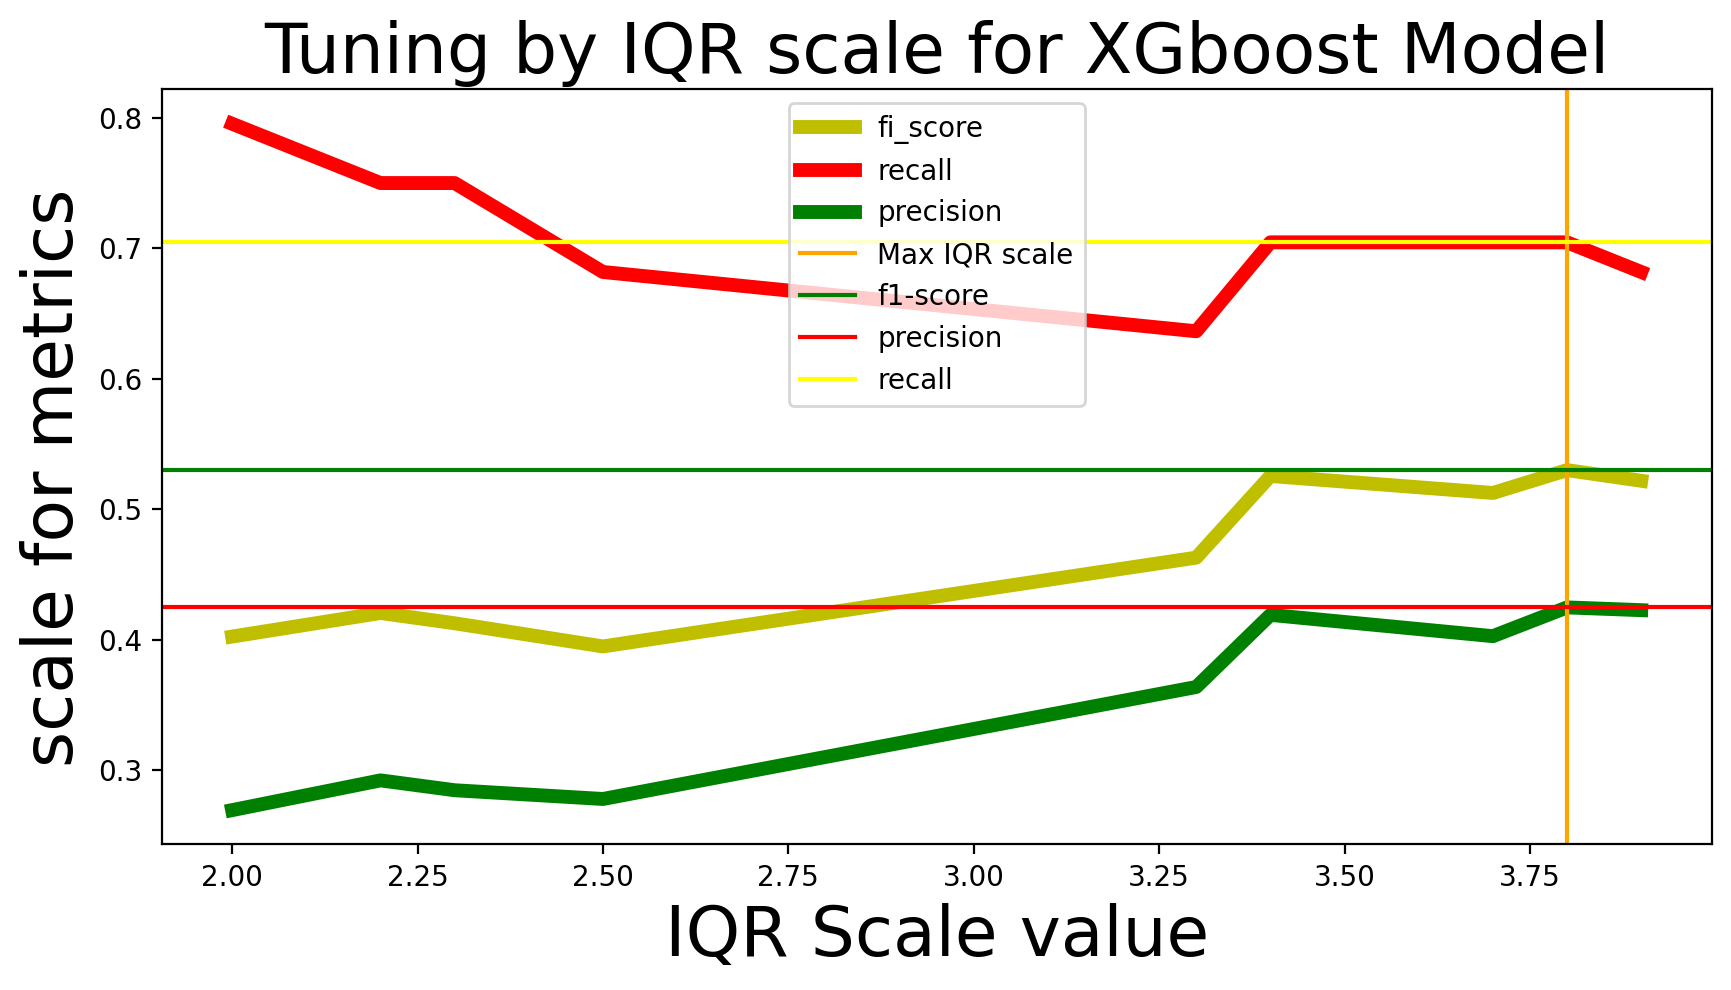

In [158]:
plot_best_score(chart_IQR_scale_tune_XGB,"Tuning by IQR scale for XGboost Model")

- From the above table IQR scale value **3.8** will give us better performance compared to other IQR scales values
1. F1 score - 0.529
2. Precision - 0.42
3. Recall - 0.70

1. Hence treating the data with the IQR scale value 3.8 and storing in variable **data_xgb** 
2. **data_xgb** : This is a data with outlier handled suitable for model XGBoost 

In [159]:
# Storing the data treated with Outlier of IQR scale 3.8
data_xgb=impute_outliers(bank_data_stage_2,3.8,list(ascendingly_order_outlier_occr_feat[:33]))

# Calculating the overall performance of the model
get_model_performance(XGBClassifier(),
                      data_xgb,ADASYN(random_state=42,n_neighbors=5,n_jobs=-1),
                      display_report=True)

[19:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5299145299145299 f1score
0.9574961360123647 accuracy
0.4246575342465753 precision
0.7045454545454546 recall
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1250
           1       0.42      0.70      0.53        44

    accuracy                           0.96      1294
   macro avg       0.71      0.84      0.75      1294
weighted avg       0.97      0.96      0.96      1294

[[1208   42]
 [  13   31]]


{'f1_score': 0.5299145299145299,
 'precision': 0.4246575342465753,
 'recall': 0.7045454545454546,
 'accuracy': 0.9574961360123647}

## 1. Tuning model by Feature Selection for XGBoost Model
    (adding one by one higly ranked features from top  and checking if there is a raise in model performance )

In [160]:
# Storing the data handled by outliers beyond IQR scale 3.8
data_xgb=impute_outliers(bank_data_stage_2,3.8,list(ascendingly_order_outlier_occr_feat[:33]))

# Storing the model performance metrics 
feature_selection_tune_xgb={}

# Starting feature selection from 49th ranked feature to last ranked feature
features_=list(feat_score['columns'].values[:49])

# Iterating from 49th ranked feature to 55th ranked feature
for i in feat_score['columns'].values[49:65]:
# Adding the next ranked feature to the list of features
    features_.append(i)
    
# Storing the model performance metrics for the current features set
    feature_selection_tune_xgb[len(features_)]=get_model_performance(XGBClassifier(),
                                                                     data_xgb,ADASYN(random_state=42,
                                                                                     n_neighbors=5
                                                                                     ,n_jobs=-1),
                                                                     display_report=False,
                                                                     custom_featrues=features_)

[19:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.5454545454545454


f1_score  precision  recall  accuracy
52  0.545455   0.428571    0.75  0.957496

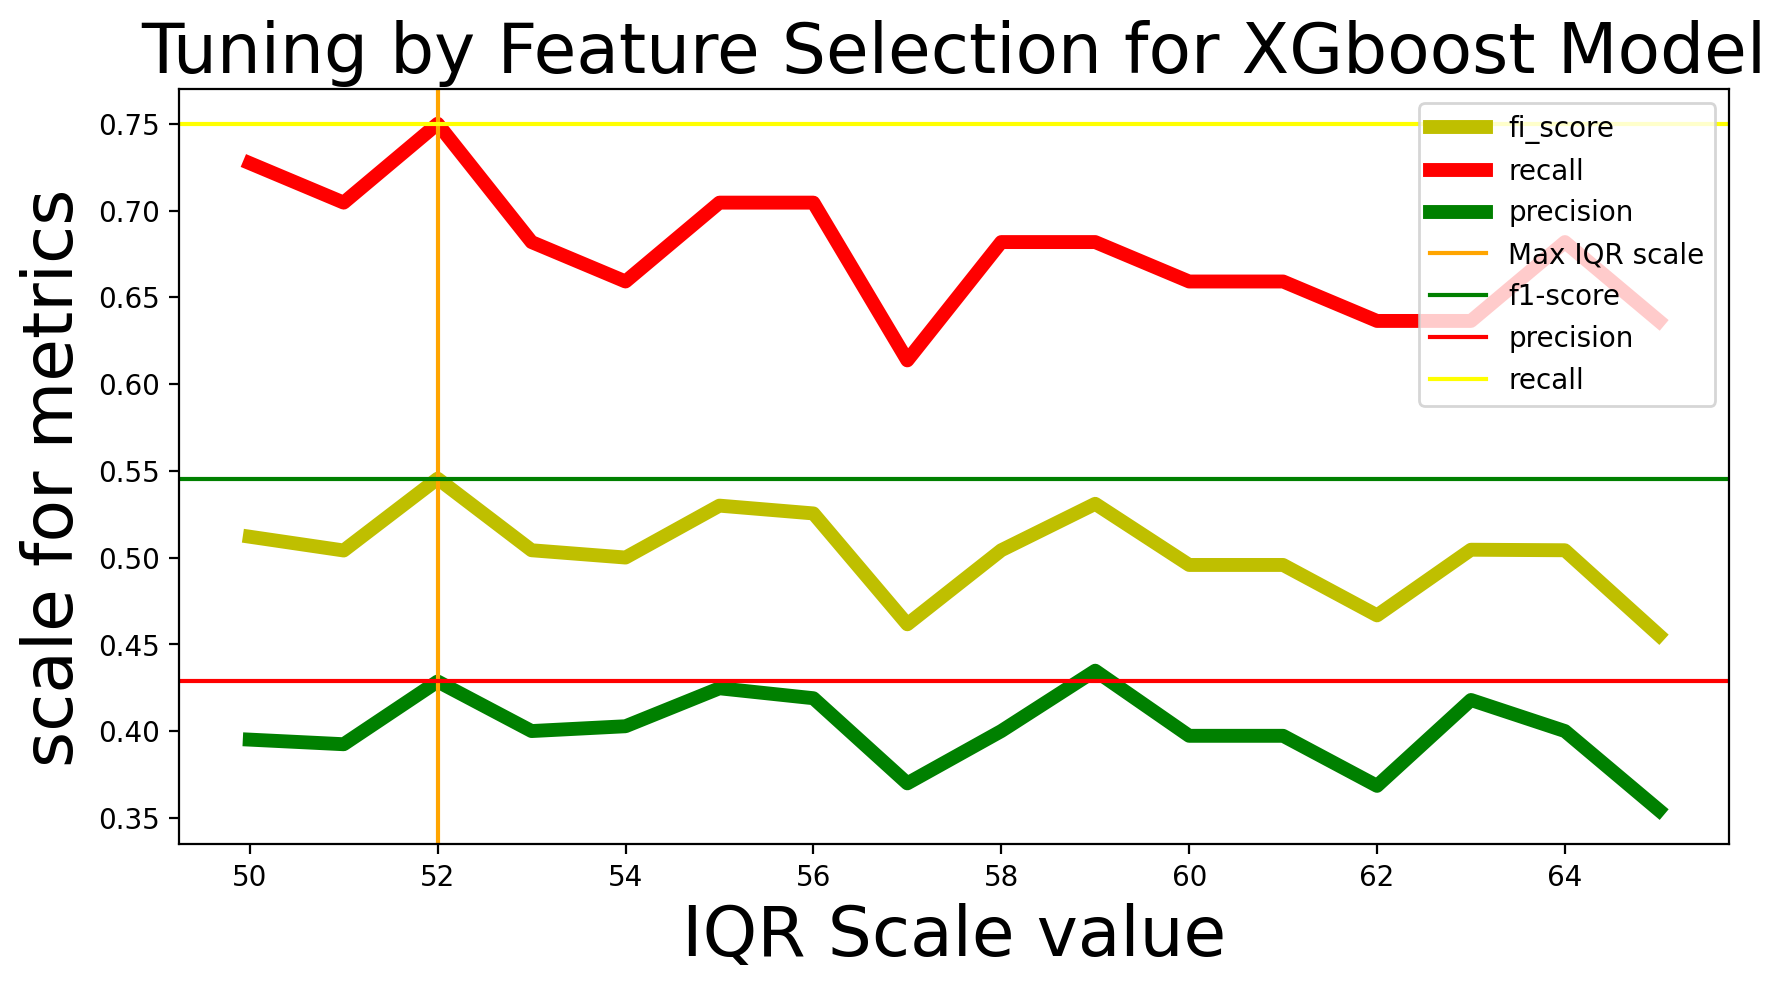

In [161]:
# Storing data stored in dictionary data in the form of dataframe 
feature_selection_tune_xgb_=pd.DataFrame(feature_selection_tune_xgb).T
plot_best_score(feature_selection_tune_xgb_,"Tuning by Feature Selection for XGboost Model")


- From above table we can conclude that selecting only **first highly ranked 52 features** out 73 features will increase our model performance :

- From:
1. F1 score - 0.529
2. Precision - 0.42
3. Recall - 0.70

- To:
1. F1 score - 0.545
2. Precision - 0.42
3. Recall - 0.75

From this we can see that there is a gradual raise in **F1-score** and **Recall** score while the **precision** being constant





In [164]:
# Storing the  features selected from rank 1 to rank 52
features_for_XgBoost=list(feat_score['columns'].values[:52])

# Storing the data treated with Outlier of IQR scale 3.8 and features selected from rank 1 to rank 52
data_xgb=impute_outliers(bank_data_stage_2,3.8,list(ascendingly_order_outlier_occr_feat[:33]))

# Checking the overall performance of the model
get_model_performance(XGBClassifier(),
                      data_xgb,ADASYN(random_state=42,n_neighbors=5,n_jobs=-1),
                      display_report=True,
                      custom_featrues= features_for_XgBoost)

[19:35:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5454545454545454 f1score
0.9574961360123647 accuracy
0.42857142857142855 precision
0.75 recall
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1250
           1       0.43      0.75      0.55        44

    accuracy                           0.96      1294
   macro avg       0.71      0.86      0.76      1294
weighted avg       0.97      0.96      0.96      1294

[[1206   44]
 [  11   33]]


{'f1_score': 0.5454545454545454,
 'precision': 0.42857142857142855,
 'recall': 0.75,
 'accuracy': 0.9574961360123647}

## Hypertuning XGBoost model with model parameters to check the improvement in performance

In [221]:
# Storing the data suitable for Xgboost model giving best performance
X_train=data_xgb[features_for_XgBoost]
y_train=data_xgb["Bankrupt?"]

# Scaling the data
scaller=StandardScaler()
X_train_=scaller.fit_transform(X_train)
X_test_=scaller.transform(X_test[features_for_XgBoost])

# OverSampling the data to balance the class
X_train_,y_train_=ADASYN(random_state=42,n_neighbors=5,n_jobs=-1).fit_resample(X_train_,y_train)

# Storing the parameters for Xgboost model for tuning
param_grid={'n_estimators':[100,200,300],'learning_rate':[0.2,0.3,0.4,0.5,0.6],'max_depth':[2,3,4,5,6],}

model=XGBClassifier()

# Creating an instance of the GridSearchCV with the parameters and the model
grid=RandomizedSearchCV(estimator=model,param_distributions= param_grid
                        ,cv=5,verbose=1,
                        scoring='f1')

# Fitting the model
grid.fit(X_train_,y_train_)
print('\n Best Parameters\n',grid.best_params_)
# Storing the best parameters
model=grid.best_estimator_

# Printing the model evaluation metrics
print_metrics(predictions=model.predict(X_test_))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:44:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:37

[16:47:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'f1_score': 0.5299145299145299,
 'precision': 0.4246575342465753,
 'recall': 0.7045454545454546,
 'accuracy': 0.9574961360123647}

- Best score of XGBoost model is tuned by  
      1.Feature selection method 
      2. IQR scale 
      3. Model Parameter Tuning 
          a. n_estimators:[100,200,300]
          b. learning_rate:[0.2,0.3,0.4,0.5,0.6]
          c. max_depth:[2,3,4,5,6]
    1. Recall     =>0.52
    2. Precision  =>0.42 
    3. F1- Score  =>0.68 
    
    
- Score of XGboost tuned model is by  
      1.Feature selection method 
      2. IQR scale 
    1. F1 score - 0.545
    2. Precision - 0.42
    3. Recall - 0.75
    
    
 - Now the model is tuned by  
      1. **Feature selection method** 
      2. **IQR scale**  
 - While performing the Grid Search the model will learn according to the **validation set** which hypertuned by feature selection and IQR scale 
 - Validation set is totally different from Test set which is untouched and might expect some performance drop on hypertuned model compared to model which is not tuned.
 


    
 - Best Scores from Hypertuned XGBoost model is low compared to  XGBoost that is not Hypertuned because cross validation inside the Random Search trains its model 


## Tuning data for Random Forest model for IQR scale .
- Performance is found be optimum between values between  **2.3** to **3.3** (From manual testing)

In [180]:
# Storing the perforamces of model of all values in range of IQR values from range 2.1 to 3.5
chart_IQR_scale_tune_RF=check_best_IQR_scale(RandomForestClassifier(),
                                             ADASYN(random_state=42,n_neighbors=5,n_jobs=-1),
                                             [2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,])


In [157]:
def plot_best_score(data,model_name):
    print(data["f1_score"].max())
    max_score=data[data["f1_score"]==data["f1_score"].max()]
    display(data[data["f1_score"]==data["f1_score"].max()])
    precision=max_score["precision"].values
    recall=max_score["recall"].values
    f1_score=max_score["f1_score"].values
    max_index=max_score.index[0]


    plt.figure(figsize=(10,5),dpi=200) # for better resolution

    # plotting the metrics of model to visualize the performance
    plt.plot(data.index,data["f1_score"],'y',label="fi_score", linewidth = '5')
    plt.plot(data.index,data["recall"],'r',label="recall", linewidth = '5')
    plt.plot(data.index,data["precision"],'g',label="precision", linewidth = '5')
    
    # Highlighting the best part of curve
    plt.axvline(x=max_index,label="Max IQR scale",color ="orange")
    plt.axhline(y=f1_score,label="f1-score",color ="green")
    plt.axhline(y=precision,label="precision",color='red')
    plt.axhline(y=recall,label="recall",color='yellow')
    graph_label_title('IQR Scale value',"scale for metrics ", model_name)
    plt.legend()
    plt.show()

# Displaying the model performance metrics of IQR scale range between 2.1 to 3.5
    display(data.style.highlight_max())

0.46357615894039733


f1_score  precision    recall  accuracy
2.4  0.463576   0.327103  0.795455  0.937403

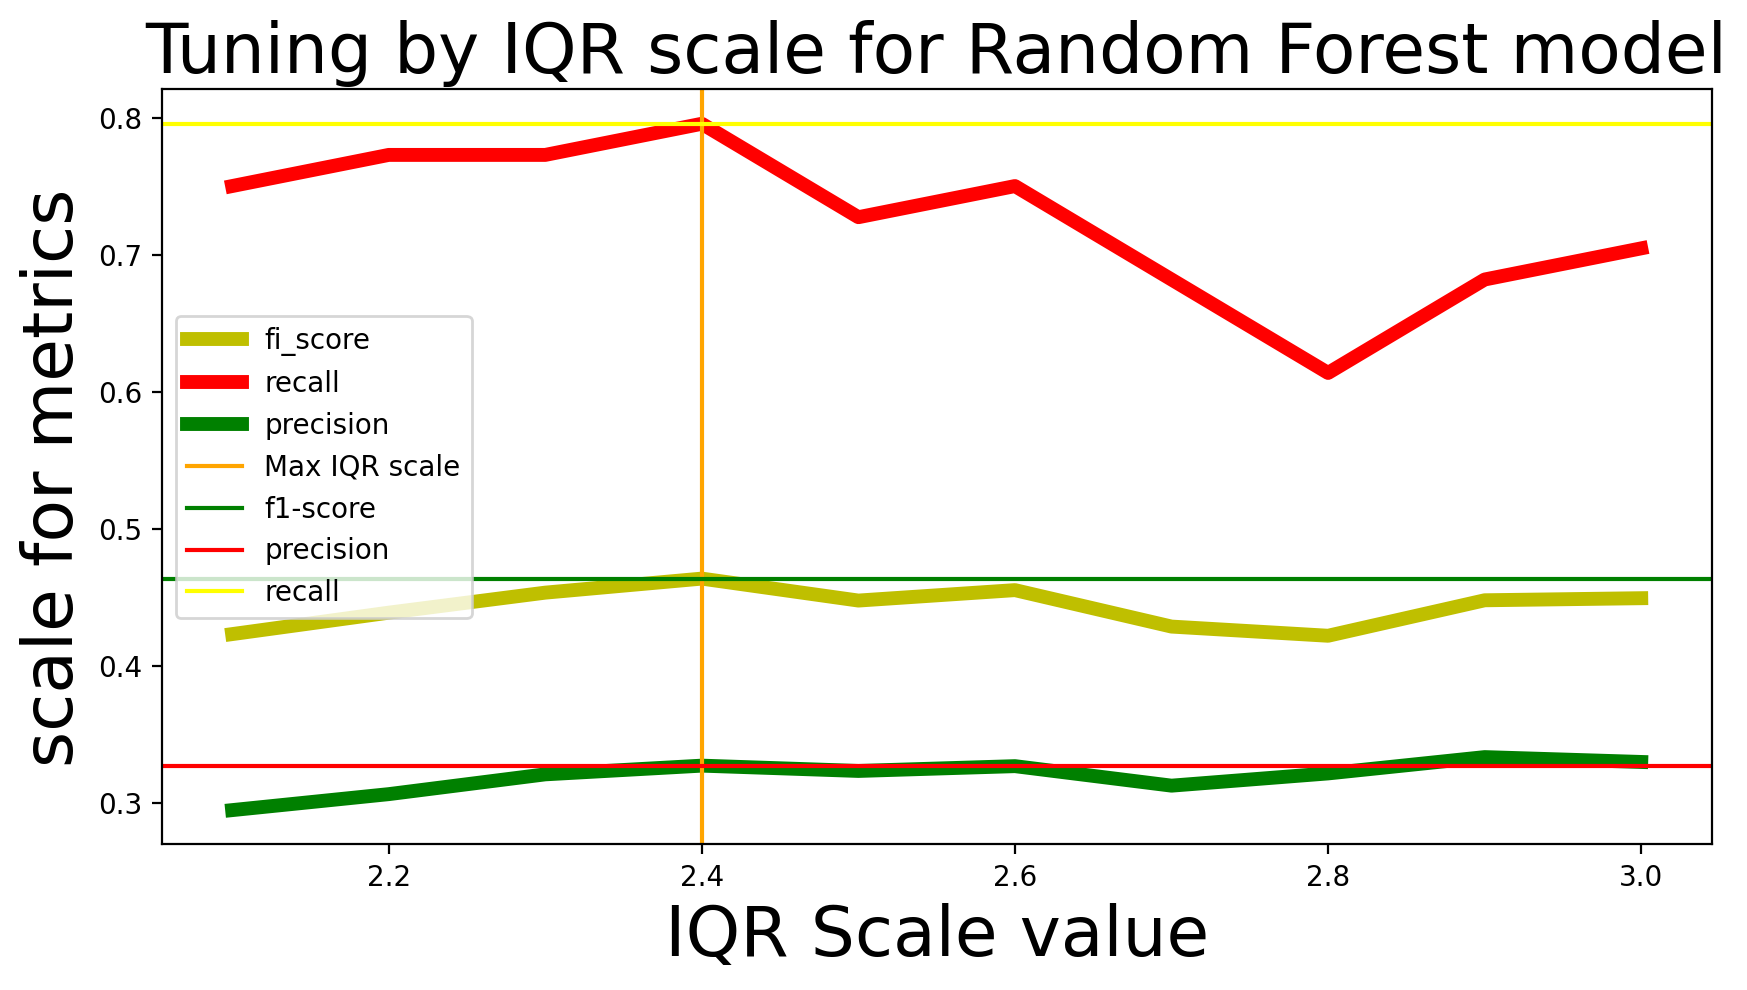

In [181]:
plot_best_score(chart_IQR_scale_tune_RF,"Tuning by IQR scale for Random Forest model")


- From the above table IQR scale value **2.4** will give us better performance compared to other IQR scales values
1. F1 score - 0.46
2. Precision - 0.32
3. Recall - 0.79

1. Hence treating the data with the IQR scale value 2.3 and storing in variable **data_rf** 
2. **data_rf** : This is a data with outlier handled suitable for model Random Forest 

In [182]:
# Storing best IQR scale value that gives best performance for Random Forest model
IQR_scale=2.4

# Storing the  data treated with Outlier of IQR scale 2.5 
data_rf=impute_outliers(bank_data_stage_2,IQR_scale,list(ascendingly_order_outlier_occr_feat[:33]))

# Checking the overall performance of the model with best IQR scale
get_model_performance(RandomForestClassifier(),
                      data_rf,ADASYN(random_state=42,n_neighbors=5,n_jobs=-1)
                      ,display_report=True)

0.44295302013422816 f1score
0.9358578052550232 accuracy
0.3142857142857143 precision
0.75 recall
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1250
           1       0.31      0.75      0.44        44

    accuracy                           0.94      1294
   macro avg       0.65      0.85      0.70      1294
weighted avg       0.97      0.94      0.95      1294

[[1178   72]
 [  11   33]]


{'f1_score': 0.44295302013422816,
 'precision': 0.3142857142857143,
 'recall': 0.75,
 'accuracy': 0.9358578052550232}

##  Tuning model by Feature Selection for Random Forest Model
    (adding one by one higly ranked features from top  and checking if there is a raise in model performance )

In [183]:
# Storing the data handled by outliers beyond IQR scale 2.5
feature_selection_tune_rf={}
# Storing first 60 ranked features
features_=list(feat_score['columns'].values[:60])
# Iterating through the features from rank 55 to last ranked features
for i in feat_score['columns'].values[60:]:
    # Adding next ranked feature to the feature  list
    features_.append(i)
    # Storing the model performance metrics for the features
    feature_selection_tune_rf[len(features_)]=get_model_performance(RandomForestClassifier()
                                                                    ,data_rf,ADASYN(
                                                                        random_state=42,
                                                                        n_neighbors=5,
                                                                        n_jobs=-1),
                                                                    display_report=False,
                                                                    custom_featrues=features_)

0.45333333333333337


f1_score  precision    recall  accuracy
69  0.453333   0.320755  0.772727  0.936631

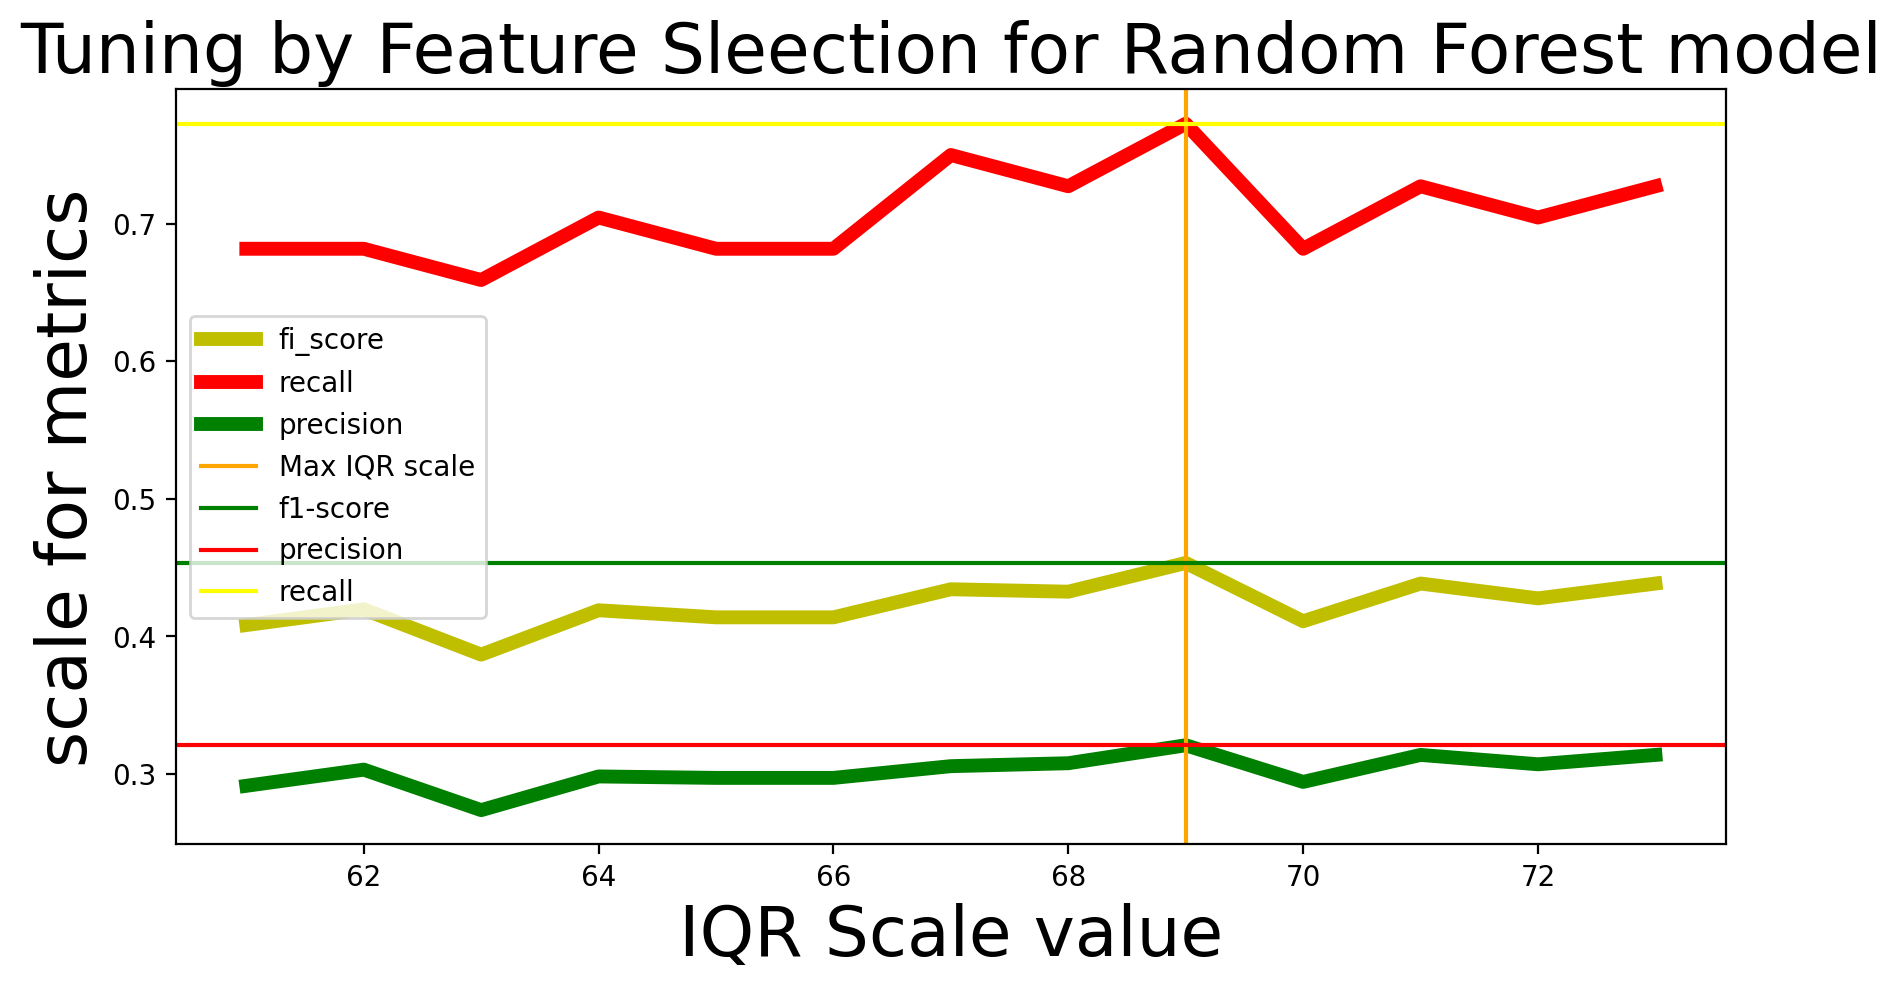

In [186]:
feature_selection_tune_rf_=pd.DataFrame(feature_selection_tune_rf).T
plot_best_score(feature_selection_tune_rf_,"Tuning by Feature Sleection for Random Forest model")


- Before tuning with Feature Selection
1. F1 score - 0.44 approx 
2. Precision - 0.33 approx
3. Recall - 0.75 approx
- After tuning with Feature Selection

1. F1 score - 0.45  approx 
2. Precision - 0.34 approx 
3. Recall - 0.77 approx 

There is no much increase in the performance of model by from feature selection method <br>
CAUTION Performance of XGBoost fluctuates a lot for the same value of parameters



In [185]:
features_for_Rf=list(feat_score['columns'].values[:69])
get_model_performance(RandomForestClassifier(),
                      data_rf,ADASYN(random_state=42,n_neighbors=5,n_jobs=-1)
                      ,display_report=True,custom_featrues=features_for_Rf)

0.45070422535211263 f1score
0.9397217928902627 accuracy
0.32653061224489793 precision
0.7272727272727273 recall
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1250
           1       0.33      0.73      0.45        44

    accuracy                           0.94      1294
   macro avg       0.66      0.84      0.71      1294
weighted avg       0.97      0.94      0.95      1294

[[1184   66]
 [  12   32]]


{'f1_score': 0.45070422535211263,
 'precision': 0.32653061224489793,
 'recall': 0.7272727272727273,
 'accuracy': 0.9397217928902627}

# Hypertuning Random Forest with model parameters to check the improvement in performance

In [220]:
# Storing Xtrain set and ytrain set for Random Forest model
X_train=data_rf.drop("Bankrupt?",axis=1)
y_train=data_rf["Bankrupt?"]

# Scalining the data
scaller=StandardScaler()
X_train_=scaller.fit_transform(X_train)
X_test_=scaller.transform(X_test)

# OverSampling the data
X_train_,y_train_=ADASYN(random_state=42,n_neighbors=5,n_jobs=-1).fit_resample(X_train_,y_train)

# Storing the best parameters for tuning Random Forest model
param_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [30,40,50,70,80,100,1400, 1600, 1800, 2000]}

# Initializing the Random Forest model
model=RandomForestClassifier()

# Initializing the Randomised Search CV object
grid=RandomizedSearchCV(estimator=model,param_distributions= param_grid
                        ,cv=5,verbose=10,
                        scoring='neg_mean_absolute_error')

# Fitting the model
grid.fit(X_train_,y_train_)
print(grid.best_params_)

# Storing the best parameters for Random Forest model
model=grid.best_estimator_

# Printing the best parameters for Random Forest model
print_metrics(predictions=model.predict(X_test_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 1/5; 1/10] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=-0.061 total time=   1.7s
[CV 2/5; 1/10] START bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 2/5; 1/10] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=-0.044 total time=   1.7s
[CV 3/5; 1/10] START bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 1/10] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=-0.051 total time=   2.2s
[CV 4/5; 1/10] START bootstrap=False, max_depth=60, max_features=sqrt, min_

[CV 4/5; 6/10] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=-0.093 total time=   0.8s
[CV 5/5; 6/10] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 5/5; 6/10] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=-0.044 total time=   0.9s
[CV 1/5; 7/10] START bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 1/5; 7/10] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=-0.062 total time=   1.1s
[CV 2/5; 7/10] START bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 2/5; 7/10] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=-0.04

{'f1_score': 0.4477611940298507,
 'precision': 0.3333333333333333,
 'recall': 0.6818181818181818,
 'accuracy': 0.9428129829984544}

- Best score of Random Forest model is tuned by  
      1.Feature selection method 
      2. IQR scale 
      3. Model Parameter Tuning 
         a. bootstrap: [True, False]
         b. max_depth: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
         c. max_features: ['auto', 'sqrt']
         d. min_samples_leaf: [1, 2, 4]
         e. min_samples_split: [2, 5, 10]
         f. n_estimators: [30,40,50,70,80,100,1400, 1600, 1800, 2000]
    1. Recall     =>0.70
    2. Precision  =>0.33 
    3. F1- Score  =>0.45 
    
    
- Score of Random Forest  tuned model is by  
      1.Feature selection method 
      2. IQR scale 
        
    1. F1 score - 0.47
    2. Precision - 0.34
    3. Recall - 0.75
 

## Tuning data for GradientBoost  model for IQR scale  from 2.3 to 3.9

In [193]:
# Storing the model performance for Random Forest model for IQR range of 1.5 to 3.9
chart_IQR_scale_tune_GDBoost=check_best_IQR_scale(GradientBoostingClassifier()
                                                  ,ADASYN(random_state=42,
                                                          n_neighbors=5,
                                                          n_jobs=-1),
                                                  [2.3,2.4,2.5,2.6,2.8
                                                   ,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4,4.1,4.2])


0.4


f1_score  precision    recall  accuracy
3.6       0.4   0.262411  0.840909  0.914219

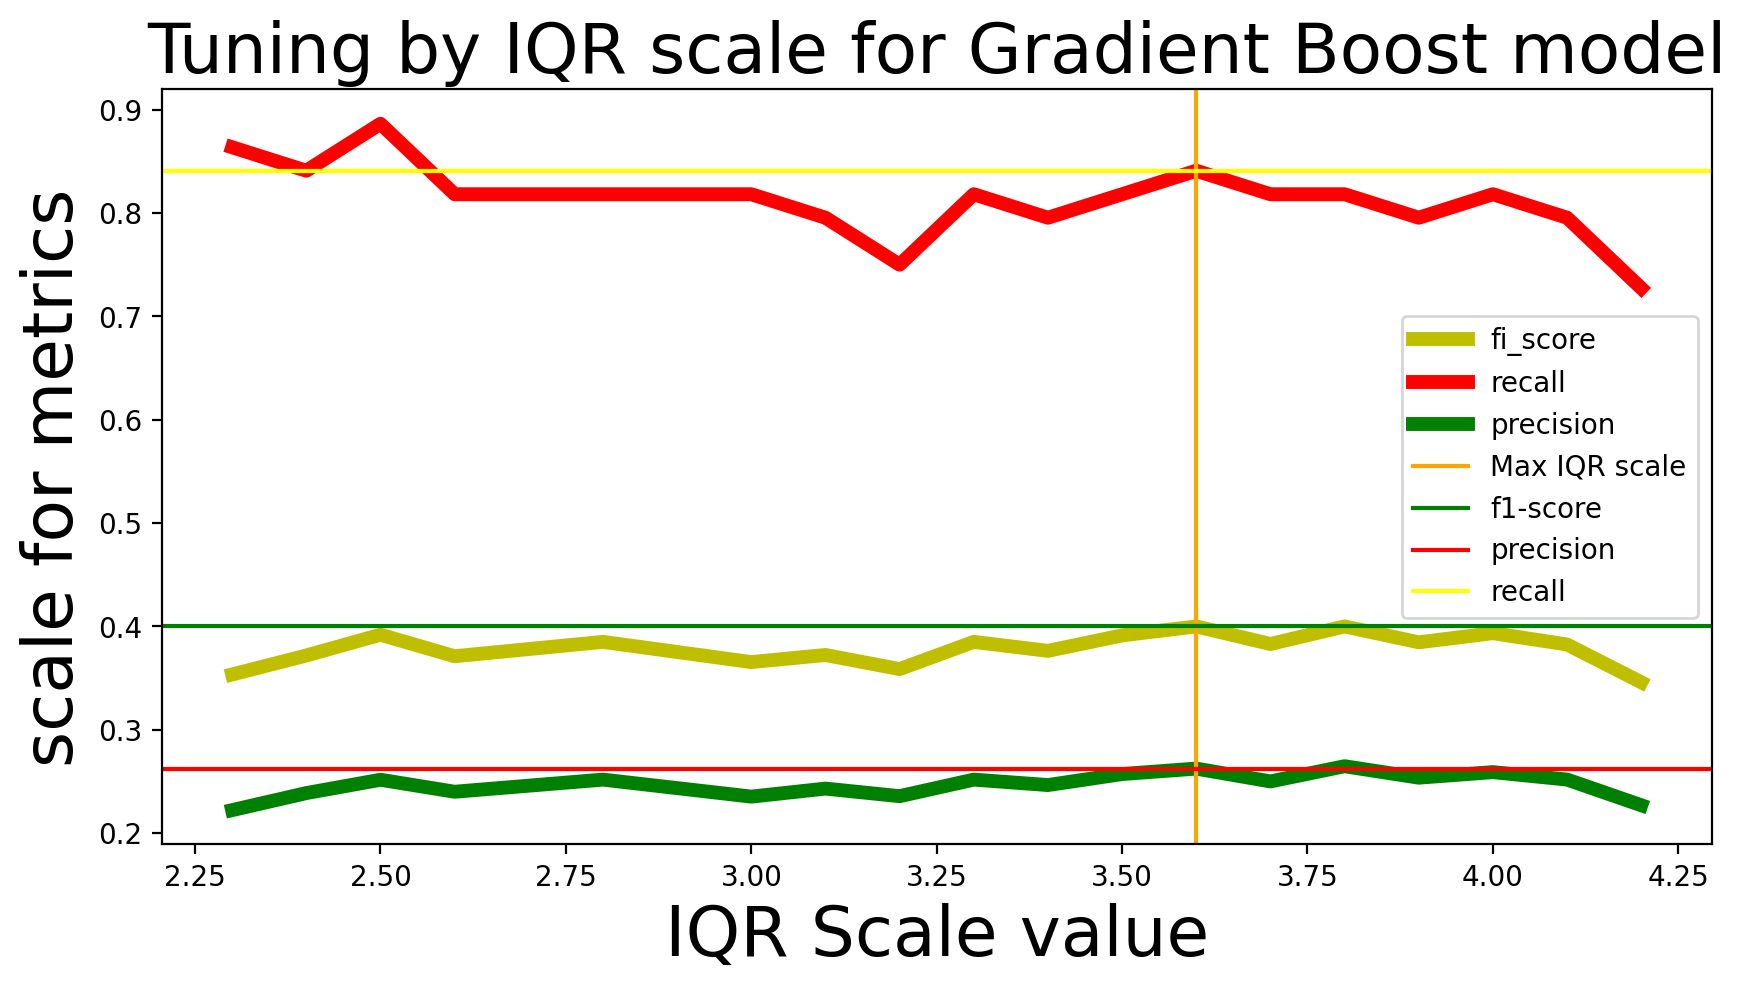

In [195]:
plot_best_score(chart_IQR_scale_tune_GDBoost,"Tuning by IQR scale for Gradient Boost model")



- The best metrics have Got from Gradient Boost for IQR value 3.6 
1. F1 -score .40 (approx)
2. Precision - 0.26 (approx)
3. Recall - 0.84 (approx)

In [196]:
# Storing Optimum value of IQR scale for Gradient Boost model
IQR_scale=3.6

# Storing the data after removing outlier beyond IQR scale i.e 3.7
data_GBoost=impute_outliers(bank_data_stage_2,IQR_scale,list(ascendingly_order_outlier_occr_feat[:33]))

# 
get_model_performance(GradientBoostingClassifier(),
                      data_GBoost,ADASYN(random_state=42,n_neighbors=5,n_jobs=-1)
                      ,display_report=True)

0.4 f1score
0.9142194744976816 accuracy
0.2624113475177305 precision
0.8409090909090909 recall
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1250
           1       0.26      0.84      0.40        44

    accuracy                           0.91      1294
   macro avg       0.63      0.88      0.68      1294
weighted avg       0.97      0.91      0.93      1294

[[1146  104]
 [   7   37]]


{'f1_score': 0.4,
 'precision': 0.2624113475177305,
 'recall': 0.8409090909090909,
 'accuracy': 0.9142194744976816}

## Tuning model by Feature Selection for Gradient Boost Model

In [198]:
# Initializing dictionary object to store the model performance metrics
feature_selection_tune_GBBoost={}

# Storing the first 50 highest ranked features
features_=list(feat_score['columns'].values[:50])

# Iterating from 50th highest ranked features to last ranked features
for i in feat_score['columns'].values[50:]:
    features_.append(i)
    feature_selection_tune_GBBoost[len(features_)]=get_model_performance(GradientBoostingClassifier()
                                                                    ,data_GBoost,ADASYN(
                                                                        random_state=42,
                                                                        n_neighbors=5,
                                                                        n_jobs=-1),
                                                                    display_report=False,
                                                                    custom_featrues=features_)
pd.DataFrame(feature_selection_tune_GBBoost).T.style.highlight_max()

0.4


f1_score  precision    recall  accuracy
73       0.4   0.262411  0.840909  0.914219

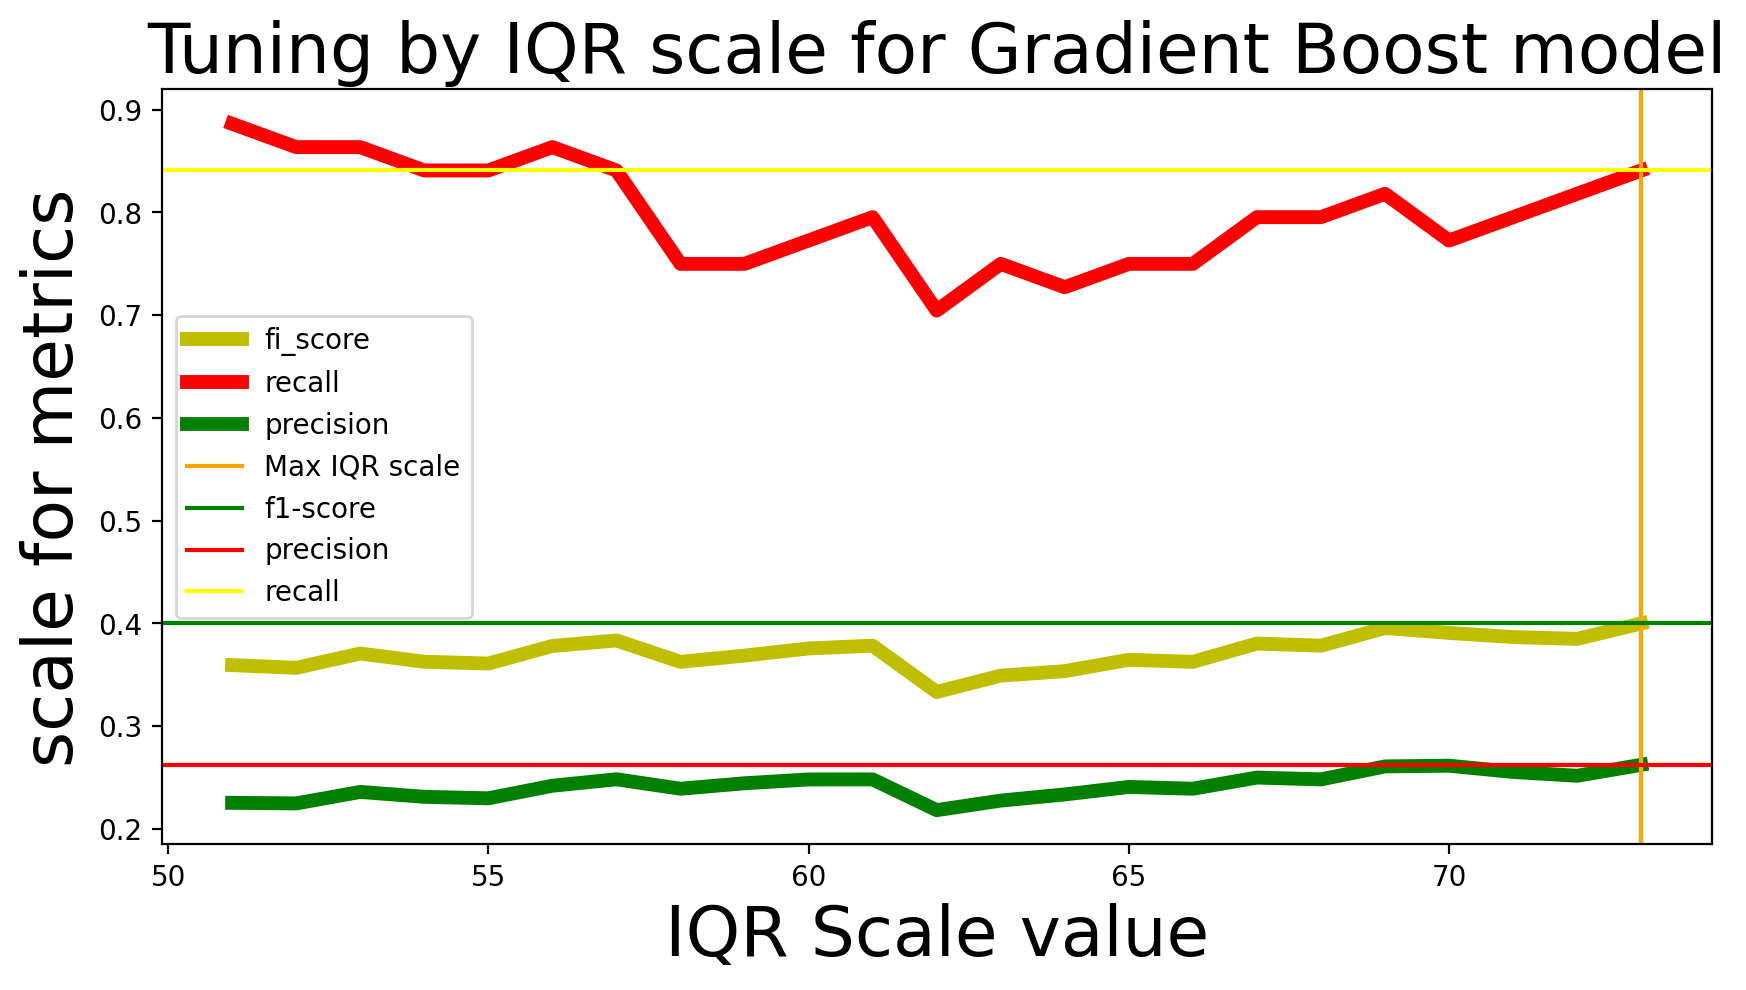

In [200]:
feature_selection_tune_GBBoost_=pd.DataFrame(feature_selection_tune_GBBoost).T
plot_best_score(feature_selection_tune_GBBoost_,"Tuning by IQR scale for Gradient Boost model")

### Gradient boost Model have same performance after tuning with high ranked feature selection method 

# Hypertuning GradientBoost with model paramaters

In [219]:
# Storing Xtrain set and ytrain set for GradientBoostingClassifier model
X_train=data_rf.drop("Bankrupt?",axis=1)
y_train=data_rf["Bankrupt?"]

# Scalining the data
scaller=StandardScaler()
X_train_=scaller.fit_transform(X_train)
X_test_=scaller.transform(X_test)

# OverSampling the data
X_train_,y_train_=ADASYN(random_state=42,n_neighbors=5,n_jobs=-1).fit_resample(X_train_,y_train)

# Storing the best parameters for tuning GradientBoostingClassifier model
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,20,30,40,80,100,200]
    }

# Initializing the Random Forest model
model=GradientBoostingClassifier()

# Initializing the Randomised Search CV object
grid=RandomizedSearchCV(estimator=model,param_distributions= param_grid
                        ,cv=5,verbose=10,
                        scoring='neg_mean_absolute_error')

# Fitting the model
grid.fit(X_train_,y_train_)
print(grid.best_params_)

# Storing the best parameters for Random Forest model
model=grid.best_estimator_

# Printing the best parameters for Random Forest model
print_metrics(predictions=model.predict(X_test_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=0.390909090909091, min_samples_split=0.5, n_estimators=40, subsample=1.0
[CV 1/5; 1/10] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=0.390909090909091, min_samples_split=0.5, n_estimators=40, subsample=1.0;, score=-0.217 total time=  18.0s
[CV 2/5; 1/10] START criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=0.390909090909091, min_samples_split=0.5, n_estimators=40, subsample=1.0
[CV 2/5; 1/10] END criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=0.390909090909091, min_samples_split=0.5, n_estimators=40, subsample=1.0;, score=-0.146 total time=  14.0s
[CV 3/5; 1/10] START criterion=mae, learning_rate=0.075, loss=deviance, max_depth=3, max_features=s

[CV 5/5; 4/10] END criterion=friedman_mse, learning_rate=0.075, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=40, subsample=0.9;, score=-0.498 total time=   0.0s
[CV 1/5; 5/10] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=0.42727272727272736, min_samples_split=0.17272727272727273, n_estimators=100, subsample=0.95
[CV 1/5; 5/10] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=0.42727272727272736, min_samples_split=0.17272727272727273, n_estimators=100, subsample=0.95;, score=-0.159 total time=   0.4s
[CV 2/5; 5/10] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=0.42727272727272736, min_samples_split=0.17272727272727273, n_estimators=100, subsample=0.95
[CV 2/5; 5/10] END criterion=friedman_mse, learning_rate=0.025, loss=deviance,

[CV 3/5; 8/10] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=30, subsample=0.618;, score=-0.153 total time=   0.1s
[CV 4/5; 8/10] START criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=30, subsample=0.618
[CV 4/5; 8/10] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=30, subsample=0.618;, score=-0.190 total time=   0.1s
[CV 5/5; 8/10] START criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=30, subsample=0.618
[CV 5/5; 8/10] END criterion=friedman_mse, learning_rate=0.1

{'f1_score': 0.28671328671328666,
 'precision': 0.16942148760330578,
 'recall': 0.9318181818181818,
 'accuracy': 0.8423493044822257}

- Best score of Gradient Boost model is tuned by  
      1.Feature selection method 
      2. IQR scale 
      3. Model Parameter Tuning 
            a. loss:["deviance"]
            b. learning_rate: [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
            c. min_samples_split: np.linspace(0.1, 0.5, 12)
            d. min_samples_leaf: np.linspace(0.1, 0.5, 12)
            e. max_depth:[3,5,8],
            f. max_features:["log2","sqrt"],
            g. criterion: ["friedman_mse",  "mae"],
            h. subsample:[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]
            i. n_estimators:[10,20,30,40,80,100,200]
    1. Recall     =>0.88
    2. Precision  =>0.17 
    3. F1- Score  =>0.29 
    
    
- Score of Gradient Boost  tuned model is by  
      1.Feature selection method 
      2. IQR scale 
        
    1. F1 score - 0.4
    2. Precision - 0.26
    3. Recall - 0.79
 

# Finally gathering the best parameter tuned and comparing the models performance

Parameters considered for tuning model:
1. IQR Scale
2. Feature Selection Method (Adding features from highest rank to lowest rank : Rank is obtained by Select K Best Technique)
3. Model Parameter tuning

### Models Used:
    1. XGBoost
    2. Gradient Boost
    3. Random Forest
    
 We will consider two models 
 1. XGBoost
 2. Random Forest
 
 Why Not Gradient Descent Because Gradient Boost have very good recall value but the **Precision Recall trade-off is unfair**
   

   
# 1. XGBoost (Best)
    Best Parameters

1. IQR Scale => **3.8** i.e. : Taking Variables between (Quantile_1 - **3.8** x IQR ) and (Quantile_3 + **3.8** x IQR)
2. Rank Wise one by one Feature Addition Method => **52** : Adding first 52 ranked features
 
    
# 2. Random Forest (Best)
    Best Parameters

1. IQR Scale => **2.5** i.e. : Taking Variables between (Quantile_1 - **2.5** x IQR ) and (Quantile_3 + **2.5** x IQR)
2. Rank Wise one by one Feature Addition Method => **69** : Adding first 69 ranked features


- By  using these methods 
 - We have got the best performance out of all the models
      
      

  
    

[19:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5454545454545454 f1score
0.9574961360123647 accuracy
0.42857142857142855 precision
0.75 recall
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1250
           1       0.43      0.75      0.55        44

    accuracy                           0.96      1294
   macro avg       0.71      0.86      0.76      1294
weighted avg       0.97      0.96      0.96      1294

[[1206   44]
 [  11   33]]
AUC SCORE OF XGBOOST 0.9434727272727272


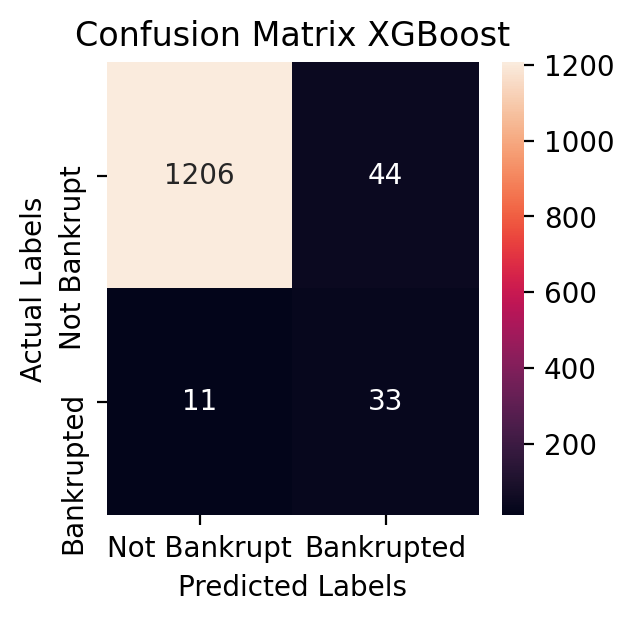

In [308]:
# Data _suiteable for XGBoost Model
IQR_scale_xgb=3.8
data_xgb_=impute_outliers(bank_data_stage_2,IQR_scale_xgb,list(ascendingly_order_outlier_occr_feat[:33]))
#
# Storing the first 52 ranked features
features_for_XgBoost_=list(feat_score['columns'].values[:52])

# Storing over Sampling method ADASYN
over_sampling_method=ADASYN(random_state=42,n_neighbors=5,n_jobs=-1)

# model
xgboost=XGBClassifier()


xgb_model_metrics,xgb_model,scalled_test_set_xgb=get_model_performance(xgboost,data_xgb_,
                                                          over_sampling_method,
                                                          display_report=True,
                                                          custom_featrues=features_for_XgBoost_,
                                                          return_trained_model=True)
y_pred_proba_xgb=xgb_model.predict_proba(scalled_test_set_xgb)[:,1]

precision_xgb, recall_xgb, _xgb = precision_recall_curve(y_test, y_pred_proba_xgb)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test, y_pred_proba_xgb, pos_label=1)
print("AUC SCORE OF XGBOOST",roc_auc_score(y_test,y_pred_proba_xgb))
cm_xgb=confusion_matrix(y_test,xgb_model.predict(scalled_test_set_xgb))
plt.figure(figsize=(3,3),dpi=200)
ax=sns.heatmap(cm_xgb,annot=True,fmt='g');
ax.set_title("Confusion Matrix XGBoost")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.xaxis.set_ticklabels(['Not Bankrupt',"Bankrupted"])
ax.yaxis.set_ticklabels(['Not Bankrupt',"Bankrupted"])
plt.show()


## Random Forest Model Performace

0.45945945945945943 f1score
0.9381761978361669 accuracy
0.3269230769230769 precision
0.7727272727272727 recall
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1250
           1       0.33      0.77      0.46        44

    accuracy                           0.94      1294
   macro avg       0.66      0.86      0.71      1294
weighted avg       0.97      0.94      0.95      1294

[[1180   70]
 [  10   34]]
AUC SCORE OF Random Forest 0.9587454545454546


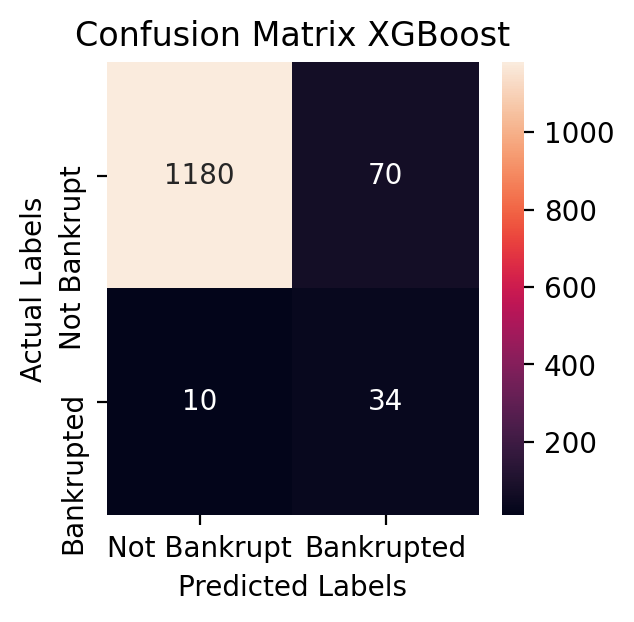

In [306]:
IQR_scale_rf=2.5
data_rf_=impute_outliers(bank_data_stage_2,IQR_scale,list(ascendingly_order_outlier_occr_feat[:33]))
features_for_Rf_=list(feat_score['columns'].values[:69])

rf_model_metrics,rf_model,scalled_test_set_rf=get_model_performance(RandomForestClassifier(),
                      data_rf,ADASYN(random_state=42,n_neighbors=5,n_jobs=-1)
                      ,display_report=True,
                      custom_featrues=features_for_Rf_,
                        return_trained_model=True)

y_pred_proba_rf=rf_model.predict_proba(scalled_test_set_rf)[:,1]
precision_rf, recall_rf, _rf = precision_recall_curve(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_pred_proba_rf, pos_label=1)
print("AUC SCORE OF Random Forest",roc_auc_score(y_test,y_pred_proba_rf))


plt.figure(figsize=(3,3),dpi=200)
cm_rf=confusion_matrix(y_test,rf_model.predict(scalled_test_set_rf))
ax=sns.heatmap(cm_rf,annot=True,fmt='g');
ax.set_title("Confusion Matrix XGBoost")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.xaxis.set_ticklabels(['Not Bankrupt',"Bankrupted"])
ax.yaxis.set_ticklabels(['Not Bankrupt',"Bankrupted"])
plt.show()

##  ROC Curve of models
    1. XGBoost 
    2. Random Forest
    
1. Deciding the model performance based on ROC and AUC curve in case of imbalanced dataset is a bad practice AUC and  ROC curve is not enough
2. Because AUC and ROC curve is insensitive to the imbalanced dataset, and will obviously show good score in case bad models also 

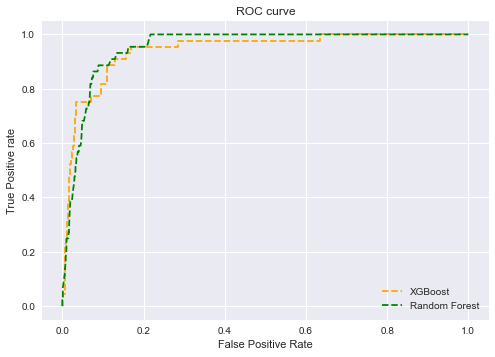

In [615]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='orange', label='XGBoost')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='green', label='Random Forest')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Precision Recall Curve (Percision Recall Trade Off)
    1. XGBoost 
    2. Random Forest
 - Precision recall curve is the one that tells us how the model is performing in case of Imbalanced dataset
## We can look at the trade off between Recall and precision of both models

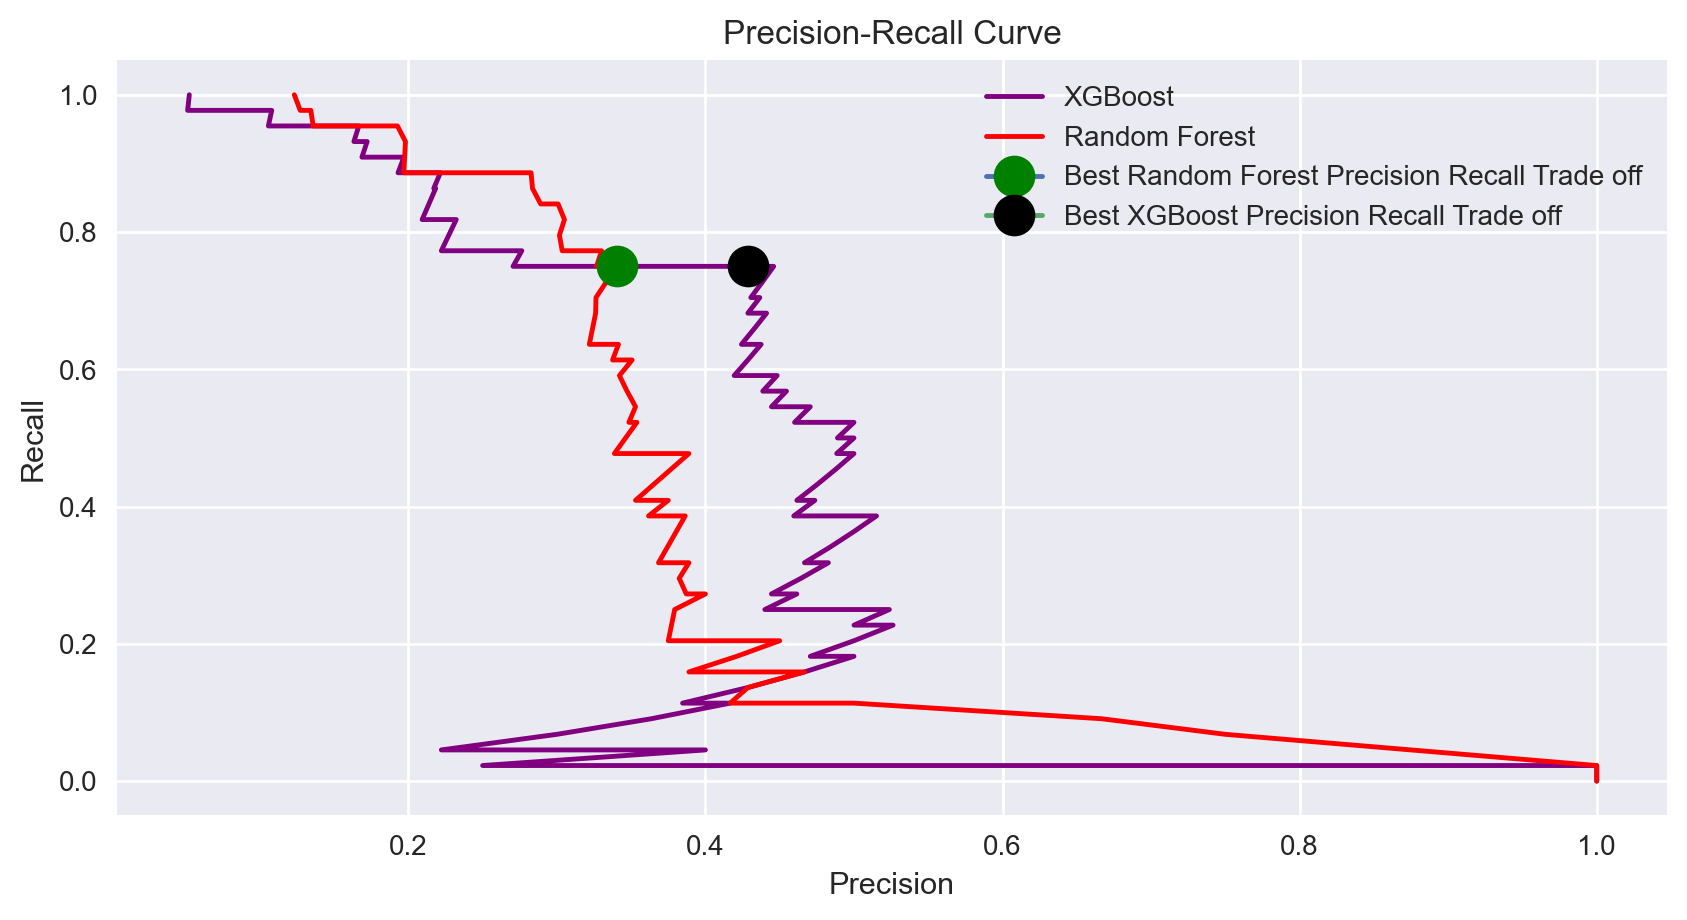

In [624]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(precision_xgb, recall_xgb,color='purple',label="XGBoost")
plt.plot(precision_rf,recall_rf,  color='red',label="Random Forest")
#add axis labels to plot
plt.title('Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')

# Highlighting the best part of curve
plt.plot(0.3402,0.75,label="Best Random Forest Precision Recall Trade off", markersize=15, markeredgecolor="red", markerfacecolor="green",marker="o",)
plt.plot(0.42857,0.75,label="Best XGBoost Precision Recall Trade off", markersize=15, markeredgecolor="red", markerfacecolor="black",marker="o",)

plt.legend()
plt.savefig('PRC',dpi=300)
plt.show()



- The problem statement is that we need to predict the probability of the company getting bankrupted or not
# Conclusion
### 1.Majority Class - Company Not getting Bankrupted
### 2. Minority Class- Company Bankrupted
1.  The Critical situation is that  company getting bankrupted i.e it might be risk for stake holders and other investors so we need to max try that our model not to mis-classify the Minority class i.e company being bankrupted<br>

    - Why because

    **Situation 1** If a Majority class i.e **company not being bankrupt** is misclassified as **bankrupt**, the investors or stake holders might not select that mis-classified company even though in reality if company dint get bankrupted, This will also be a loss but not as much as **Situation-2** <br>
    
    **Situation-2** - This situation is a nightmare for people who put lots of money on the company (stakeholders or investors) i.e If a **minority class** that is **company being bankrupted** is been mis-classified as **not being bankrupt** then in case if one invested money on that company and in reality the company gets **bankrupt** this  would incur a lot of money loss and time loss as it is a Failure with total wrong deviation, Yes Obviously its a very bad situation compared to **Situation-1** 
   
  ##  **Recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.**
 
    - If we want to avoid **Situation 1** : Then we need to concentrate on **High precision models**
    - If we want to avoid **Situation 2** : Then we need to concentrate on **High recall models**
    
- For this type of problem statement We need concentrate on **Situation 2** because its most critical Hence we need to concentrate on **Models with High Recall** 

**Models: XGBoost and RandomForest gives best recalls about 75% classifying 75 % of company being bankrupted**
    
